In [24]:
#This code is from curonia.py from Gytis Dudas.
#module load Python/3.6.1
#jupyter notebook

#Point to baltic.
import imp
bt = imp.load_source('baltic','/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/bang_geo_only/baltic.py') ## point to where baltic repo was cloned

#import libraries
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon ## for polygons
from matplotlib.collections import PatchCollection ## for polygons too
from matplotlib.colors import LinearSegmentedColormap ## for colour maps
from matplotlib import gridspec ## for composite figures
import matplotlib.patheffects as path_effects ## for elegant text
from IPython.display import clear_output
from IPython.display import HTML

import datetime
import math
import time
import sys

import unicodedata
# import unidecode ## for removing diacritics from example geoJSON

import numpy as np
from scipy.interpolate import UnivariateSpline ## used to smooth counts of lineages in each location at any given time
from scipy.interpolate import interp1d ## used to linearly interpolate between data points used in colouring polygons
from sklearn.decomposition import IncrementalPCA ## used to identify PCA1 when automatically producing a colour map

#import bezier ## custom arbitrary order Bezier curves
import requests ## used to fetch examples from internet
import json ## used for importing JSONs
try:
    from StringIO import StringIO as sio
    from cStringIO import StringIO as csio
except ImportError:
    from io import StringIO as sio
    from io import BytesIO as csio
    
def removeDiacritics(string):
    """
    Removes diacritic marks from unicode.
    """
#    output=None
#    if isinstance(string, str):
#        output=string
#    elif isinstance(string, unicode):
#        output=string.encode('utf-8')
#        output=unidecode.unidecode(string)
#        nkfd_form = unicodedata.normalize('NFKD', unicode(string))
#        output= u"".join([c for c in nkfd_form if not unicodedata.combining(c)])
#        output = ''.join((c for c in unicodedata.normalize('NFD', string) if unicodedata.category(c) != 'Mn'))
#        output=unicodedata.normalize('NFKD', string).encode('ASCII', 'ignore')
#    return output
#    return unicodedata.normalize('NFKD', string).encode('ASCII', 'ignore')
    return unicodedata.normalize('NFKD', string)

def calendarTimeline(start_date, end_date, infmt='%Y-%m-%d',outfmt='%Y-%b',optfmt=None,month_step=12):
    """
    Given two calendar dates returns a list of calendar dates at monthly (by default) intervals.
    """
    current_date = datetime.datetime.strptime(start_date,infmt)
    ending_date = datetime.datetime.strptime(end_date,infmt)
    
    timeline=[]
    while current_date <= ending_date:
        if optfmt and current_date.month!=1:
            d=datetime.datetime.strftime(current_date,optfmt)
        else:
            d=datetime.datetime.strftime(current_date,outfmt)
        #print('Current Date:%s'%d)
        timeline.append(d)
        carry, new_month = divmod(current_date.month - 1 + month_step, 12)
        new_month += 1
        current_date = current_date.replace(year=current_date.year + carry,month=new_month)
    return timeline

typeface='Helvetica Neue' ## set default matplotlib font and font size
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22

#frame='<iframe style="border: 0; width: 400px; height: 472px;" src="https://bandcamp.com/EmbeddedPlayer/album=29809561/size=large/bgcol=333333/linkcol=e99708/artwork=small/transparent=true/" seamless><a href="http://romowerikoito.bandcamp.com/album/nawam-r">NAWAMAR by Romowe Rikoito</a></iframe>'

print('Done!')
#HTML(frame)

start='1971-09-01' ## start date of animation
end='2015-03-18' ## end date of animation

xtimeline=calendarTimeline(start,end,'%Y-%m-%d','%Y-%m-%d') ## create timeline from start to end of animation delimited with months


#import geoJSON:
json_map=json.load(open('/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/location_variable_testing_2/GEOJSON/bgd_admin2.geojson','r')) ## read from (hopefully saved) local copy

print('Done!')

#Convert geoJSON into matplotlib ploygons:
features=json_map['features']
location_points={} ## location points will be stored here
polygons={} ## polygons will be stored here

locName='ADM2_EN' ## key name for each feature

for loc in features: ## iterate through features (locations)
    poly = np.asarray(loc['geometry']['coordinates']) ## get coordinates
    location=removeDiacritics(loc['properties'][locName]) ## standardised location name (remove diacritics)
#     print(location.encode().decode('utf-8'))
    if location not in ['Isla Sala y Gomez'] and 'Gal' not in location: ## ignore Isla Sala y Gomez
        polygons[location]=[]
        location_points[location]=[]
        if loc['geometry']['type']=='MultiPolygon': ## multiple parts detected
            for part in np.asarray(poly): ## iterate over each component polygon
                for coords in np.asarray(part): ## iterate over coordinates
                    coords=np.array(coords)
                    xs=coords[:,0] ## longitudes
                    ys=coords[:,1] ## latitudes

                    location_points[location].append(np.vstack(zip(xs,ys))) ## append coordinates to location's list of coordinates
        if loc['geometry']['type']=='Polygon': ## location is single part
            for coords in np.asarray(poly): ## iterate over coordinates
                coords=np.array(coords)
                xs=coords[:,0] ## longitudes
                ys=coords[:,1] ## latitudes

                location_points[location].append(np.vstack(zip(xs,ys))) ## append coordinates to location's list of coordinates

        complete_location=[]
        for part in location_points[location]: ## iterate over each component of a location
            complete_location.append(Polygon(part,True)) ## create a polygon for each component of a location

        polygons[location]=complete_location ## assign list of polygons to a location
#     elif location=='Isla Sala y Gomez': ## if location is Isla Sala y Gomez - print a geoJSON entry example
#         print('example geoJSON entry:\n%s\n\nnote that only the coordinate field is called\n'%(loc))
        
print('polygons loaded:\n%s'%(polygons.keys()))

Done!
Done!


/apps/x86_64/python/3.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:125: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


polygons loaded:
dict_keys(['Bagerhat', 'Bandarban', 'Barguna', 'Barisal', 'Bhola', 'Bogra', 'Brahamanbaria', 'Chandpur', 'Chittagong', 'Chuadanga', 'Comilla', "Cox's Bazar", 'Dhaka', 'Dinajpur', 'Faridpur', 'Feni', 'Gaibandha', 'Gazipur', 'Gopalganj', 'Habiganj', 'Jamalpur', 'Jessore', 'Jhalokati', 'Jhenaidah', 'Joypurhat', 'Khagrachhari', 'Khulna', 'Kishoreganj', 'Kurigram', 'Kushtia', 'Lakshmipur', 'Lalmonirhat', 'Madaripur', 'Magura', 'Manikganj', 'Maulvibazar', 'Meherpur', 'Munshiganj', 'Mymensingh', 'Naogaon', 'Narail', 'Narayanganj', 'Narsingdi', 'Natore', 'Nawabganj', 'Netrakona', 'Nilphamari', 'Noakhali', 'Pabna', 'Panchagarh', 'Patuakhali', 'Pirojpur', 'Rajbari', 'Rajshahi', 'Rangamati', 'Rangpur', 'Satkhira', 'Shariatpur', 'Sherpur', 'Sirajganj', 'Sunamganj', 'Sylhet', 'Tangail', 'Thakurgaon'])


In [63]:
#Can I import my Cauchy MCC tree and pull coordinate data out of it??

#Point to baltic.
import imp
bt = imp.load_source('baltic','/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/bang_geo_only/baltic.py') ## point to where baltic repo was cloned

#Test code to import my Cauchy MCC tree:
tree_path='/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/bang_geo_only/Nipah_Cauchy_new_HKYG_UCLN_skygrid_1234_log.time.MCC.trees'

ll=bt.loadNexus(tree_path)

#Import geojson
df=gpd.read_file('/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/location_variable_testing_2/GEOJSON/SEAsia_forBEAST_V2.geojson')


# locTrait='location' ## name of locations in the tree
latTrait='location1'
longTrait='location2'
#print([x.traits for x in ll.Objects])
print([x.traits[longTrait] for x in ll.Objects if longTrait in x.traits])
print([x.traits[latTrait] for x in ll.Objects if latTrait in x.traits])
print([x.index for x in ll.Objects if latTrait in x.traits])

for k in bt_tree.Objects: ## iterate over branches
    locA=''
    if longTrait in k.parent.traits:
        long_parent=k.parent.traits[longTrait] ## get location of parent
        lat_parent=k.parent.traits[latTrait] ## get location of parent
        print('Parent long and lat%.5f %.5f'%(long_parent, lat_parent))
    long_current=k.traits[longTrait] ## get location of branch
    lat_current=k.traits[latTrait] ## get location of branch
    print('Current long and lat%.5f %.5f'%(long_current, lat_current))
    
    
    
    gdf.plot(ax=ax, color='red')
    
df.plot()

print('Done!')

[24.223879227830643, 24.631480947875044, 25.03861145089651, 25.039442647588924, 25.037337000009742, 25.04602799998522, 25.056820999980708, 24.647344651707872, 24.494831311228584, 23.481446000014593, 24.57548154824356, 24.619565103759356, 25.476710279759928, 25.83588999998951, 25.490177025636154, 25.524144166531688, 25.696624999988614, 23.376982605553952, 23.374560272466756, 23.377291381357743, 25.57581512570717, 25.778966257553474, 25.778798411512163, 25.7809826130163, 24.974999999984703, 23.82363193653543, 23.727659999983512, 23.917704000014137, 24.56028601045898, 23.90988533043339, 23.81000000002039, 23.3396729382215, 25.741344999989593, 25.18014099998766, 23.767426225295548, 23.780310999985193, 23.681610044142104, 23.680685610367085, 23.65680619397622, 24.373589999982343, 23.601482999985176, 23.715344846132364, 23.73403399999191, 23.709999999991243, 23.659830449129934, 23.67722099999035, 23.63351833188659, 23.540466468154783, 23.452754902191934, 23.47893999997876, 23.363238561104716

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 253943 entries, water to water
Data columns (total 4 columns):
osm_id      253943 non-null object
code        253943 non-null int64
name        4489 non-null object
geometry    253943 non-null object
dtypes: int64(1), object(3)
memory usage: 14.7+ MB
Done!


/apps/x86_64/python/3.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:95: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


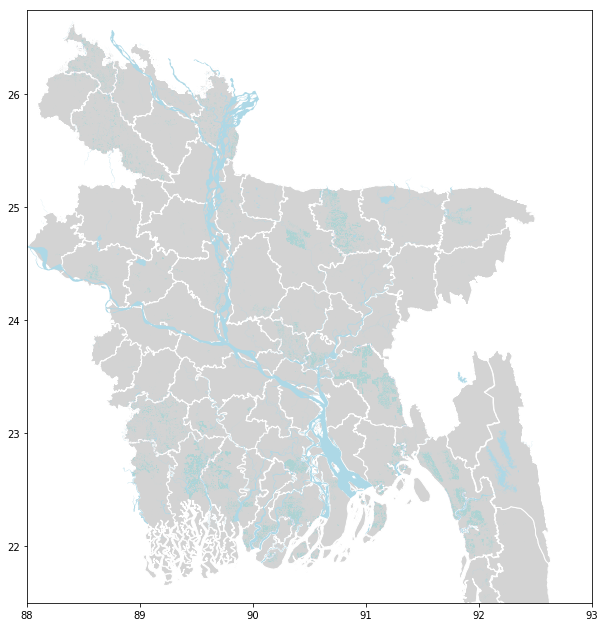

In [19]:
#Can I import a shapefile and add a matplotlib polygon to it?
import descarteslabs as dl
import numpy as np
import geopandas as gpd

#import libraries
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon ## for polygons
from matplotlib.collections import PatchCollection ## for polygons too
from matplotlib.colors import LinearSegmentedColormap ## for colour maps
from matplotlib import gridspec ## for composite figures
import matplotlib.patheffects as path_effects ## for elegant text
from IPython.display import clear_output
from IPython.display import HTML

import datetime
import math
import time
import sys

import unicodedata
# import unidecode ## for removing diacritics from example geoJSON

import numpy as np
from scipy.interpolate import UnivariateSpline ## used to smooth counts of lineages in each location at any given time
from scipy.interpolate import interp1d ## used to linearly interpolate between data points used in colouring polygons
from sklearn.decomposition import IncrementalPCA ## used to identify PCA1 when automatically producing a colour map

#import bezier ## custom arbitrary order Bezier curves
import requests ## used to fetch examples from internet
import json ## used for importing JSONs
try:
    from StringIO import StringIO as sio
    from cStringIO import StringIO as csio
except ImportError:
    from io import StringIO as sio
    from io import BytesIO as csio
    
def removeDiacritics(string):
    """
    Removes diacritic marks from unicode.
    """
#    output=None
#    if isinstance(string, str):
#        output=string
#    elif isinstance(string, unicode):
#        output=string.encode('utf-8')
#        output=unidecode.unidecode(string)
#        nkfd_form = unicodedata.normalize('NFKD', unicode(string))
#        output= u"".join([c for c in nkfd_form if not unicodedata.combining(c)])
#        output = ''.join((c for c in unicodedata.normalize('NFD', string) if unicodedata.category(c) != 'Mn'))
#        output=unicodedata.normalize('NFKD', string).encode('ASCII', 'ignore')
#    return output
#    return unicodedata.normalize('NFKD', string).encode('ASCII', 'ignore')
    return unicodedata.normalize('NFKD', string)


shape_file=gpd.read_file('/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/location_variable_testing_2/GEOJSON/bangladesh-latest-free/gis_osm_water_a_free_1.shp')



#Rename rows by fclass column values:
shape_file=shape_file.set_index('fclass')
rivers_shape_file=shape_file.loc[['river', 'water']]
shape_file.info()

#import geoJSON:
json_map=json.load(open('/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/location_variable_testing_2/GEOJSON/bgd_admin2.geojson','r')) ## read from (hopefully saved) local copy

print('Done!')

#Convert geoJSON into matplotlib ploygons:
features=json_map['features']
location_points={} ## location points will be stored here
polygons={} ## polygons will be stored here

locName='ADM2_EN' ## key name for each feature

for loc in features: ## iterate through features (locations)
    poly = np.asarray(loc['geometry']['coordinates']) ## get coordinates
    location=removeDiacritics(loc['properties'][locName]) ## standardised location name (remove diacritics)
#     print(location.encode().decode('utf-8'))
    if location not in ['Isla Sala y Gomez'] and 'Gal' not in location: ## ignore Isla Sala y Gomez
        polygons[location]=[]
        location_points[location]=[]
        if loc['geometry']['type']=='MultiPolygon': ## multiple parts detected
            for part in np.asarray(poly): ## iterate over each component polygon
                for coords in np.asarray(part): ## iterate over coordinates
                    coords=np.array(coords)
                    xs=coords[:,0] ## longitudes
                    ys=coords[:,1] ## latitudes

                    location_points[location].append(np.vstack(zip(xs,ys))) ## append coordinates to location's list of coordinates
        if loc['geometry']['type']=='Polygon': ## location is single part
            for coords in np.asarray(poly): ## iterate over coordinates
                coords=np.array(coords)
                xs=coords[:,0] ## longitudes
                ys=coords[:,1] ## latitudes

                location_points[location].append(np.vstack(zip(xs,ys))) ## append coordinates to location's list of coordinates

        complete_location=[]
        for part in location_points[location]: ## iterate over each component of a location
            complete_location.append(Polygon(part,True)) ## create a polygon for each component of a location

        polygons[location]=complete_location ## assign list of polygons to a location
#     elif location=='Isla Sala y Gomez': ## if location is Isla Sala y Gomez - print a geoJSON entry example
#         print('example geoJSON entry:\n%s\n\nnote that only the coordinate field is called\n'%(loc))
        
#print('polygons loaded:\n%s'%(polygons.keys()))

plt.figure(figsize=(15,15),facecolor='w') ## start figure
gs = gridspec.GridSpec(2, 1,height_ratios=[4,1]) ## define subplots
ax1 = plt.subplot(gs[0]) ## map here

ax1.plot()

for loc in polygons.keys():
    ax1.add_collection(PatchCollection(polygons[loc],facecolor='lightgrey',edgecolor='w',zorder=1)) ## plot location polygons

#for index, row in shape_file.iterrows():
#    if index == 'river':
#        print(index)
#        print(row['geometry'])
#        ax1.add_collection(PatchCollection(row['geometry'],facecolor='lightblue',edgecolor='',zorder=2))
        
        #internal_polygons[k.index]=([float(i) for i in k.traits[longPolygon]],[float(l) for l in k.traits[latPolygon]])
        #print(internal_polygons[k.index][0])
        #print(internal_polygons[k.index][1])
        #location_points_internal[k.index]=(np.vstack(zip(internal_polygons[k.index][0],internal_polygons[k.index][1])))
        #uncertainty_polygons[k.index].append(Polygon(location_points_internal[k.index], True))



ax1.set_aspect(1) ## equal aspect ratio
ax1.set_xlim(88.0, 93)
ax1.set_ylim(21.5, 26.75)

rivers_shape_file.plot(ax=ax1, facecolor='lightblue')

#plt.show()

In [12]:
shape_file


,osm_id,code,fclass,name,geometry
0,22295110,8200,water,None,"POLYGON ((88.9339464 22.3965743, 88.9344998 22..."
1,22295110,8202,river,None,"POLYGON ((88.9339464 22.3965743, 88.9344998 22..."
2,22371090,8200,water,Vhadra River,"POLYGON ((89.46668029999999 22.5991442, 89.466..."
3,22371090,8202,river,Vhadra River,"POLYGON ((89.46668029999999 22.5991442, 89.466..."
4,1451094,8202,river,None,"POLYGON ((88.9714671 22.4077025, 88.9714707 22..."
5,22371210,8200,water,None,"POLYGON ((88.9714671 22.4077025, 88.9714707 22..."
6,22371210,8202,river,None,"POLYGON ((88.9714671 22.4077025, 88.9714707 22..."
7,22371238,8202,river,None,"POLYGON ((89.1484636 22.4130038, 89.1484675 22..."
8,22371265,8202,river,None,"POLYGON ((89.83663439999999 22.4861588, 89.837..."
9,22476086,8200,water,None,"POLYGON ((89.88671429999999 22.6638831, 89.886..."


In [19]:
#Can I import the json made by spread3 and pull our my data of interest?
import json
from pprint import pprint

data=json.load(open('/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/location_variable_testing_2/GEOJSON/cauchy_new_0.05_SEAsia.json'))

pprint(data)

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4054-4055: invalid continuation byte

[=====================================             ]  75.00%  frame:    30 2005.744718340272  time:  1.16 min  ETA:  0.39 min (0.03869 s/operation) 15 65 10

DONE!

Time taken: 1.57 minutes
Suggested frame rate for an animation lasting 60.0 seconds using 40 frames: 0


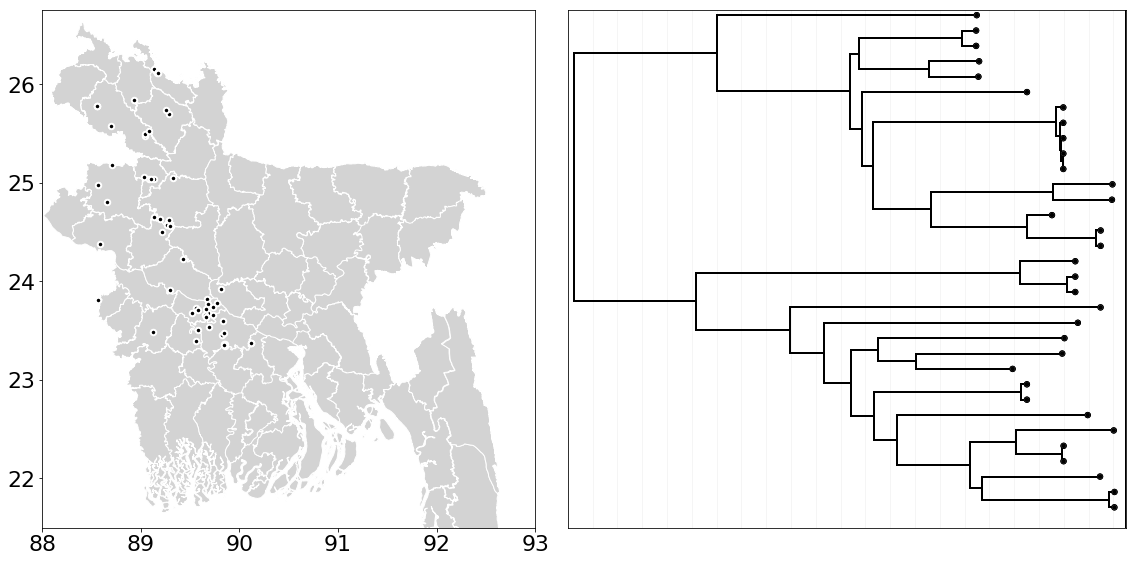

In [6]:
#Can I animate my phylogentic tree by time?

#This code is from curonia.py from Gytis Dudas.
#module load Python/3.6.1
#jupyter notebook

#Point to baltic.
import imp
bt = imp.load_source('baltic','/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/bang_geo_only/baltic.py') ## point to where baltic repo was cloned

#import libraries
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon ## for polygons
from matplotlib.collections import PatchCollection ## for polygons too
from matplotlib.colors import LinearSegmentedColormap ## for colour maps
from matplotlib import gridspec ## for composite figures
import matplotlib.patheffects as path_effects ## for elegant text
from IPython.display import clear_output
from IPython.display import HTML

import datetime
import math
import time
import sys

import unicodedata
# import unidecode ## for removing diacritics from example geoJSON

import numpy as np
from scipy.interpolate import UnivariateSpline ## used to smooth counts of lineages in each location at any given time
from scipy.interpolate import interp1d ## used to linearly interpolate between data points used in colouring polygons
#from sklearn.decomposition import IncrementalPCA ## used to identify PCA1 when automatically producing a colour map

#import bezier ## custom arbitrary order Bezier curves
import requests ## used to fetch examples from internet
import json ## used for importing JSONs
try:
    from StringIO import StringIO as sio
    from cStringIO import StringIO as csio
except ImportError:
    from io import StringIO as sio
    from io import BytesIO as csio
    
#import descarteslabs as dl
import fiona
import numpy as np
import geopandas as gpd
import pandas as pd
    
def removeDiacritics(string):
    """
    Removes diacritic marks from unicode.
    """
#    output=None
#    if isinstance(string, str):
#        output=string
#    elif isinstance(string, unicode):
#        output=string.encode('utf-8')
#        output=unidecode.unidecode(string)
#        nkfd_form = unicodedata.normalize('NFKD', unicode(string))
#        output= u"".join([c for c in nkfd_form if not unicodedata.combining(c)])
#        output = ''.join((c for c in unicodedata.normalize('NFD', string) if unicodedata.category(c) != 'Mn'))
#        output=unicodedata.normalize('NFKD', string).encode('ASCII', 'ignore')
#    return output
#    return unicodedata.normalize('NFKD', string).encode('ASCII', 'ignore')
    return unicodedata.normalize('NFKD', string)

def calendarTimeline(start_date, end_date, infmt='%Y-%m-%d',outfmt='%Y-%b',optfmt=None,month_step=12):
    """
    Given two calendar dates returns a list of calendar dates at monthly (by default) intervals.
    """
    current_date = datetime.datetime.strptime(start_date,infmt)
    ending_date = datetime.datetime.strptime(end_date,infmt)
    
    timeline=[]
    while current_date <= ending_date:
        if optfmt and current_date.month!=1:
            d=datetime.datetime.strftime(current_date,optfmt)
        else:
            d=datetime.datetime.strftime(current_date,outfmt)
        timeline.append(d)
        carry, new_month = divmod(current_date.month - 1 + month_step, 12)
        new_month += 1
        current_date = current_date.replace(year=current_date.year + carry,month=new_month)
    return timeline



def animate(frame):
    
    if len(animation_grid)-1==frame: ## if at last frame
        next_time=animation_grid[frame] ## current frame is next frame
    else:
        next_time=animation_grid[frame+1] ## next frame
        
    current_time=animation_grid[frame]
    
    effects=[path_effects.Stroke(linewidth=4, foreground='white'),
                 path_effects.Stroke(linewidth=0.5, foreground='k')] ## black text, white outline

    exists=[k for k in bt_tree.Objects if k.parent!=bt_tree.root and k.parent.absoluteTime!=None and k.parent.absoluteTime<=current_time<=k.absoluteTime] ## identify lineages that exist at current timeslice

    #lineage_locations=[c.traits[locTrait] for c in exists if c.traits[locTrait]!='Not Available'] ## identify locations where lineages are present
    #presence=set(lineage_locations) ## all locations where lineages currently are in the tree
    
    #Changed above code to have presence trace all of the tree branches.
    presence=set(exists)
    
    update=10 ## update progress bar every X frames
    
    #### Secondary plotting (tree)
    Ls2=[x for x in ax2.lines if 'Colour' not in str(x.get_label())] ## fetch all lines in plot
    partials=[x for x in ax2.lines if 'partial' in str(x.get_label())] ## fetch all tree branches in progress
    finished_lines=[x for x in ax2.lines if 'finished' in str(x.get_label())] ## fetch all tree branches that are finished
    finished_points=[x for x in ax2.collections if 'finished' in str(x.get_label())] ## fetch all tip circles that are finished
    
    finished_labels=[str(x.get_label()) for x in finished_lines]+[str(x.get_label()) for x in finished_points] ## combine everything that's finished (branches + tip circles)
    partial_labels=[str(x.get_label()) for x in partials] ## partially plotted branches
    
    if frame>0 and frame%update==0: ## progress bar
        clear_output()
        timeElapsed=(time.time() - t0)/60.0
        progress=int((frame*(50/float(len(animation_grid)))))
        percentage=frame/float(len(animation_grid))*100
        rate=timeElapsed/float(frame)
        ETA=rate*(len(animation_grid)-frame)
        sys.stdout.write("[%-50s] %6.2f%%  frame: %5d %10s  time: %5.2f min  ETA: %5.2f min (%6.5f s/operation) %s %s %s" % ('='*progress,percentage,frame,animation_grid[frame],timeElapsed,ETA,rate,len(partials),len(finished_lines),len(finished_points)))
        sys.stdout.flush()

    ####
    ## COMMENT this bit out if you don't want the tree to appear out of the time arrow
    ####
    for ap in bt_tree.Objects: ## iterate over branches
        idx='%s'%(ap.index) ## get unique id of branch
        xp=ap.parent.absoluteTime ## get parent's time

        x=ap.absoluteTime ## get branch's time
        y=ap.y ## get branch's y coordinate

        #location=ap.traits[locTrait] ## get branch's location
        aggregation={'1':'group 1', 
                     '2':'group 2',
                     '3':'group 2', 
                     '4':'group 1', 
                     '5':'group 1', 
                     '6':'group 1', 
                     '7':'group 1', 
                     '8':'group 1', 
                     '9':'group 2', 
                     '10':'group 2', 
                     '11':'group 1', 
                     '12':'group 2', 
                     '13':'group 2',
                     '14':'group 2',
                     '15':'group 2', 
                     '16':'group 2', 
                     '17':'group 2', 
                     '18':'group 1', 
                     '19':'group 2', 
                     '20':'group 2', 
                     '21':'group 1',
                     '22':'group 2',
                     '23':'group 1',
                     '24':'group 1', 
                     '25':'group 2', 
                     '26':'group 2', 
                     '27':'group 1', 
                     '28':'group 1', 
                     '29':'group 1', 
                     '30':'group 1',
                     '31':'group 1',
                     '32':'group 2',
                     '33':'group 2'}
                     
        ## aggregate individual locations into higher-order groups (e.g. subdivisions into a country)

        #group=aggregation[location] ## get location's group
        #cmap=group_colours[group] ## get group colour map
        #c=cmap(normalised_coordinates[location]) ## get colour
        
        #Setting C to black for initial testing.
        c='k'
        
        if xp!=None and xp<=current_time<x: ## branch is intersected by time arrow
            if 'partial_%s'%(idx) in partial_labels: ## if branch was partially drawn before
                l=[w for w in partials if 'partial_%s'%(idx)==str(w.get_label())][-1] ## get branch line
                l.set_data([xp,current_time],[y,y]) ## adjust its end coordinate to be time arrow
            else: ## branch is intersected, but not drawn before
                ax2.plot([xp,current_time],[y,y],lw=branchWidth,color=c,zorder=99,label='partial_%s'%(ap.index)) ## draw branch ending at time arrow, label as partially drawn
                
        if x<=current_time: ## time arrow passed branch - add it to finished class
            if 'partial_%s'%(idx) in partial_labels: ## if branch has been partially drawn before
                l=[w for w in partials if 'partial_%s'%(idx)==str(w.get_label())][-1] ## get branch
                l.set_data([xp,x],[y,y]) ## set end coordinate to be actual end coordinate
                l.set_label('finished_%s'%(idx)) ## set its label to finished
                
            if 'finished_%s'%(idx) not in finished_labels: ## branch has not been drawn before at all
                ax2.plot([xp,x],[y,y],lw=branchWidth,color=c,zorder=99,label='finished_%s'%(ap.index)) ## draw branch, add to finished class
                
            if 'partial_%s'%(idx) in partial_labels or 'finished_%s'%(idx) not in finished_labels: 
                if ap.branchType=='leaf': ## if leaf
                    ax2.scatter(x,y,s=tipSize,facecolor=c,edgecolor='none',zorder=102,label='finished_%s'%(ap.index)) ## add tip circle
                    ax2.scatter(x,y,s=tipSize*2,facecolor='k',edgecolor='none',zorder=101,label='finished_%s'%(ap.index)) ## add tip circle outline underneath
                elif ap.branchType=='node': ## if node
                    yl=ap.children[0].y ## get y coordinates of first and last child
                    yr=ap.children[-1].y
                    ax2.plot([x,x],[yl,yr],lw=branchWidth,color=c,zorder=99,label='finished_%s'%(ap.index)) ## plot vertical bar for node
    ####
    ## COMMENT this bit out if you don't want the tree to appear out of the time arrow
    ####
                   
    for l in Ls2: ## iterate over lines in tree
        if 'time' in l.get_label(): ## if line is time arrow
            l.set_data([current_time,current_time],[0,1]) ## adjust time arrow
#****************************end of animate function***************************************************************            

typeface='Helvetica Neue' ## set default matplotlib font and font size
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22

figWidth=10 ## map figure width
dpi=60 ## dots per inch for each .png (90 used in the final version)
every=12 ## put months labels every number of months

popCentres={} ## dictionary with point coordinates
for k in bt_tree.Objects: ## iterate over branches
    popCentres[k.index]=(float(k.traits[longTrait]),float(k.traits[latTrait] )) ## assign longitude and latitude to location

#Find the right coordinates for the map and tree.
#Width and height ratios are the lat and lon values from the map.
map_width=(93.0-88.0)
map_height=(26.75-21.5)
ratio=map_width/float(map_height) ## aspect ratio of map

plt.figure(figsize=(figWidth*2,figWidth*ratio),facecolor='w') ## start figure
gs = gridspec.GridSpec(ncols=2, nrows=1,wspace=0.0,hspace=0.0) ## define subplots
ax1 = plt.subplot(gs[0]) ## map here
ax2 = plt.subplot(gs[1]) ## Tree

#frame='<iframe style="border: 0; width: 400px; height: 472px;" src="https://bandcamp.com/EmbeddedPlayer/album=29809561/size=large/bgcol=333333/linkcol=e99708/artwork=small/transparent=true/" seamless><a href="http://romowerikoito.bandcamp.com/album/nawam-r">NAWAMAR by Romowe Rikoito</a></iframe>'

print('Done!')
#HTML(frame)

#Test code to import my Cauchy MCC tree:
tree_path='/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/bang_geo_only/Nipah_Cauchy_new_HKYG_UCLN_skygrid_1234_log.time.MCC.trees'

bt_tree=bt.loadNexus(tree_path)

#import geoJSON:
json_map=json.load(open('/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/location_variable_testing_2/GEOJSON/bgd_admin2.geojson','r')) ## read from (hopefully saved) local copy

print('Done!')

#Convert geoJSON into matplotlib ploygons:
features=json_map['features']
location_points={} ## location points will be stored here
polygons={} ## polygons will be stored here

locName='ADM2_EN' ## key name for each feature

for loc in features: ## iterate through features (locations)
    poly = np.asarray(loc['geometry']['coordinates']) ## get coordinates
    location=removeDiacritics(loc['properties'][locName]) ## standardised location name (remove diacritics)
#     print(location.encode().decode('utf-8'))
    if location not in ['Isla Sala y Gomez'] and 'Gal' not in location: ## ignore Isla Sala y Gomez
        polygons[location]=[]
        location_points[location]=[]
        if loc['geometry']['type']=='MultiPolygon': ## multiple parts detected
            for part in np.asarray(poly): ## iterate over each component polygon
                for coords in np.asarray(part): ## iterate over coordinates
                    coords=np.array(coords)
                    xs=coords[:,0] ## longitudes
                    ys=coords[:,1] ## latitudes

                    location_points[location].append(np.vstack(zip(xs,ys))) ## append coordinates to location's list of coordinates
        if loc['geometry']['type']=='Polygon': ## location is single part
            for coords in np.asarray(poly): ## iterate over coordinates
                coords=np.array(coords)
                xs=coords[:,0] ## longitudes
                ys=coords[:,1] ## latitudes

                location_points[location].append(np.vstack(zip(xs,ys))) ## append coordinates to location's list of coordinates

        complete_location=[]
        for part in location_points[location]: ## iterate over each component of a location
            complete_location.append(Polygon(part,True)) ## create a polygon for each component of a location

        polygons[location]=complete_location ## assign list of polygons to a location
#     elif location=='Isla Sala y Gomez': ## if location is Isla Sala y Gomez - print a geoJSON entry example
#         print('example geoJSON entry:\n%s\n\nnote that only the coordinate field is called\n'%(loc))
        
#print('polygons loaded:\n%s'%(polygons.keys()))
#********************************end of pulling in map**************************************************

# locTrait='location' ## name of locations in the tree
locTrait='location2_median'

t0 = time.time() ## time how long animation takes


start='1971-02-15' ## start date of animation
end='2016-02-18' ## end date of animation

animation_grid=list(np.linspace(bt.decimalDate(start),bt.decimalDate(end),40)) ## few frames from 2011 to 2015
#animation_grid+=list(np.linspace(bt.decimalDate('2018-01-01'),bt.decimalDate('2018-06-01'),40)) ## many frames from 2015 to 2016
#animation_grid+=list(np.linspace(bt.decimalDate('2018-06-01'),bt.decimalDate(end),20)) ## medium frames from 2016 to 2018

tipSize=20 ## size of tip circles in tree
branchWidth=2 ## line width of tree branches

animation_duration=60.0 ## seconds

print('Start of animation: %.2f\nEnd: %.2f'%(min(animation_grid),max(animation_grid)))

print(len([x for x in bt_tree.Objects if locTrait not in x.traits]))

print('Number of frames to animate: %d'%(len(animation_grid)))
            
global travelers ## the animation will need to have information to traveling lineages
travelers=[x for x in bt_tree.Objects if x!=bt_tree.root] ## find lineages that have travelled - they're what's going to be animated
print('\nNumber of travelling lineages: %d (%.3f%% of all lineages)'%(len(travelers),len(travelers)/float(len(bt_tree.Objects))*100))


#ax2 = plt.axes()## ax2 is tree


xtimeline=calendarTimeline(start,end,'%Y-%m-%d','%Y-%m-%d') ## create timeline from start to end of animation delimited with months
xpos=[bt.decimalDate(b) for b in xtimeline] ## convert calendar dates to decimal time
xlabels=[(bt.convertDate(b,'%Y-%m-%d','%b\n%Y') if '-01-' in b else bt.convertDate(b,'%Y-%m-%d','%b')) if (int(b.split('-')[1])+every-1)%every==0 else '' for b in xtimeline] ## month or year-month (if January) tick labels every given number of months


################
## Tertiary plot begins - TREE
################

####
## UNCOMMENT if you'd like the tree to be plotted in grey initially and get coloured over time
####
# iterate over objects in tree
for k in bt_tree.Objects:
    #loc=k.traits[locTrait] ## get branch location
    #group=aggregation[loc]
    #cmap=group_colours[group] ## get colour map
    #c=cmap(normalised_coordinates[loc]) ## fixed colour for location
    
    #set c = black for now.
    c='k'
    
    mask_cmap=mpl.cm.Greys ## colour map that goes on top of lines
    #grey_colour=mask_cmap((sorted_group.index(group)+1)/float(len(sorted_group)+2)) ## get colour based on index of location in list, avoiding white colour
    grey_colour="grey"
    
    y=k.y
    yp=k.parent.y
    
    x=k.absoluteTime
    xp=k.parent.absoluteTime
    
    if k.branchType=='leaf':
        ax2.scatter(x,y,s=tipSize,facecolor=grey_colour,edgecolor='none',zorder=102,label='LeafBW_%s'%(k.index)) ## plot black and white tip circle on top
        ax2.scatter(x,y,s=tipSize,facecolor=c,edgecolor='none',zorder=101,label='LeafColour_%s'%(k.index)) ## plot colour tip circle underneath black and white tip circle
        ax2.scatter(x,y,s=tipSize*2,facecolor='k',edgecolor='none',zorder=100,label='Colour') ## black outline underneath every tip
        
    elif k.branchType=='node':
        yl=k.children[0].y
        yr=k.children[-1].y
       
        if xp==0.0:
            xp=x

        ax2.plot([x,x],[yl,yr],color=grey_colour,lw=branchWidth,zorder=99,label='NodeHbarBW_%s'%(k.index))
        ax2.plot([x,x],[yl,yr],color=c,lw=branchWidth,zorder=98,label='NodeHbarColour_%s'%(k.index))
        
    ax2.plot([xp,x],[y,y],color=grey_colour,lw=branchWidth,zorder=99,label='BranchBW_%s'%(k.index)) ## plot black and white branch on top
    ax2.plot([xp,x],[y,y],color=c,lw=branchWidth,zorder=98,label='BranchColour_%s'%(k.index)) ## plot colour branch underneath black and white branch (note the zorder attribute)
    
####
## UNCOMMENT if you'd like the tree to be plotted in grey initially and get coloured over time
####



#Pull in latitude and longitude values from continuous diffusion analysis.
#IE - just parse tree and make a dictionary with node index as key and latitude and longitude values.
longTrait='location1'
latTrait='location2'

       
for i in popCentres.keys(): ## iterate over locations
    A=popCentres[i] ## fetch origin
    lon,lat=A
    #groupA=aggregation[i] ## get origin's high order group
    #c=group_colours[groupA](normalised_coordinates[i]) ## fetch colour map of the group, colour of location is determined by index of location's coordinates along PCA1
    
    #Set c to black for initial testing.
    c='k'
    
    ax1.scatter(lon,lat,s=30,facecolor=c,edgecolor='w',lw=2,zorder=100) ## plot migration centre
    
for loc in polygons.keys():
    ax1.add_collection(PatchCollection(polygons[loc],facecolor='lightgrey',edgecolor='w',zorder=1)) ## plot location polygons
    
#ax1.plot()## ax1 is map
ax1.set_aspect(1) ## equal aspect ratio
ax1.set_xlim(88.0, 93)
ax1.set_ylim(21.5, 26.75)

ax2.axvline(xpos[0],color='k',lw=3,label='time',zorder=200) ## add time arrow to indicate current time

ax2.set_xticks([x+1/24.0 for x in xpos]) ## add ticks, tick labels and month markers
ax2.set_xticklabels(xlabels) ## set x axis labels
[ax2.axvspan(xpos[x],xpos[x]+1/12.,facecolor='k',edgecolor='none',alpha=0.04) for x in range(0,len(xpos),2)] ## set grey vertical bars for x axis

ax2.xaxis.tick_bottom() ## make tree plot pretty
ax2.yaxis.tick_left()
[ax2.spines[loc] for loc in ax2.spines]

ax2.tick_params(axis='x',size=0) ## no ticks
ax2.tick_params(axis='y',size=0)
ax2.set_xticklabels([]) ## no tick labels
ax2.set_yticklabels([])

ax2.set_xlim(min(xpos),max(xpos)) ## axis limits
ax2.set_ylim(-bt_tree.ySpan*0.01,bt_tree.ySpan*1.01)
################
## Tertiary plot ends - TREE
################
            
for frame in range(len(animation_grid)): ## iterate through each frame
    animate(frame) ## animate will modify the map, tree and cases
    plt.savefig('/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/bang_geo_only/animate_tree_V1/ani_frame_%05d.png'%(frame), format='png',bbox_inches='tight',dpi=dpi) ## save individual frames for stitching up using 3rd party software (e.g. FFMpeg)

print('\n\nDONE!')

print('\nTime taken: %.2f minutes'%((time.time() - t0)/60.0))

print('Suggested frame rate for an animation lasting %s seconds using %s frames: %s'%(animation_duration,len(animation_grid),int(len(animation_grid)/animation_duration))) ## frame rate
plt.show()

In [ ]:
%%bash

frames=/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/bang_geo_only/animate_tree_V1/
ffmpeg_path=/scicomp/home/evk3/setup/ffmpeg-4.1

cd  $frames; rm nipah_28Mar2019_animation.HD.264.mp4; $ffmpeg_path/ffmpeg -framerate 4 -start_number 0 -i ani_frame_%05d.png -pix_fmt yuv420p -b:a 64k -vf scale="2160:trunc(ow/a/2)*2" nipah_28Mar2019_animation.HD.264.mp4


In [19]:
#Can I import my Cauchy MCC tree and pull coordinate data and polygons out of it??

#Point to baltic.
import imp
bt = imp.load_source('baltic','/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/bang_geo_only/baltic.py') ## point to where baltic repo was cloned

#Test code to import my Cauchy MCC tree:
tree_path='/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/bang_geo_only/Nipah_Cauchy_new_HKYG_UCLN_skygrid_1234_log.time.MCC.trees'

bt_tree=bt.loadNexus(tree_path)

#Import geojson
#df=gpd.read_file('/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/location_variable_testing_2/GEOJSON/SEAsia_forBEAST_V2.geojson')


popCentres={} ## dictionary with point coordinates
internal_polygons={} ##dictionary with internal node polygon estimates

longTrait='location2'
latTrait='location1'

longPolygon='location1_80%HPD_1'
latPolygon='location2_80%HPD_1'


for k in bt_tree.Objects: ## iterate over branches
    popCentres[k.index]=(float(k.traits[longTrait]),float(k.traits[latTrait] )) ## assign longitude and latitude to location
    
    if k.branchType == 'node' and k.index != 'Root':
        internal_polygons[k.index]=([float(i) for i in k.traits[longPolygon]],[float(l) for l in k.traits[latPolygon]])
        
        
print('migration centres:\n%s\n'%(popCentres.keys()))
print('dictionary format for migration centre coordinates:\n%s\n'%(popCentres))
    
print('internal polygons:\n%s\n'%(internal_polygons.keys()))
print('dictionary format for internal polygon coordinates:\n%s\n'%(internal_polygons))


print('Done!')

migration centres:
dict_keys([0, 1, 2, 3, 4, 773, 3906, 6319, 6320, 6321, 7082, 7083, 7084, 7085, 7850, 7851, 7852, 8621, 8622, 12769, 19547, 19548, 19549, 23140, 28708, 36218, 36219, 36987, 42968, 42969, 42970, 43733, 50299, 60809, 67347, 67348, 68116, 68117, 68118, 68119, 68891, 71353, 71354, 72122, 77072, 77073, 77834, 77835, 77836, 77837, 78593, 78594, 82243, 89994, 89995, 90767, 95074, 95075, 98927, 98928, 102855, 102856, 106741, 106742, 110295])

dictionary format for migration centre coordinates:
{0: (24.223879227830643, 89.4259251703078), 1: (24.631480947875044, 89.19562873393843), 2: (25.03861145089651, 89.08500408255294), 3: (25.039442647588924, 89.13167362651745), 4: (25.037337000009742, 89.1025020000431), 773: (25.04602799998522, 89.32370400006072), 3906: (25.056820999980708, 89.03606799993568), 6319: (24.647344651707872, 89.13869565029017), 6320: (24.494831311228584, 89.21018764618397), 6321: (23.481446000014593, 89.12417900002765), 7082: (24.57548154824356, 89.26977827438

In [9]:
#Can I import my Cauchy MCC tree and pull coordinate data out of it??

#Point to baltic.
import imp
bt = imp.load_source('baltic','/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/bang_geo_only/baltic.py') ## point to where baltic repo was cloned

#Test code to import my Cauchy MCC tree:
tree_path='/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/bang_geo_only/Nipah_Cauchy_new_HKYG_UCLN_skygrid_1234_log.time.MCC.trees'

ll=bt.loadNexus(tree_path)


# locTrait='location' ## name of locations in the tree
for k in ll.Objects: ## iterate over branches
    if k.branchType == 'node':
        print(k.traits)


print('Done!')

{'location2_median': 24.019131046565455, 'location1_median': 89.49209770088115, 'length': 0.0, 'posterior': 1.0, 'height_median': 43.55578002135172, 'location1': 89.4259251703078, 'location2': 24.223879227830643, 'height': 44.36041215232995, 'height_range': [17.8845894100849, 120.98504723743427], 'location2_range': [20.62833194327748, 27.779959883060233], 'location1_range': [85.55918494545348, 92.56692518445071], 'location1_80%HPD_1': [89.21841703, 89.32048226, 89.3273608, 89.49210039, 89.5244364, 89.66371851, 89.83533664, 89.96216266, 90.00695477, 90.04547883, 90.04651676, 90.00695477, 89.98903278, 89.86796963, 89.83533664, 89.72341466, 89.66371851, 89.58249293, 89.49210039, 89.47829433, 89.43798533, 89.40076733, 89.32048226, 89.29781946, 89.14886413, 89.11412468, 88.977246, 88.80562787, 88.78439132, 88.68240199, 88.68374147, 88.80062326, 88.80562787, 88.90134531, 88.977246, 89.00844714, 89.07038374, 89.14886413, 89.15345065, 89.17900445, 89.21841703, 89.21841703], 'location2_80%HPD_1

Done!


/apps/x86_64/python/3.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:134: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



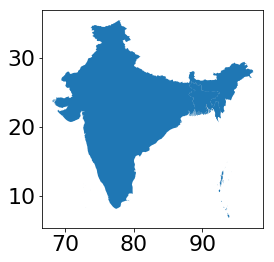

In [70]:
#Can I import a shapefile and add a matplotlib polygon to it?
#import libraries
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon ## for polygons
from matplotlib.collections import PatchCollection ## for polygons too
from matplotlib.colors import LinearSegmentedColormap ## for colour maps
from matplotlib import gridspec ## for composite figures
import matplotlib.patheffects as path_effects ## for elegant text
from IPython.display import clear_output
from IPython.display import HTML

import datetime
import math
import time
import sys

import unicodedata
# import unidecode ## for removing diacritics from example geoJSON

import numpy as np
from scipy.interpolate import UnivariateSpline ## used to smooth counts of lineages in each location at any given time
from scipy.interpolate import interp1d ## used to linearly interpolate between data points used in colouring polygons
from sklearn.decomposition import IncrementalPCA ## used to identify PCA1 when automatically producing a colour map

#import bezier ## custom arbitrary order Bezier curves
import requests ## used to fetch examples from internet
import json ## used for importing JSONs
try:
    from StringIO import StringIO as sio
    from cStringIO import StringIO as csio
except ImportError:
    from io import StringIO as sio
    from io import BytesIO as csio
    
import descarteslabs as dl
import fiona
import numpy as np
import geopandas as gpd
import pandas as pd

from functools import reduce

    
def removeDiacritics(string):
    """
    Removes diacritic marks from unicode.
    """
#    output=None
#    if isinstance(string, str):
#        output=string
#    elif isinstance(string, unicode):
#        output=string.encode('utf-8')
#        output=unidecode.unidecode(string)
#        nkfd_form = unicodedata.normalize('NFKD', unicode(string))
#        output= u"".join([c for c in nkfd_form if not unicodedata.combining(c)])
#        output = ''.join((c for c in unicodedata.normalize('NFD', string) if unicodedata.category(c) != 'Mn'))
#        output=unicodedata.normalize('NFKD', string).encode('ASCII', 'ignore')
#    return output
#    return unicodedata.normalize('NFKD', string).encode('ASCII', 'ignore')
    return unicodedata.normalize('NFKD', string)

def calendarTimeline(start_date, end_date, infmt='%Y-%m-%d',outfmt='%Y-%b',optfmt=None,month_step=12):
    """
    Given two calendar dates returns a list of calendar dates at monthly (by default) intervals.
    """
    current_date = datetime.datetime.strptime(start_date,infmt)
    ending_date = datetime.datetime.strptime(end_date,infmt)
    
    timeline=[]
    while current_date <= ending_date:
        if optfmt and current_date.month!=1:
            d=datetime.datetime.strftime(current_date,optfmt)
        else:
            d=datetime.datetime.strftime(current_date,outfmt)
        print('Current Date:%s'%d)
        timeline.append(d)
        carry, new_month = divmod(current_date.month - 1 + month_step, 12)
        new_month += 1
        current_date = current_date.replace(year=current_date.year + carry,month=new_month)
    return timeline

#From:https://gis.stackexchange.com/questions/265864/multiple-spatial-joins-with-geopandas-in-python
def join_reducer(left, right):
    """
    Take two geodataframes, do a spatial join, and return without the
    index_left and index_right columns.
    """
    sjoin = gpd.sjoin(left, right, how='left')
    for column in ['index_left', 'index_right']:
        try:
            sjoin.drop(column, axis=1, inplace=True)
        except:
            # ignore if there are no index columns
            print('hit an exception')
            #print(left)
            pass
    return sjoin



typeface='Helvetica Neue' ## set default matplotlib font and font size
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22

#frame='<iframe style="border: 0; width: 400px; height: 472px;" src="https://bandcamp.com/EmbeddedPlayer/album=29809561/size=large/bgcol=333333/linkcol=e99708/artwork=small/transparent=true/" seamless><a href="http://romowerikoito.bandcamp.com/album/nawam-r">NAWAMAR by Romowe Rikoito</a></iframe>'

print('Done!')
#HTML(frame)

df_bang1=gpd.read_file('/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/location_variable_testing_2/GEOJSON/bgd_admbnda_adm2/bgd_admbnda_adm2_bbs_20180410.shp')
df_bang0=gpd.read_file('/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/location_variable_testing_2/GEOJSON/bgd_admbnda_adm0/bgd_admbnda_adm0_bbs_20180410.shp')
df_india0=gpd.read_file('/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/location_variable_testing_2/GEOJSON/IND_adm/IND_adm0.shp')

#input_frames = [
#    gpd.read_file(path) 
#    for path in ['/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/location_variable_testing_2/GEOJSON/bgd_admbnda_adm0/bgd_admbnda_adm0_bbs_20180410.shp', 
#                 '/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/location_variable_testing_2/GEOJSON/IND_adm/IND_adm0.shp',
#                 '/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/location_variable_testing_2/GEOJSON/bgd_admbnda_adm2/bgd_admbnda_adm2_bbs_20180410.shp']
#]

input_frames = ['/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/location_variable_testing_2/GEOJSON/bgd_admbnda_adm0/bgd_admbnda_adm0_bbs_20180410.shp', 
                 '/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/location_variable_testing_2/GEOJSON/IND_adm/IND_adm0.shp',
                 '/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/location_variable_testing_2/GEOJSON/bgd_admbnda_adm2/bgd_admbnda_adm2_bbs_20180410.shp']

#This command checks the crs values before joining maps.
#df_india0.crs

df_bang1_bang0 = gpd.sjoin(df_bang1, df_bang0)

gdf=pd.concat([gpd.read_file(shp) for shp in input_frames ]).pipe(gpd.GeoDataFrame)
gdf.to_file('/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/location_variable_testing_2/GEOJSON/bang2_bang1_india0.shp')

#df_bang1_bang0.head()

#Drop duplicate index values before sjoining again.
#https://gis.stackexchange.com/questions/265864/multiple-spatial-joins-with-geopandas-in-python
#df_bang1_bang0.drop('index_left', axis=1, inplace=True)
#df_bang1_bang0.drop('index_right', axis=1, inplace=True)

#df_bang1_bang0_india0 = gpd.sjoin(df_india0, df_bang1_bang0)

#add point location1_median = 24.019131046565455, location2_median=89.49209770088115
gdf.plot()

In [82]:
#import geoJSON:
json_map=json.load(open('/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/location_variable_testing_2/GEOJSON/bang2_bang1_india0.geojson','r')) ## read from (hopefully saved) local copy

#Convert geoJSON into matplotlib ploygons:
features=json_map['features']
location_points={} ## location points will be stored here
polygons={} ## polygons will be stored here

for name in locName['NAME_ENGL', 'ADM2_EN',  ## key name for each feature

for loc in features: ## iterate through features (locations)
    poly = np.asarray(loc['geometry']['coordinates']) ## get coordinates
    location=removeDiacritics(loc['properties'][locName]) ## standardised location name (remove diacritics)
#     print(location.encode().decode('utf-8'))
    if location not in ['Isla Sala y Gomez'] and 'Gal' not in location: ## ignore Isla Sala y Gomez
        polygons[location]=[]
        location_points[location]=[]
        if loc['geometry']['type']=='MultiPolygon': ## multiple parts detected
            for part in np.asarray(poly): ## iterate over each component polygon
                for coords in np.asarray(part): ## iterate over coordinates
                    coords=np.array(coords)
                    xs=coords[:,0] ## longitudes
                    ys=coords[:,1] ## latitudes

                    location_points[location].append(np.vstack(zip(xs,ys))) ## append coordinates to location's list of coordinates
        if loc['geometry']['type']=='Polygon': ## location is single part
            for coords in np.asarray(poly): ## iterate over coordinates
                coords=np.array(coords)
                xs=coords[:,0] ## longitudes
                ys=coords[:,1] ## latitudes

                location_points[location].append(np.vstack(zip(xs,ys))) ## append coordinates to location's list of coordinates

        complete_location=[]
        for part in location_points[location]: ## iterate over each component of a location
            complete_location.append(Polygon(part,True)) ## create a polygon for each component of a location

        polygons[location]=complete_location ## assign list of polygons to a location
#     elif location=='Isla Sala y Gomez': ## if location is Isla Sala y Gomez - print a geoJSON entry example
#         print('example geoJSON entry:\n%s\n\nnote that only the coordinate field is called\n'%(loc))
        
print('polygons loaded:\n%s'%(polygons.keys()))



TypeError: normalize() argument 2 must be str, not None

In [80]:
print(location_points)

{'Bagerhat': [array([[89.84021305, 21.82784322],
       [89.84052033, 21.82779552],
       [89.84092976, 21.82779592],
       [89.84118572, 21.82793959],
       [89.84139018, 21.82817893],
       [89.8417998 , 21.82827503],
       [89.84215813, 21.82827538],
       [89.84287557, 21.82784578],
       [89.84410529, 21.82708181],
       [89.84518269, 21.82512283],
       [89.84595242, 21.82354585],
       [89.84672148, 21.82259028],
       [89.84733626, 21.82225628],
       [89.84856557, 21.82182713],
       [89.84948755, 21.82149312],
       [89.85207536, 21.81934405],
       [89.85289571, 21.8184365 ],
       [89.85325494, 21.81752825],
       [89.8534611 , 21.81609416],
       [89.85377107, 21.8133693 ],
       [89.85341395, 21.81222156],
       [89.85259595, 21.81116912],
       [89.85218778, 21.80968676],
       [89.85203448, 21.80939977],
       [89.85203478, 21.80911291],
       [89.8524956 , 21.80906533],
       [89.85295609, 21.80935259],
       [89.85331393, 21.8097832 ],
      

Done!


/apps/x86_64/python/3.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:147: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


[0, 1, 2, 3, 4, 773, 3906, 6319, 6320, 6321, 7082, 7083, 7084, 7085, 7850, 7851, 7852, 8621, 8622, 12769, 19547, 19548, 19549, 23140, 28708, 36218, 36219, 36987, 42968, 42969, 42970, 43733, 50299, 60809, 67347, 67348, 68116, 68117, 68118, 68119, 68891, 71353, 71354, 72122, 77072, 77073, 77834, 77835, 77836, 77837, 78593, 78594, 82243, 89994, 89995, 90767, 95074, 95075, 98927, 98928, 102855, 102856, 106741, 106742, 110295]
d
0.002641705469237585
(90.11869810052589, 23.374560272466756)
(90.11975209777488, 23.376982605553952)
[90.1186981  90.13823991 90.15544934 90.17043418 90.18330225 90.19416135
 90.20311927 90.21028383 90.21576284 90.21966408 90.22209538 90.22316452
 90.22297933 90.22164759 90.21927713 90.21597573 90.2118512  90.20701136
 90.20156399 90.19561691 90.18927793 90.18265484 90.17585545 90.16898756
 90.16215898 90.15547752 90.14905097 90.14298714 90.13739384 90.13237887
 90.12805003 90.12451513 90.12188197 90.12025836 90.1197521 ]
[23.37456027 23.36606014 23.3585757  23.3520

d
0.008416121242994363
(89.1579525723426, 26.128225186149887)
(89.15173662711446, 26.1338990844304)
[89.15795257 89.17449141 89.18905339 89.20172882 89.21260803 89.22178133
 89.22933906 89.23537154 89.23996907 89.243222   89.24522063 89.24605529
 89.2458163  89.24459399 89.24247867 89.23956067 89.2359303  89.2316779
 89.22689377 89.22166825 89.21609166 89.21025431 89.20424653 89.19815864
 89.19208097 89.18610382 89.18031754 89.17481242 89.16967881 89.16500702
 89.16088737 89.15741018 89.15466578 89.15274449 89.15173663]
[26.12822519 26.1463563  26.16232532 26.17623287 26.18817956 26.19826604
 26.20659293 26.21326085 26.21837043 26.22202231 26.2243171  26.22535544
 26.22523796 26.22406527 26.22193801 26.21895681 26.21522229 26.21083509
 26.20589581 26.20050511 26.1947636  26.18877191 26.18263066 26.1764405
 26.17030203 26.1643159  26.15858272 26.15320313 26.14827775 26.14390721
 26.14019214 26.13723317 26.13513091 26.13398601 26.13389908]
d
0.009647445297955838
(89.15977350202908, 26.12

d
0.008771537553404986
(89.17582310963247, 26.113125696481628)
(89.17030103336909, 26.119940866677016)
[89.17582311 89.19496711 89.21182353 89.22649715 89.23909271 89.249715
 89.25846877 89.26545879 89.27078982 89.27456662 89.27689397 89.27787663
 89.27761936 89.27622692 89.27380408 89.27045561 89.26628627 89.26140082
 89.25590404 89.24990067 89.2434955  89.23679327 89.22989877 89.22291675
 89.21595197 89.20910921 89.20249322 89.19620877 89.19036063 89.18505356
 89.18039233 89.17648169 89.17342642 89.17133128 89.17030103]
[26.1131257  26.12864845 26.14232095 26.15422958 26.16446076 26.17310089
 26.18023638 26.18595361 26.19033901 26.19347897 26.19545989 26.19636819
 26.19629025 26.1953125  26.19352132 26.19100313 26.18784432 26.1841313
 26.17995048 26.17538825 26.17053103 26.16546521 26.16027719 26.15505339
 26.1498802  26.14484403 26.14003128 26.13552835 26.13142166 26.12779759
 26.12474256 26.12234297 26.12068522 26.11985572 26.11994087]


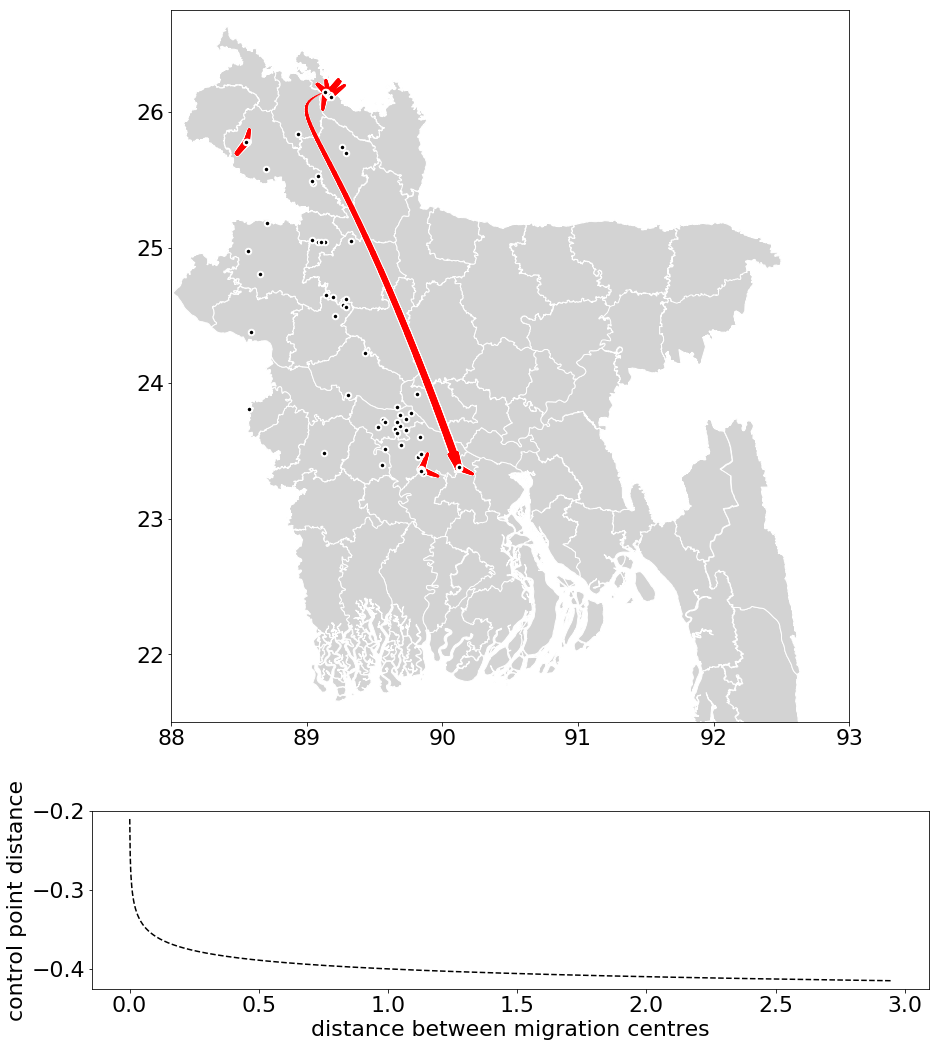

In [49]:
#Objective: Try plotting Bezier curves with points from tree.

#import libraries
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon ## for polygons
from matplotlib.collections import PatchCollection ## for polygons too
from matplotlib.colors import LinearSegmentedColormap ## for colour maps
from matplotlib import gridspec ## for composite figures
import matplotlib.patheffects as path_effects ## for elegant text
from IPython.display import clear_output
from IPython.display import HTML

import datetime
import math
import time
import sys
import imp

import unicodedata
# import unidecode ## for removing diacritics from example geoJSON

import numpy as np
from scipy.interpolate import UnivariateSpline ## used to smooth counts of lineages in each location at any given time
from scipy.interpolate import interp1d ## used to linearly interpolate between data points used in colouring polygons
#from sklearn.decomposition import IncrementalPCA ## used to identify PCA1 when automatically producing a colour map

import bezier ## custom arbitrary order Bezier curves
import requests ## used to fetch examples from internet
import json ## used for importing JSONs
try:
    from StringIO import StringIO as sio
    from cStringIO import StringIO as csio
except ImportError:
    from io import StringIO as sio
    from io import BytesIO as csio
    
def removeDiacritics(string):
    """
    Removes diacritic marks from unicode.
    """
#    output=None
#    if isinstance(string, str):
#        output=string
#    elif isinstance(string, unicode):
#        output=string.encode('utf-8')
#        output=unidecode.unidecode(string)
#        nkfd_form = unicodedata.normalize('NFKD', unicode(string))
#        output= u"".join([c for c in nkfd_form if not unicodedata.combining(c)])
#        output = ''.join((c for c in unicodedata.normalize('NFD', string) if unicodedata.category(c) != 'Mn'))
#        output=unicodedata.normalize('NFKD', string).encode('ASCII', 'ignore')
#    return output
#    return unicodedata.normalize('NFKD', string).encode('ASCII', 'ignore')
    return unicodedata.normalize('NFKD', string)

def calendarTimeline(start_date, end_date, infmt='%Y-%m-%d',outfmt='%Y-%b',optfmt=None,month_step=12):
    """
    Given two calendar dates returns a list of calendar dates at monthly (by default) intervals.
    """
    current_date = datetime.datetime.strptime(start_date,infmt)
    ending_date = datetime.datetime.strptime(end_date,infmt)
    
    timeline=[]
    while current_date <= ending_date:
        if optfmt and current_date.month!=1:
            d=datetime.datetime.strftime(current_date,optfmt)
        else:
            d=datetime.datetime.strftime(current_date,outfmt)
        #print('Current Date:%s'%d)
        timeline.append(d)
        carry, new_month = divmod(current_date.month - 1 + month_step, 12)
        new_month += 1
        current_date = current_date.replace(year=current_date.year + carry,month=new_month)
    return timeline

typeface='Helvetica Neue' ## set default matplotlib font and font size
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22

def Bezier_control(pointA,pointB,height,frac):
    """ 
    Given a line defined by 2 points A & B, 
    find a third point at a given distance (height) that defines a line perpendicular to line AB which intercepts AB 
    at fraction (frac) along AB.
    Equation derived by Luiz Max Fagundes de Carvalho (University of Edinburgh).
    """
    x1,y1=pointA
    x2,y2=pointB

    sign=1
    if x1>x2:
        sign=-1

    slope = (y2-y1) / (x2-x1)
    d=np.sqrt((y2-y1)**2 + (x2-x1)**2) ## distance between points
    
    h=np.sqrt(height**2+(d*frac)**2) ## distance between desired height and point along line

    n1=x1+h*np.cos(np.arctan(height/float(d)/frac)+np.arctan(slope))*sign ## magic
    n2=y1+h*np.sin(np.arctan(height/float(d)/frac)+np.arctan(slope))*sign

    return (n1,n2) ## return third point's coordinate
#**********************************************end of Bezier control function*****************************************

plt.figure(figsize=(15,18),facecolor='w') ## start figure
gs = gridspec.GridSpec(2, 1,height_ratios=[4,1]) ## define subplots
ax1 = plt.subplot(gs[0]) ## map here
ax2 = plt.subplot(gs[1]) ## plot to show relationship between distances between migration centres and the distance of the control point to the straight line connecting migration centres

#Point to baltic.
bt = imp.load_source('baltic','/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/bang_geo_only/baltic.py') ## point to where baltic repo was cloned

#Test code to import my Cauchy MCC tree:
tree_path='/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/bang_geo_only/Nipah_Cauchy_new_HKYG_UCLN_skygrid_1234_log.time.MCC.trees'

bt_tree=bt.loadNexus(tree_path)

#import geoJSON:
json_map=json.load(open('/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/location_variable_testing_2/GEOJSON/bgd_admin2.geojson','r')) ## read from (hopefully saved) local copy

print('Done!')

#Convert geoJSON into matplotlib ploygons:
features=json_map['features']
location_points={} ## location points will be stored here
polygons={} ## polygons will be stored here

locName='ADM2_EN' ## key name for each feature

for loc in features: ## iterate through features (locations)
    poly = np.asarray(loc['geometry']['coordinates']) ## get coordinates
    location=removeDiacritics(loc['properties'][locName]) ## standardised location name (remove diacritics)
#     print(location.encode().decode('utf-8'))
    if location not in ['Isla Sala y Gomez'] and 'Gal' not in location: ## ignore Isla Sala y Gomez
        polygons[location]=[]
        location_points[location]=[]
        if loc['geometry']['type']=='MultiPolygon': ## multiple parts detected
            for part in np.asarray(poly): ## iterate over each component polygon
                for coords in np.asarray(part): ## iterate over coordinates
                    coords=np.array(coords)
                    xs=coords[:,0] ## longitudes
                    ys=coords[:,1] ## latitudes

                    location_points[location].append(np.vstack(zip(xs,ys))) ## append coordinates to location's list of coordinates
        if loc['geometry']['type']=='Polygon': ## location is single part
            for coords in np.asarray(poly): ## iterate over coordinates
                coords=np.array(coords)
                xs=coords[:,0] ## longitudes
                ys=coords[:,1] ## latitudes

                location_points[location].append(np.vstack(zip(xs,ys))) ## append coordinates to location's list of coordinates

        complete_location=[]
        for part in location_points[location]: ## iterate over each component of a location
            complete_location.append(Polygon(part,True)) ## create a polygon for each component of a location

        polygons[location]=complete_location ## assign list of polygons to a location
#     elif location=='Isla Sala y Gomez': ## if location is Isla Sala y Gomez - print a geoJSON entry example
#         print('example geoJSON entry:\n%s\n\nnote that only the coordinate field is called\n'%(loc))
        
#print('polygons loaded:\n%s'%(polygons.keys()))
#********************************end of pulling in map**************************************************

popCentres={} ## dictionary with point coordinates

#Pull in latitude and longitude values from continuous diffusion analysis.
#IE - just parse tree and make a dictionary with node index as key and latitude and longitude values.
longTrait='location1'
latTrait='location2'

for k in bt_tree.Objects: ## iterate over branches
    popCentres[k.index]=(float(k.traits[longTrait]),float(k.traits[latTrait] )) ## assign longitude and latitude to location
        

migration_function={i:{j:None for j in popCentres.keys() if i!=j} for i in popCentres.keys()} ## matrix of pairs of locations that will contain the Bezier function
all_distances=[] ## keep track of all distances
#control=lambda d:1/(np.abs(np.log(d))) ## function that will convert the distance between migration points into a distance 
                                #to be used for finding the control point for a Bezier function
control=lambda d:-1+0.1/float(d)**0.15+0.5
#control=lambda d:30*(1/d)**0.5

for i in popCentres.keys(): ## iterate over locations
    A=popCentres[i] ## fetch origin
    lon,lat=A
    #groupA=aggregation[i] ## get origin's high order group
    #c=group_colours[groupA](normalised_coordinates[i]) ## fetch colour map of the group, colour of location is determined by index of location's coordinates along PCA1
    
    #Set c to black for initial testing.
    c='k'
    
    ax1.scatter(lon,lat,s=30,facecolor=c,edgecolor='w',lw=2,zorder=100) ## plot migration centre
    
    for j in popCentres.keys(): ## iterate over locations again
        if i!=j: ## if not self
            B=popCentres[j] ## fetch destination
            d=np.sqrt((B[1]-A[1])**2 + (B[0]-A[0])**2) ## calculate distance between location A and location B
            
            all_distances.append(d) ## remember actual distince
            
            bez_points=[A] ## Bezier curve will start at point A
            #bez_points.append(Bezier_control(A,B,1/d ,0.1))
            #bez_points.append(Bezier_control(A,B,0.01     ,0.2))
            #bez_points.append(Bezier_control(A,B,-0.02    ,0.3))
            #bez_points.append(Bezier_control(A,B,-d**0.5,0.4))
            bez_points.append(Bezier_control(A,B,control(d),0.01)) ## head towards the first control point, which is perpendicular to line AB at distance control(d), and 0.01 of the way along line AB
            bez_points.append(Bezier_control(A,B,0.0,0.05)) ## head towards second control point, directly on the line AB, 0.1 of the way along line AB
            bez_points.append(B) ## Bezier curve will finish at point B
            bez_points=np.array(bez_points).transpose()
            curve = bezier.Curve(np.asfortranarray(bez_points),degree=len(bez_points)) ## Bezier curve object
            migration_function[i][j]=curve.evaluate_multi ## only interested in calling the evaluate_multi function of the curve, which will return a list of coordinates, given a numpy array of fractions along the line

for loc in polygons.keys():
    ax1.add_collection(PatchCollection(polygons[loc],facecolor='lightgrey',edgecolor='w',zorder=1)) ## plot location polygons

dict_locs=list(popCentres.keys())
print(dict_locs)
for locA in dict_locs:
    #print('In outer for loop')
    for locB in dict_locs[:dict_locs.index(locA)]: ## iterate over pairs of locations
        A=popCentres[locA]
        #print('A')
        #print(locA)
        #print(A)
        B=popCentres[locB]
        #print(locB)
        #print(B)
        d=np.sqrt((B[1]-A[1])**2 + (B[0]-A[0])**2) ## calculate distance between locations A and B
        sD=sorted(all_distances)
        
        if locA!=locB and (d in sD[:30] or d in sD[-7:]): ## if locations aren't the same and are some of the longest  or shortest distances - plot away
            print('d')
            print(d)
            Bezier_smooth=35 ## number of coordinates at which to compute the Bezier curve (more = smoother curve)
            eval_Bezier=np.linspace(0.0,1.0,Bezier_smooth) ## numpy array of 35 values going from 0.0 to 1.0
            migration=migration_function[locA][locB](eval_Bezier) ## compute Bezier curve coordinates along the path
            xs,ys=migration ## unpack Bezier coordinates
            print(A)
            print(B)
            print(xs)
            print(ys)
            for q in range(len(xs)-1): ## iterate through Bezier line segments with fading alpha and reducing width
                x1,y1=xs[q],ys[q] ## coordinates of current point
                x2,y2=xs[q+1],ys[q+1] ## coordinates of next point
                
                segL=(q+1)/float(len(xs)) ## fraction along length of Bezier line
                
                #Commenting out code to just plot fc as black. Haven't initialized aggregation yet.
                #if aggregation[locA]!=aggregation[locB]: ## locations in different high-order groups
                #    fc=group_colours[aggregation[locA]](normalised_coordinates[locA]) ## colour by origin colour
                #else: ## locations in same high-order group
                fc='r' ## colour black
                    
                ax1.plot([x1,x2],[y1,y2],lw=7*segL,alpha=1,color=fc,zorder=99,solid_capstyle='round') ## plot actual lineage with width proportional to position along Bezier curve
                ax1.plot([x1,x2],[y1,y2],lw=10*segL,alpha=1,color='w',zorder=98,solid_capstyle='round') ## plot white outline underneath

#Don't want to worry about this yet:
#for stretch in international_border: ## plot international border
#    xs,ys=zip(*stretch)
#    ax1.plot(xs,ys,color='k',zorder=11,lw=2)
#    ax1.plot(xs,ys,color='w',zorder=10,lw=5)
    
ax1.set_aspect(1) ## equal aspect ratio
ax1.set_xlim(88.0, 93)
ax1.set_ylim(21.5, 26.75)

ax2.plot(sorted(all_distances),list(map(control,sorted(all_distances))),ls='--',color='k') ## plot distances between points against their control point distances
ax2.set_ylabel('control point distance')
ax2.set_xlabel('distance between migration centres')

plt.show()

Done!


/apps/x86_64/python/3.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:150: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


polygons loaded:
dict_keys(['Bagerhat', 'Bandarban', 'Barguna', 'Barisal', 'Bhola', 'Bogra', 'Brahamanbaria', 'Chandpur', 'Chittagong', 'Chuadanga', 'Comilla', "Cox's Bazar", 'Dhaka', 'Dinajpur', 'Faridpur', 'Feni', 'Gaibandha', 'Gazipur', 'Gopalganj', 'Habiganj', 'Jamalpur', 'Jessore', 'Jhalokati', 'Jhenaidah', 'Joypurhat', 'Khagrachhari', 'Khulna', 'Kishoreganj', 'Kurigram', 'Kushtia', 'Lakshmipur', 'Lalmonirhat', 'Madaripur', 'Magura', 'Manikganj', 'Maulvibazar', 'Meherpur', 'Munshiganj', 'Mymensingh', 'Naogaon', 'Narail', 'Narayanganj', 'Narsingdi', 'Natore', 'Nawabganj', 'Netrakona', 'Nilphamari', 'Noakhali', 'Pabna', 'Panchagarh', 'Patuakhali', 'Pirojpur', 'Rajbari', 'Rajshahi', 'Rangamati', 'Rangpur', 'Satkhira', 'Shariatpur', 'Sherpur', 'Sirajganj', 'Sunamganj', 'Sylhet', 'Tangail', 'Thakurgaon'])


/apps/x86_64/python/3.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:209: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/apps/x86_64/python/3.6.1/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Helvetica Neue'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


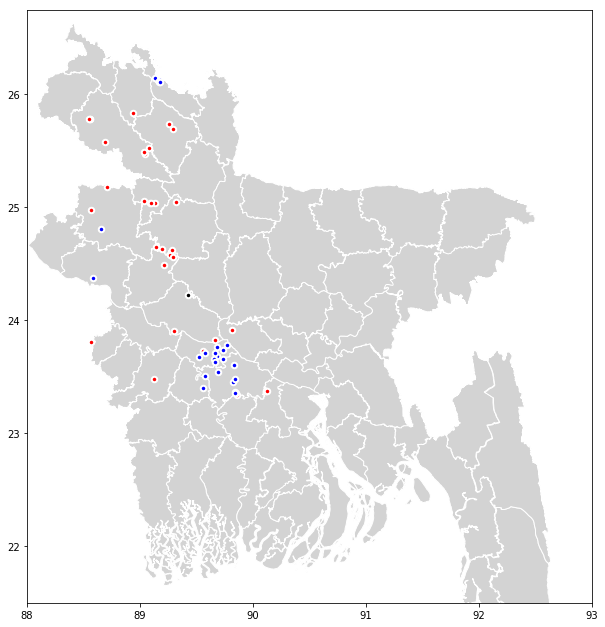

In [4]:
#Well, let's try to animate this silly map:

#import libraries
#Point to baltic.
import imp
bt = imp.load_source('baltic','/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/bang_geo_only/baltic.py') ## point to where baltic repo was cloned


%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon ## for polygons
from matplotlib.collections import PatchCollection ## for polygons too
from matplotlib.colors import LinearSegmentedColormap ## for colour maps
from matplotlib import gridspec ## for composite figures
import matplotlib.patheffects as path_effects ## for elegant text
from IPython.display import clear_output
from IPython.display import HTML

import datetime
import math
import time
import sys
import imp

import unicodedata
# import unidecode ## for removing diacritics from example geoJSON

import numpy as np
from scipy.interpolate import UnivariateSpline ## used to smooth counts of lineages in each location at any given time
from scipy.interpolate import interp1d ## used to linearly interpolate between data points used in colouring polygons
#from sklearn.decomposition import IncrementalPCA ## used to identify PCA1 when automatically producing a colour map

import bezier ## custom arbitrary order Bezier curves
import requests ## used to fetch examples from internet
import json ## used for importing JSONs
try:
    from StringIO import StringIO as sio
    from cStringIO import StringIO as csio
except ImportError:
    from io import StringIO as sio
    from io import BytesIO as csio
    
def removeDiacritics(string):
    """
    Removes diacritic marks from unicode.
    """
#    output=None
#    if isinstance(string, str):
#        output=string
#    elif isinstance(string, unicode):
#        output=string.encode('utf-8')
#        output=unidecode.unidecode(string)
#        nkfd_form = unicodedata.normalize('NFKD', unicode(string))
#        output= u"".join([c for c in nkfd_form if not unicodedata.combining(c)])
#        output = ''.join((c for c in unicodedata.normalize('NFD', string) if unicodedata.category(c) != 'Mn'))
#        output=unicodedata.normalize('NFKD', string).encode('ASCII', 'ignore')
#    return output
#    return unicodedata.normalize('NFKD', string).encode('ASCII', 'ignore')
    return unicodedata.normalize('NFKD', string)

def calendarTimeline(start_date, end_date, infmt='%Y-%m-%d',outfmt='%Y-%b',optfmt=None,month_step=12):
    """
    Given two calendar dates returns a list of calendar dates at monthly (by default) intervals.
    """
    current_date = datetime.datetime.strptime(start_date,infmt)
    ending_date = datetime.datetime.strptime(end_date,infmt)
    
    timeline=[]
    while current_date <= ending_date:
        if optfmt and current_date.month!=1:
            d=datetime.datetime.strftime(current_date,optfmt)
        else:
            d=datetime.datetime.strftime(current_date,outfmt)
        #print('Current Date:%s'%d)
        timeline.append(d)
        carry, new_month = divmod(current_date.month - 1 + month_step, 12)
        new_month += 1
        current_date = current_date.replace(year=current_date.year + carry,month=new_month)
    return timeline

def Bezier_control(pointA,pointB,height,frac):
    """ 
    Given a line defined by 2 points A & B, 
    find a third point at a given distance (height) that defines a line perpendicular to line AB which intercepts AB 
    at fraction (frac) along AB.
    Equation derived by Luiz Max Fagundes de Carvalho (University of Edinburgh).
    """
    x1,y1=pointA
    x2,y2=pointB

    sign=1
    if x1>x2:
        sign=-1

    slope = (y2-y1) / (x2-x1)
    d=np.sqrt((y2-y1)**2 + (x2-x1)**2) ## distance between points
    
    h=np.sqrt(height**2+(d*frac)**2) ## distance between desired height and point along line

    n1=x1+h*np.cos(np.arctan(height/float(d)/frac)+np.arctan(slope))*sign ## magic
    n2=y1+h*np.sin(np.arctan(height/float(d)/frac)+np.arctan(slope))*sign

    return (n1,n2) ## return third point's coordinate
#**********************************************end of Bezier control function*****************************************

smooth=20 ## how many segments Bezier lines will have

#tracking_length=365.0 ## number of days over which to plot the lineage
depth=1
departure_condition = lambda f:f-f ## determines how far away (in Bezier fraction) the tail of the migrating lineage is
transition_point=1.0 ## determines the fixed time point along a branch at which migration happens

plt.figure(figsize=(15,15),facecolor='w') ## start figure
gs = gridspec.GridSpec(2, 1,height_ratios=[4,1]) ## define subplots
ax1 = plt.subplot(gs[0]) ## map here

#import geoJSON:
json_map=json.load(open('/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/location_variable_testing_2/GEOJSON/bgd_admin2.geojson','r')) ## read from (hopefully saved) local copy


#Test code to import my Cauchy MCC tree:
tree_path='/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/bang_geo_only/Nipah_Cauchy_new_HKYG_UCLN_skygrid_1234_log.time.MCC.trees'

bt_tree=bt.loadNexus(tree_path)

print('Done!')

#Convert geoJSON into matplotlib ploygons:
features=json_map['features']
location_points={} ## location points will be stored here
polygons={} ## polygons will be stored here

locName='ADM2_EN' ## key name for each feature

for loc in features: ## iterate through features (locations)
    poly = np.asarray(loc['geometry']['coordinates']) ## get coordinates
    location=removeDiacritics(loc['properties'][locName]) ## standardised location name (remove diacritics)
#     print(location.encode().decode('utf-8'))
    if location not in ['Isla Sala y Gomez'] and 'Gal' not in location: ## ignore Isla Sala y Gomez
        polygons[location]=[]
        location_points[location]=[]
        if loc['geometry']['type']=='MultiPolygon': ## multiple parts detected
            for part in np.asarray(poly): ## iterate over each component polygon
                for coords in np.asarray(part): ## iterate over coordinates
                    coords=np.array(coords)
                    xs=coords[:,0] ## longitudes
                    ys=coords[:,1] ## latitudes

                    location_points[location].append(np.vstack(zip(xs,ys))) ## append coordinates to location's list of coordinates
        if loc['geometry']['type']=='Polygon': ## location is single part
            for coords in np.asarray(poly): ## iterate over coordinates
                coords=np.array(coords)
                xs=coords[:,0] ## longitudes
                ys=coords[:,1] ## latitudes

                location_points[location].append(np.vstack(zip(xs,ys))) ## append coordinates to location's list of coordinates

        complete_location=[]
        for part in location_points[location]: ## iterate over each component of a location
            #print(part)
            complete_location.append(Polygon(part,True)) ## create a polygon for each component of a location

        polygons[location]=complete_location ## assign list of polygons to a location
#     elif location=='Isla Sala y Gomez': ## if location is Isla Sala y Gomez - print a geoJSON entry example
#         print('example geoJSON entry:\n%s\n\nnote that only the coordinate field is called\n'%(loc))
        
print('polygons loaded:\n%s'%(polygons.keys()))
#print(polygons)
#********************************end of pulling in map**************************************************

control=lambda d:-1+0.1/float(d)**0.15+0.5## function that will convert the distance between migration points into a distance 
                                #to be used for finding the control point for a Bezier function

ax1.plot() ## map here

popCentres={} ## dictionary with point coordinates
internal_polygons={} ## dictionary with coordinates of internal node uncertainty polygons
location_points_internal={}
uncertainty_polygons={}

#Pull in latitude and longitude values from continuous diffusion analysis.
#IE - just parse tree and make a dictionary with node index as key and latitude and longitude values.
longTrait='location1'
latTrait='location2'

longPolygon='location1_80%HPD_1'
latPolygon='location2_80%HPD_1'

#Initialize dictionaries with keys of tree indexes, but no values.
for r in bt_tree.Objects: ## iterate over branches
    uncertainty_polygons[r.index]=[]
    location_points_internal[r.index]=[]

#print('uncertainty polygons')
#print(uncertainty_polygons)
#print('locaiton points internal')
#print(location_points_internal)

for k in bt_tree.Objects: ## iterate over branches
    popCentres[k.index]=(float(k.traits[longTrait]),float(k.traits[latTrait] )) ## assign longitude and latitude to location
    
    #Grab internal polygons and uncertanty estimates for internal nodes.
    #Make internal_ploygon with Polygon from internal HPD_80%_estimates.
    if k.branchType == 'node' and k.index != 'Root':
        internal_polygons[k.index]=([float(i) for i in k.traits[longPolygon]],[float(l) for l in k.traits[latPolygon]])
        #print(internal_polygons[k.index][0])
        #print(internal_polygons[k.index][1])
        location_points_internal[k.index]=(np.vstack(zip(internal_polygons[k.index][0],internal_polygons[k.index][1])))
        uncertainty_polygons[k.index].append(Polygon(location_points_internal[k.index], True))
        
        #complete_location_2=[]
        #for part in location_points_internal[k.index]: ## iterate over each component of a location
        #    print(part)
        #    complete_location_2.append(Polygon(part,True)) ## create a polygon for each component of a location

        #uncertainty_polygons[k.index]=complete_location_2 ## assign list of polygons to a location
#print('******************************location_points_internal*************************')
#print(uncertainty_polygons)
    
aggregation={'0':'group 0',
             '1':'group 2',
             '2':'group 2',
             '3':'group 2', 
             '4':'group 2',
             '773':'group 2',
             '3906':'group 2',
             '6319':'group 2',
             '6320':'group 2',
             '6321':'group 2',
             '7082':'group 2', 
             '7083':'group 2', 
             '7084':'group 2',
             '7085':'group 2',
             '7850':'group 2', 
             '7851':'group 2', 
             '7852':'group 2', 
             '8621':'group 2', 
             '8622':'group 2', 
             '12769':'group 2', 
             '19547':'group 2',
             '19548':'group 2',
             '19549':'group 2',
             '23140':'group 2', 
             '28708':'group 2', 
             '36218':'group 2', 
             '36219':'group 2', 
             '36987':'group 2', 
             '42968':'group 2', 
             '42969':'group 2',
             '42970':'group 2',
             '43733':'group 2',
             '50299':'group 2',
             '60809':'group 2',
             '67347':'group 1',
             '67348':'group 1',
             '68116':'group 1',
             '68117':'group 1',
             '68118':'group 1',
             '68119':'group 1',
             '68891':'group 1',
             '71353':'group 1',
             '71354':'group 1',
             '72122':'group 1',
             '72122':'group 1',
             '77072':'group 1',
             '77073':'group 1',
             '77834':'group 1',
             '77835':'group 1',
             '77836':'group 1',
             '77837':'group 1',
             '78593':'group 1',
             '78594':'group 1',
             '82243':'group 1',
             '89994':'group 1',
             '89995':'group 1',
             '90767':'group 1',
             '95074':'group 1',
             '95075':'group 1',
             '98927':'group 1',
             '98928':'group 1',
             '102855':'group 1',
             '102856':'group 1',
             '106741':'group 1',
             '106742':'group 1',
             '110295':'group 1'}

group_colours={'group 0': 'k',
              'group 1': 'b',
              'group 2': 'r'}

    
    
all_distances=[] ## keep track of all distances
migration_function={i:{j:None for j in popCentres.keys() if i!=j} for i in popCentres.keys()} ## matrix of pairs of locations that will contain the Bezier function

    
for i in popCentres.keys(): ## iterate over locations
    A=popCentres[i] ## fetch origin
    lon,lat=A
    groupA=aggregation[str(i)] ## get origin's high order group
    c=group_colours[groupA] ## fetch colour map of the group, colour of location is determined by index of location's coordinates along PCA1
    
    #Set c to black for initial testing.
    #c='k'
    
    ax1.scatter(lon,lat,s=30,facecolor=c,edgecolor='w',lw=2,zorder=100) ## plot migration centre
    
    for j in popCentres.keys(): ## iterate over locations again
        if i!=j: ## if not self
            B=popCentres[j] ## fetch destination
            d=np.sqrt((B[1]-A[1])**2 + (B[0]-A[0])**2) ## calculate distance between location A and location B
            
            all_distances.append(d) ## remember actual distince
            
            bez_points=[A] ## Bezier curve will start at point A
            #bez_points.append(Bezier_control(A,B,1/d ,0.1))
            #bez_points.append(Bezier_control(A,B,0.01     ,0.2))
            #bez_points.append(Bezier_control(A,B,-0.02    ,0.3))
            #bez_points.append(Bezier_control(A,B,-d**0.5,0.4))
            bez_points.append(Bezier_control(A,B,0.01,0.01)) ## head towards the first control point, which is perpendicular to line AB at distance control(d), and 0.01 of the way along line AB
            bez_points.append(Bezier_control(A,B,0.0,0.1)) ## head towards second control point, directly on the line AB, 0.1 of the way along line AB
            bez_points.append(B) ## Bezier curve will finish at point B
            bez_points=np.array(bez_points).transpose()
            curve = bezier.Curve(np.asfortranarray(bez_points),degree=len(bez_points)) ## Bezier curve object
            migration_function[i][j]=curve.evaluate_multi ## only interested in calling the evaluate_multi function of the curve, which will return a list of coordinates, given a numpy array of fractions along the line


for loc in polygons.keys():
    ax1.add_collection(PatchCollection(polygons[loc],facecolor='lightgrey',edgecolor='w',zorder=1)) ## plot location polygons

shape_file=gpd.read_file('/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/location_variable_testing_2/GEOJSON/bangladesh-latest-free/gis_osm_water_a_free_1.shp')

#Rename rows by fclass column values:
shape_file=shape_file.set_index('fclass')
rivers_shape_file=shape_file.loc[['river', 'water']]
#shape_file.info()

time_point=bt.decimalDate('2017-01-01') ## arbitrary time point at which to render the frame

#ax1.text(0.05,0.1,'Epi week: %s\nDecimal time: %.3f'%(convertDate(dates2[t],'%Y-%m-%d','%Y-%b-%d'),decimalDate(dates2[t])+(delta_time*tr)),size=40,transform=ax1.transAxes) ## add text to indicate current time point
    

locA=''
for k in bt_tree.Objects: ## iterate over branches
    #print(k.parent.absoluteTime)
    #print(k.absoluteTime)
    #print(time_point)
    locA=k.parent.index ## get index of parent
    locB=k.index ## get index of branch
    #print(popCentres[locA])
    #print(popCentres[locB])
    groupA=aggregation[str(k.index)] ## get origin's high order group
    fc=group_colours[groupA] ## fetch colour map of the group, colour of location is determined by index of location's coordinates along PCA1
    
    
    if locA!='' and locA!=locB and k.parent.absoluteTime!=None and k.parent.absoluteTime<time_point<=k.absoluteTime: ## if parent location is present, locations don't match, and branch is intersected
        transition=k.parent.absoluteTime+k.length*transition_point ## migration time
        tracking_length=k.length
        #print(transition)
        #print('In if loop')
        #print((transition-time_point)/float(depth))
        begin_bezier=((time_point-k.parent.absoluteTime)/(k.absoluteTime-k.parent.absoluteTime)) ## migrating lineage's head
        #begin_bezier=(current_time/transition) #To have line start at k.node and it is not animated by time.
        end_bezier=departure_condition(begin_bezier) ## migrating lineage's tail
        #print(begin_bezier)
        #print(end_bezier)
        
        #begin_bezier,end_bezier = np.clip([begin_bezier,end_bezier],0.0,1.0) ## restrict to interval [0,1]
        
        #print(begin_bezier)
        #print(end_bezier)
        

        
        if end_bezier<=1.0 and begin_bezier>=0.0 and begin_bezier<=1.0: ## if lineage should still be visible (head departed and tail hasn't arrived)
            points=np.linspace(end_bezier,begin_bezier,smooth) ## get a bunch of points between the start and end of migrating lineage
            #print(points)
            #print(popCentres[locA])
            #print(popCentres[locB])
            
            #If an an internal node, plot uncertanty estimates for internal nodes.
            if k.branchType == 'node' or k.index == 0:
                ax1.add_collection(PatchCollection(uncertainty_polygons[k.index],facecolor=c,alpha=0.5,edgecolor='w',zorder=80)) ## plot location polygons

            A=popCentres[k.index] ## fetch origin
            lon,lat=A
            #Plot points
            if k.branchType == 'leaf':
                ax1.scatter(lon,lat,s=120,facecolor=c,edgecolor='w',lw=2,zorder=100) ## plot migration centre
            elif k.branchType == 'node':
                ax1.scatter(lon,lat,s=30,facecolor=c,edgecolor='w',lw=2,zorder=100) ## plot migration centre
                
            
            bezier_line=migration_function[locA][locB](points) ## get coordinates of the migrating lineage
            #print(bezier_line)
            xs,ys=bezier_line
            for q in range(len(xs)-1): ## iterate through Bezier line segments with fading alpha and reducing width
                x1,y1=xs[q],ys[q] ## get coordinates for current segment's start
                x2,y2=xs[q+1],ys[q+1] ## get coordinates for current segment's end
                segL=(q+1)/float(len(xs)) ## fraction along length of Bezier line
                
                ax1.plot([x1,x2],[y1,y2],lw=7*segL,alpha=1,color=fc,zorder=99,solid_capstyle='round') ## plot actual lineage
                ax1.plot([x1,x2],[y1,y2],lw=10*segL,alpha=1,color='w',zorder=98,solid_capstyle='round') ## plot underlying white background to help lineages stand out

#Ignore international border stuff.
#for stretch in international_border: ## plot international border
#    xs,ys=zip(*stretch)
#    ax1.plot(xs,ys,color='k',zorder=11,lw=2)
#    ax1.plot(xs,ys,color='w',zorder=10,lw=5)
    
ax1.set_aspect(1) ## equal aspect ratio
ax1.set_xlim(88.0, 93)
ax1.set_ylim(21.5, 26.75)

rivers_shape_file.plot(ax=ax1, facecolor='lightblue')

plt.show()

[============                                      ]  25.00%  frame:    20 1982.6455696202531  time:  3.37 min  ETA: 10.12 min (0.16866 s/operation) 3 5 0

KeyboardInterrupt: 

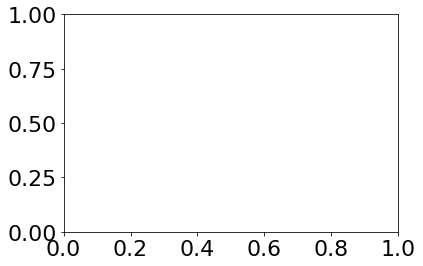

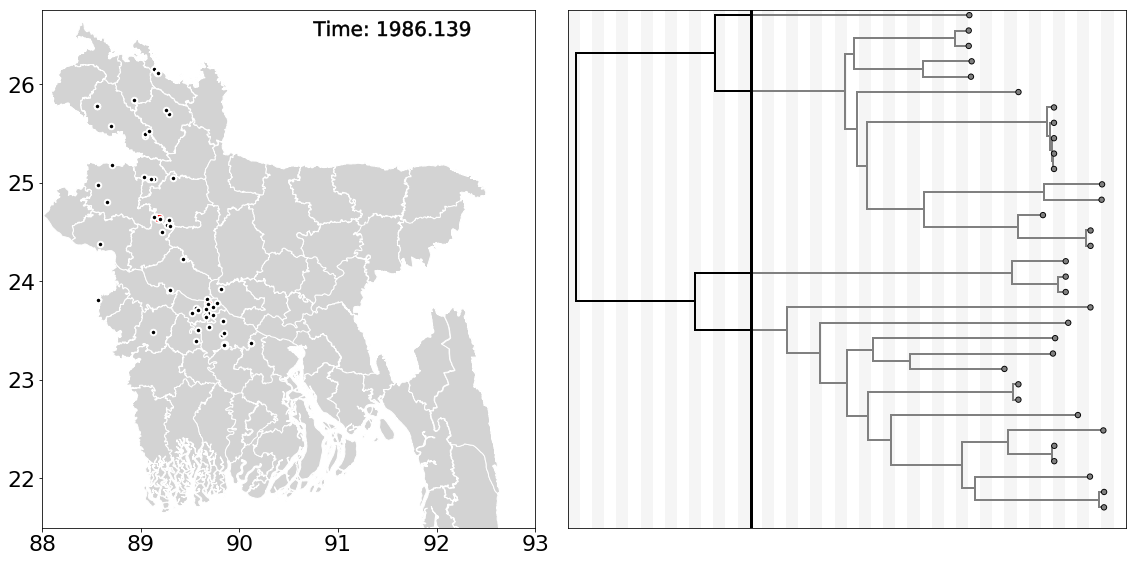

In [3]:
#OK, let's combine the animated tree and try to include my map next to it.

#This code is from curonia.py from Gytis Dudas.
#module load Python/3.6.1
#jupyter notebook

#Point to baltic.
import imp
bt = imp.load_source('baltic','/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/bang_geo_only/baltic.py') ## point to where baltic repo was cloned

#import libraries
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon ## for polygons
from matplotlib.collections import PatchCollection ## for polygons too
from matplotlib.colors import LinearSegmentedColormap ## for colour maps
from matplotlib import gridspec ## for composite figures
import matplotlib.patheffects as path_effects ## for elegant text
from IPython.display import clear_output
from IPython.display import HTML

import datetime
import math
import time
import sys

import descarteslabs as dl
import geopandas as gpd

import unicodedata
# import unidecode ## for removing diacritics from example geoJSON

import numpy as np
from scipy.interpolate import UnivariateSpline ## used to smooth counts of lineages in each location at any given time
from scipy.interpolate import interp1d ## used to linearly interpolate between data points used in colouring polygons
from sklearn.decomposition import IncrementalPCA ## used to identify PCA1 when automatically producing a colour map

import bezier ## custom arbitrary order Bezier curves
import requests ## used to fetch examples from internet
import json ## used for importing JSONs
try:
    from StringIO import StringIO as sio
    from cStringIO import StringIO as csio
except ImportError:
    from io import StringIO as sio
    from io import BytesIO as csio
    
def removeDiacritics(string):
    """
    Removes diacritic marks from unicode.
    """
#    output=None
#    if isinstance(string, str):
#        output=string
#    elif isinstance(string, unicode):
#        output=string.encode('utf-8')
#        output=unidecode.unidecode(string)
#        nkfd_form = unicodedata.normalize('NFKD', unicode(string))
#        output= u"".join([c for c in nkfd_form if not unicodedata.combining(c)])
#        output = ''.join((c for c in unicodedata.normalize('NFD', string) if unicodedata.category(c) != 'Mn'))
#        output=unicodedata.normalize('NFKD', string).encode('ASCII', 'ignore')
#    return output
#    return unicodedata.normalize('NFKD', string).encode('ASCII', 'ignore')
    return unicodedata.normalize('NFKD', string)

def calendarTimeline(start_date, end_date, infmt='%Y-%m-%d',outfmt='%Y-%b',optfmt=None,month_step=12):
    """
    Given two calendar dates returns a list of calendar dates at monthly (by default) intervals.
    """
    current_date = datetime.datetime.strptime(start_date,infmt)
    ending_date = datetime.datetime.strptime(end_date,infmt)
    
    timeline=[]
    while current_date <= ending_date:
        if optfmt and current_date.month!=1:
            d=datetime.datetime.strftime(current_date,optfmt)
        else:
            d=datetime.datetime.strftime(current_date,outfmt)
        timeline.append(d)
        carry, new_month = divmod(current_date.month - 1 + month_step, 12)
        new_month += 1
        current_date = current_date.replace(year=current_date.year + carry,month=new_month)
    return timeline

def Bezier_control(pointA,pointB,height,frac):
    """ 
    Given a line defined by 2 points A & B, 
    find a third point at a given distance (height) that defines a line perpendicular to line AB which intercepts AB 
    at fraction (frac) along AB.
    Equation derived by Luiz Max Fagundes de Carvalho (University of Edinburgh).
    """
    x1,y1=pointA
    x2,y2=pointB

    sign=1
    if x1>x2:
        sign=-1

    slope = (y2-y1) / (x2-x1)
    d=np.sqrt((y2-y1)**2 + (x2-x1)**2) ## distance between points
    
    h=np.sqrt(height**2+(d*frac)**2) ## distance between desired height and point along line

    n1=x1+h*np.cos(np.arctan(height/float(d)/frac)+np.arctan(slope))*sign ## magic
    n2=y1+h*np.sin(np.arctan(height/float(d)/frac)+np.arctan(slope))*sign

    return (n1,n2) ## return third point's coordinate
#**********************************************end of Bezier control function*****************************************


def animate(frame):
    #### Primary plotting (map)
    ax1.lines=[line for line in ax1.lines if 'polygon' in line.get_label()] ## reset lines (except borders) and texts in the plot
    ax1.texts=[] ## remove all text from plot

    if len(animation_grid)-1==frame: ## if at last frame
        next_time=animation_grid[frame] ## current frame is next frame
    else:
        next_time=animation_grid[frame+1] ## next frame
        
    current_time=animation_grid[frame]
    
    
    effects=[path_effects.Stroke(linewidth=4, foreground='white'),
                 path_effects.Stroke(linewidth=0.5, foreground='k')] ## black text, white outline
    ax1.text(0.55,0.95,'Time: %.3f'%(current_time),size=20,transform=ax1.transAxes,zorder=1000,path_effects=effects) ## add text to indicate current time point
    

    #Find the branches in tree that we want to trace.
    exists=[k for k in bt_tree.Objects if k.parent!=bt_tree.root and k.parent.absoluteTime!=None and k.parent.absoluteTime<=current_time<=k.absoluteTime] ## identify lineages that exist at current timeslice

    #lineage_locations=[c.traits[locTrait] for c in exists if c.traits[locTrait]!='Not Available'] ## identify locations where lineages are present
    #presence=set(lineage_locations) ## all locations where lineages currently are in the tree
    
    #Changed above code to have presence trace all of the tree branches.
    presence=set(exists)
    
    update=10 ## update progress bar every X frames
    
    #### Secondary plotting (tree)
    Ls2=[x for x in ax2.lines if 'Colour' not in str(x.get_label())] ## fetch all lines in plot
    partials=[x for x in ax2.lines if 'partial' in str(x.get_label())] ## fetch all tree branches in progress
    finished_lines=[x for x in ax2.lines if 'finished' in str(x.get_label())] ## fetch all tree branches that are finished
    finished_points=[x for x in ax2.collections if 'finished' in str(x.get_label())] ## fetch all tip circles that are finished
    
    finished_labels=[str(x.get_label()) for x in finished_lines]+[str(x.get_label()) for x in finished_points] ## combine everything that's finished (branches + tip circles)
    partial_labels=[str(x.get_label()) for x in partials] ## partially plotted branches
    
    if frame>0 and frame%update==0: ## progress bar
        clear_output()
        timeElapsed=(time.time() - t0)/60.0
        progress=int((frame*(50/float(len(animation_grid)))))
        percentage=frame/float(len(animation_grid))*100
        rate=timeElapsed/float(frame)
        ETA=rate*(len(animation_grid)-frame)
        sys.stdout.write("[%-50s] %6.2f%%  frame: %5d %10s  time: %5.2f min  ETA: %5.2f min (%6.5f s/operation) %s %s %s" % ('='*progress,percentage,frame,animation_grid[frame],timeElapsed,ETA,rate,len(partials),len(finished_lines),len(finished_points)))
        sys.stdout.flush()

        
    #***********************Animate map!******************************************************************
    smooth=20 ## how many segments Bezier lines will have

    #tracking_length=365.0 ## number of days over which to plot the lineage
    depth=1
    departure_condition = lambda f:f-f ## determines how far away (in Bezier fraction) the tail of the migrating lineage is
    transition_point=1.0 ## determines the fixed time point along a branch at which migration happens
    locA=''
    #***********************Animate map!******************************************************************
    
    ####
    ## COMMENT this bit out if you don't want the tree to appear out of the time arrow
    ####
    
    for ap in bt_tree.Objects: ## iterate over branches
        idx='%s'%(ap.index) ## get unique id of branch
        xp=ap.parent.absoluteTime ## get parent's time

        x=ap.absoluteTime ## get branch's time
        y=ap.y ## get branch's y coordinate

        #location=ap.traits[locTrait] ## get branch's location
        aggregation={'1':'group 1', 
                     '2':'group 2',
                     '3':'group 2', 
                     '4':'group 1', 
                     '5':'group 1', 
                     '6':'group 1', 
                     '7':'group 1', 
                     '8':'group 1', 
                     '9':'group 2', 
                     '10':'group 2', 
                     '11':'group 1', 
                     '12':'group 2', 
                     '13':'group 2',
                     '14':'group 2',
                     '15':'group 2', 
                     '16':'group 2', 
                     '17':'group 2', 
                     '18':'group 1', 
                     '19':'group 2', 
                     '20':'group 2', 
                     '21':'group 1',
                     '22':'group 2',
                     '23':'group 1',
                     '24':'group 1', 
                     '25':'group 2', 
                     '26':'group 2', 
                     '27':'group 1', 
                     '28':'group 1', 
                     '29':'group 1', 
                     '30':'group 1',
                     '31':'group 1',
                     '32':'group 2',
                     '33':'group 2'}
                     
        ## aggregate individual locations into higher-order groups (e.g. subdivisions into a country)

        #group=aggregation[location] ## get location's group
        #cmap=group_colours[group] ## get group colour map
        #c=cmap(normalised_coordinates[location]) ## get colour
        
        #Setting C to black for initial testing.
        c='k'
        
        if xp!=None and xp<=current_time<x: ## branch is intersected by time arrow
            if 'partial_%s'%(idx) in partial_labels: ## if branch was partially drawn before
                l=[w for w in partials if 'partial_%s'%(idx)==str(w.get_label())][-1] ## get branch line
                l.set_data([xp,current_time],[y,y]) ## adjust its end coordinate to be time arrow
            else: ## branch is intersected, but not drawn before
                ax2.plot([xp,current_time],[y,y],lw=branchWidth,color=c,zorder=99,label='partial_%s'%(ap.index)) ## draw branch ending at time arrow, label as partially drawn
                
        if x<=current_time: ## time arrow passed branch - add it to finished class
            if 'partial_%s'%(idx) in partial_labels: ## if branch has been partially drawn before
                l=[w for w in partials if 'partial_%s'%(idx)==str(w.get_label())][-1] ## get branch
                l.set_data([xp,x],[y,y]) ## set end coordinate to be actual end coordinate
                l.set_label('finished_%s'%(idx)) ## set its label to finished
                
            if 'finished_%s'%(idx) not in finished_labels: ## branch has not been drawn before at all
                ax2.plot([xp,x],[y,y],lw=branchWidth,color=c,zorder=99,label='finished_%s'%(ap.index)) ## draw branch, add to finished class
                
            if 'partial_%s'%(idx) in partial_labels or 'finished_%s'%(idx) not in finished_labels: 
                if ap.branchType=='leaf': ## if leaf
                    ax2.scatter(x,y,s=tipSize,facecolor=c,edgecolor='none',zorder=102,label='finished_%s'%(ap.index)) ## add tip circle
                    ax2.scatter(x,y,s=tipSize*2,facecolor='k',edgecolor='none',zorder=101,label='finished_%s'%(ap.index)) ## add tip circle outline underneath
                elif ap.branchType=='node': ## if node
                    yl=ap.children[0].y ## get y coordinates of first and last child
                    yr=ap.children[-1].y
                    ax2.plot([x,x],[yl,yr],lw=branchWidth,color=c,zorder=99,label='finished_%s'%(ap.index)) ## plot vertical bar for node
    ####
    ## COMMENT this bit out if you don't want the tree to appear out of the time arrow
    ####
                
    #****************************end of animate tree***************************************************************  
    
    #****************************beginning of animate map***************************************************************
        #print(k.parent.absoluteTime)
        #print(k.absoluteTime)
        #print(time_point)
        locA=ap.parent.index ## get index of parent
        locB=ap.index ## get index of branch
        #print(popCentres[locA])
        #print(popCentres[locB])
        #print('Current time:')
        #print(current_time)
        #print("branch absolute time")
        #print(ap.absoluteTime)
    
        if locA!='' and locA!=locB and ap.parent.absoluteTime!=None and ap.parent.absoluteTime<current_time<=ap.absoluteTime: ## if parent location is present, locations don't match, and branch is intersected
            #print('Current time:')
            #print(current_time)
            #print("branch absolute time")
            #print(ap.absoluteTime)
            
            transition=ap.parent.absoluteTime+ap.length*transition_point ## migration time
            tracking_length=ap.length
            #print(current_time)
            #print(ap.absoluteTime)
            #print('In if loop')
            #print((transition-time_point)/float(depth))
            begin_bezier=((current_time-ap.parent.absoluteTime)/(ap.absoluteTime-ap.parent.absoluteTime)) 
            #begin_bezier=(current_time/transition) ## migrating lineage's head
            end_bezier=departure_condition(begin_bezier) ## migrating lineage's tail
            #print(begin_bezier)
            #print(end_bezier)
        
            #begin_bezier,end_bezier = np.clip([begin_bezier,end_bezier],0.0,1.0) ## restrict to interval [0,1]
        
            #print(begin_bezier)
            #print(end_bezier)

        
            if end_bezier<=1.0 and begin_bezier>=0.0 and begin_bezier<=1.0: ## if lineage should still be visible (head departed and tail hasn't arrived)
                points=np.linspace(end_bezier,begin_bezier,smooth) ## get a bunch of points between the start and end of migrating lineage
                #print('Entering map plotting loop*************************************')
                #print(points)
                #print(popCentres[locA])
                #print(popCentres[locB])
            
                bezier_line=migration_function[locA][locB](points) ## get coordinates of the migrating lineage
                #print(bezier_line)
                xs,ys=bezier_line
                for q in range(len(xs)-1): ## iterate through Bezier line segments with fading alpha and reducing width
                    x1,y1=xs[q],ys[q] ## get coordinates for current segment's start
                    x2,y2=xs[q+1],ys[q+1] ## get coordinates for current segment's end
                    segL=(q+1)/float(len(xs)) ## fraction along length of Bezier line
                
                    #Commenting the color stuff out, just plot one color.
                    #if aggregation[locA]!=aggregation[locB]: ## locations in different high-order groups
                    #    fc=group_colours[aggregation[locA]](normalised_coordinates[locA]) ## colour by origin colour
                    #else: ## locations in same high-order group
                    #    fc='k' ## colour black
                    fc='r'
                
                    ax1.plot([x1,x2],[y1,y2],lw=7*segL,alpha=1,color=fc,zorder=99,solid_capstyle='round') ## plot actual lineage
                    ax1.plot([x1,x2],[y1,y2],lw=10*segL,alpha=1,color='w',zorder=98,solid_capstyle='round') ## plot underlying white background to help lineages stand out
    #***********************END of Animate map!******************************************************************
    
    for l in Ls2: ## iterate over lines in tree
        if 'time' in l.get_label(): ## if line is time arrow
            l.set_data([current_time,current_time],[0,1]) ## adjust time arrow

#*************************************end of animate definition*******************************************************


                    
#*************************************************************beginning of program main******************************

typeface='Helvetica Neue' ## set default matplotlib font and font size
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22

figWidth=10 ## map figure width
dpi=60 ## dots per inch for each .png (90 used in the final version)
every=12 ## put months labels every number of months

#Test code to import my Cauchy MCC tree:
tree_path='/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/bang_geo_only/Nipah_Cauchy_new_HKYG_UCLN_skygrid_1234_log.time.MCC.trees'

bt_tree=bt.loadNexus(tree_path)

popCentres={} ## dictionary with point coordinates
internal_polygons={} ## dictionary with coordinates of internal node uncertainty polygons

#Pull in latitude and longitude values from continuous diffusion analysis.
#IE - just parse tree and make a dictionary with node index as key and latitude and longitude values.
longTrait='location1'
latTrait='location2'

longPolygon='location1_80%HPD_1'
latPolygon='location2_80%HPD_1'

for k in bt_tree.Objects: ## iterate over branches
    popCentres[k.index]=(float(k.traits[longTrait]),float(k.traits[latTrait] )) ## assign longitude and latitude to location
    
    #Grab internal polygons and uncertanty estimates for internal nodes.
    if k.branchType == 'node' and k.index != 'Root':
        internal_polygons[k.index]=([float(i) for i in k.traits[longPolygon]],[float(l) for l in k.traits[latPolygon]])
    
    
    
#Find the right coordinates for the map and tree.
#Width and height ratios are the lat and lon values from the map.
map_width=(93.0-88.0)
map_height=(26.75-21.5)
ratio=map_width/float(map_height) ## aspect ratio of map

plt.clf() 
plt.cla()
plt.figure(figsize=(figWidth*2,figWidth*ratio),facecolor='w') ## start figure
gs = gridspec.GridSpec(ncols=2, nrows=1,wspace=0.0,hspace=0.0) ## define subplots
ax1 = plt.subplot(gs[0]) ## map here
ax2 = plt.subplot(gs[1]) ## Tree

#frame='<iframe style="border: 0; width: 400px; height: 472px;" src="https://bandcamp.com/EmbeddedPlayer/album=29809561/size=large/bgcol=333333/linkcol=e99708/artwork=small/transparent=true/" seamless><a href="http://romowerikoito.bandcamp.com/album/nawam-r">NAWAMAR by Romowe Rikoito</a></iframe>'

print('Done!')
#HTML(frame)


#import geoJSON:
json_map=json.load(open('/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/location_variable_testing_2/GEOJSON/bgd_admin2.geojson','r')) ## read from (hopefully saved) local copy

print('Done!')

#Convert geoJSON into matplotlib ploygons:
features=json_map['features']
location_points={} ## location points will be stored here
polygons={} ## polygons will be stored here

locName='ADM2_EN' ## key name for each feature

for loc in features: ## iterate through features (locations)
    poly = np.asarray(loc['geometry']['coordinates']) ## get coordinates
    location=removeDiacritics(loc['properties'][locName]) ## standardised location name (remove diacritics)
#     print(location.encode().decode('utf-8'))
    if location not in ['Isla Sala y Gomez'] and 'Gal' not in location: ## ignore Isla Sala y Gomez
        polygons[location]=[]
        location_points[location]=[]
        if loc['geometry']['type']=='MultiPolygon': ## multiple parts detected
            for part in np.asarray(poly): ## iterate over each component polygon
                for coords in np.asarray(part): ## iterate over coordinates
                    coords=np.array(coords)
                    xs=coords[:,0] ## longitudes
                    ys=coords[:,1] ## latitudes

                    location_points[location].append(np.vstack(zip(xs,ys))) ## append coordinates to location's list of coordinates
        if loc['geometry']['type']=='Polygon': ## location is single part
            for coords in np.asarray(poly): ## iterate over coordinates
                coords=np.array(coords)
                xs=coords[:,0] ## longitudes
                ys=coords[:,1] ## latitudes

                location_points[location].append(np.vstack(zip(xs,ys))) ## append coordinates to location's list of coordinates

        complete_location=[]
        for part in location_points[location]: ## iterate over each component of a location
            complete_location.append(Polygon(part,True)) ## create a polygon for each component of a location

        polygons[location]=complete_location ## assign list of polygons to a location
#     elif location=='Isla Sala y Gomez': ## if location is Isla Sala y Gomez - print a geoJSON entry example
#         print('example geoJSON entry:\n%s\n\nnote that only the coordinate field is called\n'%(loc))
        
#print('polygons loaded:\n%s'%(polygons.keys()))
#********************************end of pulling in map**************************************************

#***************************************#Make Matrix of location distances*******************************************
control=lambda d:1/((np.sqrt(np.abs(np.log(d))))*2) ## function that will convert the distance between migration points into a distance 
                                #to be used for finding the control point for a Bezier function

all_distances=[] ## keep track of all distances
migration_function={i:{j:None for j in popCentres.keys() if i!=j} for i in popCentres.keys()} ## matrix of pairs of locations that will contain the Bezier function

for i in popCentres.keys(): ## iterate over locations
    A=popCentres[i] ## fetch origin
    lon,lat=A
    #groupA=aggregation[i] ## get origin's high order group
    #c=group_colours[groupA](normalised_coordinates[i]) ## fetch colour map of the group, colour of location is determined by index of location's coordinates along PCA1
    
    #Set c to black for initial testing.
    c='k'
    
    for j in popCentres.keys(): ## iterate over locations again
        if i!=j: ## if not self
            B=popCentres[j] ## fetch destination
            d=np.sqrt((B[1]-A[1])**2 + (B[0]-A[0])**2) ## calculate distance between location A and location B
            
            all_distances.append(d) ## remember actual distince
            
            bez_points=[A] ## Bezier curve will start at point A
            #bez_points.append(Bezier_control(A,B,1/d ,0.1))
            #bez_points.append(Bezier_control(A,B,0.01     ,0.2))
            #bez_points.append(Bezier_control(A,B,-0.02    ,0.3))
            #bez_points.append(Bezier_control(A,B,-d**0.5,0.4))
            #bez_points.append(Bezier_control(A,B,control(d),0.01)) ## head towards the first control point, which is perpendicular to line AB at distance control(d), and 0.01 of the way along line AB
            bez_points.append(Bezier_control(A,B,0.01,0.01)) ## head towards the first control point, which is perpendicular to line AB at distance control(d), and 0.01 of the way along line AB
            bez_points.append(Bezier_control(A,B,0.0,0.1)) ## head towards second control point, directly on the line AB, 0.1 of the way along line AB
            bez_points.append(B) ## Bezier curve will finish at point B
            bez_points=np.array(bez_points).transpose()
            curve = bezier.Curve(np.asfortranarray(bez_points),degree=len(bez_points)) ## Bezier curve object
            migration_function[i][j]=curve.evaluate_multi ## only interested in calling the evaluate_multi function of the curve, which will return a list of coordinates, given a numpy array of fractions along the line
#***************************************Make Matrix of location distances*******************************************

# locTrait='location' ## name of locations in the tree
locTrait='location2_median'

t0 = time.time() ## time how long animation takes


start='1971-01-01' ## start date of animation
end='2017-01-01' ## end date of animation

animation_grid=list(np.linspace(bt.decimalDate(start),bt.decimalDate(end),80)) ## few frames from 2011 to 2015
#animation_grid+=list(np.linspace(bt.decimalDate('1975-06-01'),bt.decimalDate(end),5)) ## many frames from 2015 to 2016
#animation_grid+=list(np.linspace(bt.decimalDate('2018-06-01'),bt.decimalDate(end),20)) ## medium frames from 2016 to 2018

tipSize=20 ## size of tip circles in tree
branchWidth=2 ## line width of tree branches

animation_duration=60.0 ## seconds

print('Start of animation: %.2f\nEnd: %.2f'%(min(animation_grid),max(animation_grid)))

print(len([x for x in bt_tree.Objects if locTrait not in x.traits]))

print('Number of frames to animate: %d'%(len(animation_grid)))
            
global travelers ## the animation will need to have information to traveling lineages
travelers=[x for x in bt_tree.Objects if x!=bt_tree.root] ## find lineages that have travelled - they're what's going to be animated
print('\nNumber of travelling lineages: %d (%.3f%% of all lineages)'%(len(travelers),len(travelers)/float(len(bt_tree.Objects))*100))


#ax2 = plt.axes()## ax2 is tree


xtimeline=calendarTimeline(start,end,'%Y-%m-%d','%Y-%m-%d') ## create timeline from start to end of animation delimited with months
#print('xtimeline:')
#print(xtimeline)
xpos=[bt.decimalDate(b) for b in xtimeline] ## convert calendar dates to decimal time
#print('xpos:')
#print(xpos)
xlabels=[(bt.convertDate(b,'%Y-%m-%d','%b\n%Y') if '-01-' in b else bt.convertDate(b,'%Y-%m-%d','%b')) if (int(b.split('-')[1])+every-1)%every==0 else '' for b in xtimeline] ## month or year-month (if January) tick labels every given number of months
#print('xlabels:')
#print(xlabels[0::10])

################
## Tertiary plot begins - TREE
################

####
## UNCOMMENT if you'd like the tree to be plotted in grey initially and get coloured over time
####
# iterate over objects in tree
for k in bt_tree.Objects:
    #loc=k.traits[locTrait] ## get branch location
    #group=aggregation[loc]
    #cmap=group_colours[group] ## get colour map
    #c=cmap(normalised_coordinates[loc]) ## fixed colour for location
    
    #set c = black for now.
    c='k'
    
    mask_cmap=mpl.cm.Greys ## colour map that goes on top of lines
    #grey_colour=mask_cmap((sorted_group.index(group)+1)/float(len(sorted_group)+2)) ## get colour based on index of location in list, avoiding white colour
    grey_colour="grey"
    
    y=k.y
    yp=k.parent.y
    
    x=k.absoluteTime
    xp=k.parent.absoluteTime
    
    if k.branchType=='leaf':
        ax2.scatter(x,y,s=tipSize,facecolor=grey_colour,edgecolor='none',zorder=102,label='LeafBW_%s'%(k.index)) ## plot black and white tip circle on top
        ax2.scatter(x,y,s=tipSize,facecolor=c,edgecolor='none',zorder=101,label='LeafColour_%s'%(k.index)) ## plot colour tip circle underneath black and white tip circle
        ax2.scatter(x,y,s=tipSize*2,facecolor='k',edgecolor='none',zorder=100,label='Colour') ## black outline underneath every tip
        
    elif k.branchType=='node':
        yl=k.children[0].y
        yr=k.children[-1].y
       
        if xp==0.0:
            xp=x

        ax2.plot([x,x],[yl,yr],color=grey_colour,lw=branchWidth,zorder=99,label='NodeHbarBW_%s'%(k.index))
        ax2.plot([x,x],[yl,yr],color=c,lw=branchWidth,zorder=98,label='NodeHbarColour_%s'%(k.index))
        
    ax2.plot([xp,x],[y,y],color=grey_colour,lw=branchWidth,zorder=99,label='BranchBW_%s'%(k.index)) ## plot black and white branch on top
    ax2.plot([xp,x],[y,y],color=c,lw=branchWidth,zorder=98,label='BranchColour_%s'%(k.index)) ## plot colour branch underneath black and white branch (note the zorder attribute)
    
####
## UNCOMMENT if you'd like the tree to be plotted in grey initially and get coloured over time
####

       
for i in popCentres.keys(): ## iterate over locations
    A=popCentres[i] ## fetch origin
    lon,lat=A
    #groupA=aggregation[i] ## get origin's high order group
    #c=group_colours[groupA](normalised_coordinates[i]) ## fetch colour map of the group, colour of location is determined by index of location's coordinates along PCA1
    
    #Set c to black for initial testing.
    c='k'
    
    ax1.scatter(lon,lat,s=30,facecolor=c,edgecolor='w',lw=2,zorder=100) ## plot migration centre
    
for loc in polygons.keys():
    ax1.add_collection(PatchCollection(polygons[loc],facecolor='lightgrey',label='polygon', edgecolor='w',zorder=1)) ## plot location polygons
    
#ax1.plot()## ax1 is map
ax1.set_aspect(1) ## equal aspect ratio
ax1.set_xlim(88.0, 93)
ax1.set_ylim(21.5, 26.75)

ax2.axvline(xpos[0],color='k',lw=3,label='time',zorder=200) ## add time arrow to indicate current time

ax2.set_xticks([x+5 for x in xpos]) ## add ticks, tick labels and month markers
#ax2.set_xticklabels(xlabels[0::5]) ## set x axis labels every 5 years
#print(xpos)
[ax2.axvspan(xpos[x],xpos[x]+1,facecolor='k',edgecolor='none',alpha=0.04) for x in range(0,len(xpos),2)] ## set grey vertical bars for x axis

ax2.xaxis.tick_bottom() ## make tree plot pretty
ax2.yaxis.tick_left()
[ax2.spines[loc] for loc in ax2.spines]

ax2.tick_params(axis='x',size=0) ## no ticks
ax2.tick_params(axis='y',size=0)
ax2.set_xticklabels([]) ## no tick labels
ax2.set_yticklabels([])

ax2.set_xlim(min(xpos),max(xpos)) ## axis limits
ax2.set_ylim(-bt_tree.ySpan*0.01,bt_tree.ySpan*1.01)
################
## Tertiary plot ends - TREE
################
            
for frame in range(len(animation_grid)): ## iterate through each frame
    animate(frame) ## animate will modify the map, tree and cases
    plt.savefig('/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/bang_geo_only/animate_tree_V1/ani_frame_%05d.png'%(frame), format='png',bbox_inches='tight',dpi=dpi) ## save individual frames for stitching up using 3rd party software (e.g. FFMpeg)
    
print('\n\nDONE!')

print('\nTime taken: %.2f minutes'%((time.time() - t0)/60.0))

print('Suggested frame rate for an animation lasting %s seconds using %s frames: %s'%(animation_duration,len(animation_grid),int(len(animation_grid)/animation_duration))) ## frame rate
plt.show()

In [ ]:
%%bash

frames=/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/bang_geo_only/animate_tree_V1/
ffmpeg_path=/scicomp/home/evk3/setup/ffmpeg-4.1

cd  $frames; rm nipah_03Apr2019_animation.HD.264.mp4; $ffmpeg_path/ffmpeg -framerate 4 -start_number 0 -i ani_frame_%05d.png -pix_fmt yuv420p -b:a 64k -vf scale="2160:trunc(ow/a/2)*2" nipah_03Apr2019_animation.HD.264.mp4


[==============================================    ]  93.75%  frame:   150 2014.8634862601723  time: 162.24 min  ETA: 10.82 min (1.08163 s/operation) 4 147 56

DONE!

Time taken: 174.45 minutes
Suggested frame rate for an animation lasting 120.0 seconds using 160 frames: 1


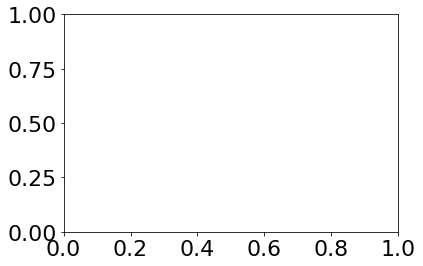

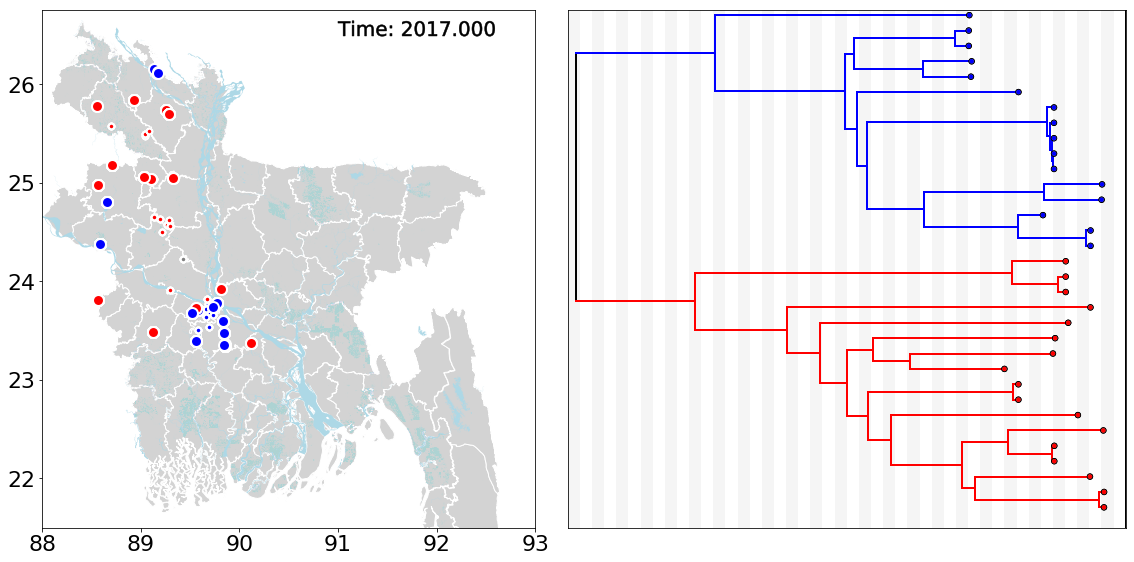

In [24]:
#OK, tree and map are animated, yeay!
#Let's add in uncertainty polygons and change the color of the clades.

#This code is from curonia.py from Gytis Dudas.
#module load Python/3.6.1
#jupyter notebook

#Point to baltic.
import imp
bt = imp.load_source('baltic','/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/bang_geo_only/baltic.py') ## point to where baltic repo was cloned

#import libraries
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon ## for polygons
from matplotlib.collections import PatchCollection ## for polygons too
from matplotlib.colors import LinearSegmentedColormap ## for colour maps
from matplotlib import gridspec ## for composite figures
import matplotlib.patheffects as path_effects ## for elegant text
from IPython.display import clear_output
from IPython.display import HTML

import datetime
import math
import time
import sys

import descarteslabs as dl
import geopandas as gpd

import unicodedata
# import unidecode ## for removing diacritics from example geoJSON

import numpy as np
from scipy.interpolate import UnivariateSpline ## used to smooth counts of lineages in each location at any given time
from scipy.interpolate import interp1d ## used to linearly interpolate between data points used in colouring polygons
from sklearn.decomposition import IncrementalPCA ## used to identify PCA1 when automatically producing a colour map

import bezier ## custom arbitrary order Bezier curves
import requests ## used to fetch examples from internet
import json ## used for importing JSONs
try:
    from StringIO import StringIO as sio
    from cStringIO import StringIO as csio
except ImportError:
    from io import StringIO as sio
    from io import BytesIO as csio
    
def removeDiacritics(string):
    """
    Removes diacritic marks from unicode.
    """
#    output=None
#    if isinstance(string, str):
#        output=string
#    elif isinstance(string, unicode):
#        output=string.encode('utf-8')
#        output=unidecode.unidecode(string)
#        nkfd_form = unicodedata.normalize('NFKD', unicode(string))
#        output= u"".join([c for c in nkfd_form if not unicodedata.combining(c)])
#        output = ''.join((c for c in unicodedata.normalize('NFD', string) if unicodedata.category(c) != 'Mn'))
#        output=unicodedata.normalize('NFKD', string).encode('ASCII', 'ignore')
#    return output
#    return unicodedata.normalize('NFKD', string).encode('ASCII', 'ignore')
    return unicodedata.normalize('NFKD', string)

def calendarTimeline(start_date, end_date, infmt='%Y-%m-%d',outfmt='%Y-%b',optfmt=None,month_step=12):
    """
    Given two calendar dates returns a list of calendar dates at monthly (by default) intervals.
    """
    current_date = datetime.datetime.strptime(start_date,infmt)
    ending_date = datetime.datetime.strptime(end_date,infmt)
    
    timeline=[]
    while current_date <= ending_date:
        if optfmt and current_date.month!=1:
            d=datetime.datetime.strftime(current_date,optfmt)
        else:
            d=datetime.datetime.strftime(current_date,outfmt)
        timeline.append(d)
        carry, new_month = divmod(current_date.month - 1 + month_step, 12)
        new_month += 1
        current_date = current_date.replace(year=current_date.year + carry,month=new_month)
    return timeline

def Bezier_control(pointA,pointB,height,frac):
    """ 
    Given a line defined by 2 points A & B, 
    find a third point at a given distance (height) that defines a line perpendicular to line AB which intercepts AB 
    at fraction (frac) along AB.
    Equation derived by Luiz Max Fagundes de Carvalho (University of Edinburgh).
    """
    x1,y1=pointA
    x2,y2=pointB

    sign=1
    if x1>x2:
        sign=-1

    slope = (y2-y1) / (x2-x1)
    d=np.sqrt((y2-y1)**2 + (x2-x1)**2) ## distance between points
    
    h=np.sqrt(height**2+(d*frac)**2) ## distance between desired height and point along line

    n1=x1+h*np.cos(np.arctan(height/float(d)/frac)+np.arctan(slope))*sign ## magic
    n2=y1+h*np.sin(np.arctan(height/float(d)/frac)+np.arctan(slope))*sign

    return (n1,n2) ## return third point's coordinate
#**********************************************end of Bezier control function*****************************************


def animate(frame):
    #### Primary plotting (map)
    ax1.lines=[line for line in ax1.lines if 'borders' in line.get_label()] ## reset lines (except borders) and texts in the plot
    #print(ax1.collections)
    ax1.collections=[patch for patch in ax1.collections if patch.get_label() in ('borders', 'leaf_node', 'internal_node')] ##reset patches (except map) 
    #ax1.collections=[]
    #print(ax1.collections)
    #ax1.points=[] ## reset points
    
    ax1.texts=[] ## remove all text from plot

    if len(animation_grid)-1==frame: ## if at last frame
        next_time=animation_grid[frame] ## current frame is next frame
    else:
        next_time=animation_grid[frame+1] ## next frame
        
    current_time=animation_grid[frame]
    
    
    effects=[path_effects.Stroke(linewidth=4, foreground='white'),
                 path_effects.Stroke(linewidth=0.5, foreground='k')] ## black text, white outline
    ax1.text(0.60,0.95,'Time: %.3f'%(current_time),size=20,transform=ax1.transAxes,zorder=1000,path_effects=effects) ## add text to indicate current time point
    

    #Find the branches in tree that we want to trace.
    exists=[k for k in bt_tree.Objects if k.parent!=bt_tree.root and k.parent.absoluteTime!=None and k.parent.absoluteTime<=current_time<=k.absoluteTime] ## identify lineages that exist at current timeslice

    #lineage_locations=[c.traits[locTrait] for c in exists if c.traits[locTrait]!='Not Available'] ## identify locations where lineages are present
    #presence=set(lineage_locations) ## all locations where lineages currently are in the tree
    
    #Changed above code to have presence trace all of the tree branches.
    presence=set(exists)
    
    update=10 ## update progress bar every X frames
    
    #### Secondary plotting (tree)
    Ls2=[x for x in ax2.lines if 'Colour' not in str(x.get_label())] ## fetch all lines in plot
    partials=[x for x in ax2.lines if 'partial' in str(x.get_label())] ## fetch all tree branches in progress
    finished_lines=[x for x in ax2.lines if 'finished' in str(x.get_label())] ## fetch all tree branches that are finished
    finished_points=[x for x in ax2.collections if 'finished' in str(x.get_label())] ## fetch all tip circles that are finished
    
    finished_labels=[str(x.get_label()) for x in finished_lines]+[str(x.get_label()) for x in finished_points] ## combine everything that's finished (branches + tip circles)
    partial_labels=[str(x.get_label()) for x in partials] ## partially plotted branches
    
    if frame>0 and frame%update==0: ## progress bar
        clear_output()
        timeElapsed=(time.time() - t0)/60.0
        progress=int((frame*(50/float(len(animation_grid)))))
        percentage=frame/float(len(animation_grid))*100
        rate=timeElapsed/float(frame)
        ETA=rate*(len(animation_grid)-frame)
        sys.stdout.write("[%-50s] %6.2f%%  frame: %5d %10s  time: %5.2f min  ETA: %5.2f min (%6.5f s/operation) %s %s %s" % ('='*progress,percentage,frame,animation_grid[frame],timeElapsed,ETA,rate,len(partials),len(finished_lines),len(finished_points)))
        sys.stdout.flush()

        
    #***********************Animate map!******************************************************************
    smooth=20 ## how many segments Bezier lines will have

    #tracking_length=365.0 ## number of days over which to plot the lineage
    depth=1
    departure_condition = lambda f:f-f ## determines how far away (in Bezier fraction) the tail of the migrating lineage is
    transition_point=1.0 ## determines the fixed time point along a branch at which migration happens
    locA=''
    #***********************Animate map!******************************************************************
    
    ####
    ## COMMENT this bit out if you don't want the tree to appear out of the time arrow
    ####
    
    for ap in bt_tree.Objects: ## iterate over branches
        idx='%s'%(ap.index) ## get unique id of branch
        xp=ap.parent.absoluteTime ## get parent's time

        x=ap.absoluteTime ## get branch's time
        y=ap.y ## get branch's y coordinate

        #location=ap.traits[locTrait] ## get branch's location
        
                     
        ## aggregate individual locations into higher-order groups (e.g. subdivisions into a country)

        group=aggregation[str(ap.index)] ## get location's group
        c=group_colours[group] ## get group colour map
        #c=cmap(normalised_coordinates[location]) ## get colour
        
        #Setting C to black for initial testing.
        #c='k'
        
        if xp!=None and xp<=current_time<x: ## branch is intersected by time arrow
            if 'partial_%s'%(idx) in partial_labels: ## if branch was partially drawn before
                l=[w for w in partials if 'partial_%s'%(idx)==str(w.get_label())][-1] ## get branch line
                l.set_data([xp,current_time],[y,y]) ## adjust its end coordinate to be time arrow
            else: ## branch is intersected, but not drawn before
                ax2.plot([xp,current_time],[y,y],lw=branchWidth,color=c,zorder=99,label='partial_%s'%(ap.index)) ## draw branch ending at time arrow, label as partially drawn
                
        if x<=current_time: ## time arrow passed branch - add it to finished class
            if 'partial_%s'%(idx) in partial_labels: ## if branch has been partially drawn before
                l=[w for w in partials if 'partial_%s'%(idx)==str(w.get_label())][-1] ## get branch
                l.set_data([xp,x],[y,y]) ## set end coordinate to be actual end coordinate
                l.set_label('finished_%s'%(idx)) ## set its label to finished
                
            if 'finished_%s'%(idx) not in finished_labels: ## branch has not been drawn before at all
                ax2.plot([xp,x],[y,y],lw=branchWidth,color=c,zorder=99,label='finished_%s'%(ap.index)) ## draw branch, add to finished class
                
            if 'partial_%s'%(idx) in partial_labels or 'finished_%s'%(idx) not in finished_labels: 
                if ap.branchType=='leaf': ## if leaf
                    ax2.scatter(x,y,s=tipSize,facecolor=c,edgecolor='none',zorder=102,label='finished_%s'%(ap.index)) ## add tip circle
                    ax2.scatter(x,y,s=tipSize*2,facecolor='k',edgecolor='none',zorder=101,label='finished_%s'%(ap.index)) ## add tip circle outline underneath
                elif ap.branchType=='node': ## if node
                    yl=ap.children[0].y ## get y coordinates of first and last child
                    yr=ap.children[-1].y
                    ax2.plot([x,x],[yl,yr],lw=branchWidth,color=c,zorder=99,label='finished_%s'%(ap.index)) ## plot vertical bar for node
    ####
    ## COMMENT this bit out if you don't want the tree to appear out of the time arrow
    ####
                
    #****************************end of animate tree***************************************************************  
    
    #****************************beginning of animate map***************************************************************
        #print(k.parent.absoluteTime)
        #print(k.absoluteTime)
        #print(time_point)
        locA=ap.parent.index ## get index of parent
        locB=ap.index ## get index of branch
        #print(popCentres[locA])
        #print(popCentres[locB])
        #print('Current time:')
        #print(current_time)
        #print("branch absolute time")
        #print(ap.absoluteTime)
        
        groupA=aggregation[str(ap.index)] ## get origin's high order group
        c=group_colours[groupA] ## fetch colour map of the group, colour of location is determined by index of location's coordinates along PCA1
    
        #Set c to black for initial testing.
        #c='k'
    
        A=popCentres[ap.index] ## fetch origin
        #print(ap.index)
        #print(A)
        lon,lat=A
        
        #Plot all points on the map with the code below:
        #if ap.branchType == 'leaf':
        #    ax1.scatter(lon,lat,s=30,facecolor=c,label='leaf_node', edgecolor='w',lw=2,zorder=99) ## plot migration centre
        #elif ap.branchType == 'node':
        #    ax1.scatter(lon,lat,s=30,facecolor='grey',label='internal_node', edgecolor='w',lw=2,zorder=98) ## plot migration centre
        
        #Plot root point:
        if ap.index == 0:
            ax1.scatter(lon,lat,s=30,facecolor='grey',label='internal_node', edgecolor='w',lw=2,zorder=98) ## plot migration centre
       
    
        if locA!='' and locA!=locB and ap.parent.absoluteTime!=None and ap.parent.absoluteTime<current_time<=ap.absoluteTime: ## if parent location is present, locations don't match, and branch is intersected
            #print('Current time:')
            #print(current_time)
            #print("branch absolute time")
            #print(ap.absoluteTime)
            
            transition=ap.parent.absoluteTime+ap.length*transition_point ## migration time
            tracking_length=ap.length
            #print(current_time)
            #print(ap.absoluteTime)
            #print('In if loop')
            #print((transition-time_point)/float(depth))
            begin_bezier=((current_time-ap.parent.absoluteTime)/(ap.absoluteTime-ap.parent.absoluteTime)) 
            #begin_bezier=(current_time/transition) ## migrating lineage's head
            end_bezier=departure_condition(begin_bezier) ## migrating lineage's tail
            #print(begin_bezier)
            #print(end_bezier)
        
            #begin_bezier,end_bezier = np.clip([begin_bezier,end_bezier],0.0,1.0) ## restrict to interval [0,1]
        
            #print(begin_bezier)
            #print(end_bezier)

        
            if end_bezier<=1.0 and begin_bezier>=0.0 and begin_bezier<=1.0: ## if lineage should still be visible (head departed and tail hasn't arrived)
                points=np.linspace(end_bezier,begin_bezier,smooth) ## get a bunch of points between the start and end of migrating lineage
                #print(points)
                #print(popCentres[locA])
                #print(popCentres[locB])
            
                #If an an internal node, plot uncertanty estimates for internal nodes.
                if ap.branchType == 'node' or ap.index == 0:
                    ax1.add_collection(PatchCollection(uncertainty_polygons[ap.index],facecolor=c,alpha=0.1,label='uncertainty',edgecolor='w',zorder=80)) ## plot location polygons

                
                #Plot points and have them appear and disappear by time.
                #Hard to view the data this way, though...
                if ap.branchType == 'leaf':
                    ax1.scatter(lon,lat,s=120,facecolor=c,label='leaf_node', edgecolor='w',lw=2,zorder=100) ## plot migration centre
                elif ap.branchType == 'node':
                    ax1.scatter(lon,lat,s=30,facecolor=c,label='internal_node', edgecolor='w',lw=2,zorder=100) ## plot migration centre
            
                bezier_line=migration_function[locA][locB](points) ## get coordinates of the migrating lineage
                #print(bezier_line)
                xs,ys=bezier_line
                for q in range(len(xs)-1): ## iterate through Bezier line segments with fading alpha and reducing width
                    x1,y1=xs[q],ys[q] ## get coordinates for current segment's start
                    x2,y2=xs[q+1],ys[q+1] ## get coordinates for current segment's end
                    segL=(q+1)/float(len(xs)) ## fraction along length of Bezier line
                
                    #Commenting the color stuff out, just plot one color.
                    #if aggregation[locA]!=aggregation[locB]: ## locations in different high-order groups
                    fc=group_colours[aggregation[str(ap.index)]] ## colour by origin colour
                    #else: ## locations in same high-order group
                    #    fc='k' ## colour black
                    #fc='r'
                
                    ax1.plot([x1,x2],[y1,y2],lw=7*segL,alpha=1,color=fc,zorder=101,solid_capstyle='round') ## plot actual lineage
                    ax1.plot([x1,x2],[y1,y2],lw=10*segL,alpha=1,color='w',zorder=100,solid_capstyle='round') ## plot underlying white background to help lineages stand out
    #***********************END of Animate map!******************************************************************
    
    for l in Ls2: ## iterate over lines in tree
        if 'time' in l.get_label(): ## if line is time arrow
            l.set_data([current_time,current_time],[0,1]) ## adjust time arrow
    
    #rivers_shape_file.plot(ax=ax1, facecolor='lightblue')

#*************************************end of animate definition*******************************************************


                    
#*************************************************************beginning of program main******************************

typeface='Helvetica Neue' ## set default matplotlib font and font size
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22

figWidth=10 ## map figure width
dpi=90 ## dots per inch for each .png (90 used in the final version)
every=12 ## put months labels every number of months

#Test code to import my Cauchy MCC tree:
tree_path='/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/bang_geo_only/Nipah_Cauchy_new_HKYG_UCLN_skygrid_1234_log.time.MCC.trees'

bt_tree=bt.loadNexus(tree_path)

popCentres={} ## dictionary with point coordinates
internal_polygons={} ## dictionary with coordinates of internal node uncertainty polygons
location_points_internal={}
uncertainty_polygons={}

#Pull in latitude and longitude values from continuous diffusion analysis.
#IE - just parse tree and make a dictionary with node index as key and latitude and longitude values.
longTrait='location1'
latTrait='location2'

longPolygon='location1_80%HPD_1'
latPolygon='location2_80%HPD_1'

#Initialize dictionaries with keys of tree indexes, but no values.
for r in bt_tree.Objects: ## iterate over branches
    uncertainty_polygons[r.index]=[]
    location_points_internal[r.index]=[]

#print('uncertainty polygons')
#print(uncertainty_polygons)
#print('locaiton points internal')
#print(location_points_internal)

for k in bt_tree.Objects: ## iterate over branches
    popCentres[k.index]=(float(k.traits[longTrait]),float(k.traits[latTrait] )) ## assign longitude and latitude to location
    
    #Grab internal polygons and uncertanty estimates for internal nodes.
    #Make internal_ploygon with Polygon from internal HPD_80%_estimates.
    if k.branchType == 'node' and k.index != 'Root':
        internal_polygons[k.index]=([float(i) for i in k.traits[longPolygon]],[float(l) for l in k.traits[latPolygon]])
        #print(internal_polygons[k.index][0])
        #print(internal_polygons[k.index][1])
        location_points_internal[k.index]=(np.vstack(zip(internal_polygons[k.index][0],internal_polygons[k.index][1])))
        uncertainty_polygons[k.index].append(Polygon(location_points_internal[k.index], True))
    
    
#Find the right coordinates for the map and tree.
#Width and height ratios are the lat and lon values from the map.
map_width=(93.0-88.0)
map_height=(26.75-21.5)
ratio=map_width/float(map_height) ## aspect ratio of map

plt.clf() 
plt.cla()
plt.figure(figsize=(figWidth*2,figWidth*ratio),facecolor='w') ## start figure
gs = gridspec.GridSpec(ncols=2, nrows=1,wspace=0.0,hspace=0.0) ## define subplots
ax1 = plt.subplot(gs[0]) ## map here
ax2 = plt.subplot(gs[1]) ## Tree

#frame='<iframe style="border: 0; width: 400px; height: 472px;" src="https://bandcamp.com/EmbeddedPlayer/album=29809561/size=large/bgcol=333333/linkcol=e99708/artwork=small/transparent=true/" seamless><a href="http://romowerikoito.bandcamp.com/album/nawam-r">NAWAMAR by Romowe Rikoito</a></iframe>'

print('Done!')
#HTML(frame)


#import geoJSON:
json_map=json.load(open('/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/location_variable_testing_2/GEOJSON/bgd_admin2.geojson','r')) ## read from (hopefully saved) local copy

print('Done!')

#Pull in shapefile to include rivers and water on map.
shape_file=gpd.read_file('/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/location_variable_testing_2/GEOJSON/bangladesh-latest-free/gis_osm_water_a_free_1.shp')

#Rename rows by fclass column values:
shape_file=shape_file.set_index('fclass')
rivers_shape_file=shape_file.loc[['river', 'water']]
#shape_file.info()

aggregation={'0':'group 0',
             '1':'group 2',
             '2':'group 2',
             '3':'group 2', 
             '4':'group 2',
             '773':'group 2',
             '3906':'group 2',
             '6319':'group 2',
             '6320':'group 2',
             '6321':'group 2',
             '7082':'group 2', 
             '7083':'group 2', 
             '7084':'group 2',
             '7085':'group 2',
             '7850':'group 2', 
             '7851':'group 2', 
             '7852':'group 2', 
             '8621':'group 2', 
             '8622':'group 2', 
             '12769':'group 2', 
             '19547':'group 2',
             '19548':'group 2',
             '19549':'group 2',
             '23140':'group 2', 
             '28708':'group 2', 
             '36218':'group 2', 
             '36219':'group 2', 
             '36987':'group 2', 
             '42968':'group 2', 
             '42969':'group 2',
             '42970':'group 2',
             '43733':'group 2',
             '50299':'group 2',
             '60809':'group 2',
             '67347':'group 1',
             '67348':'group 1',
             '68116':'group 1',
             '68117':'group 1',
             '68118':'group 1',
             '68119':'group 1',
             '68891':'group 1',
             '71353':'group 1',
             '71354':'group 1',
             '72122':'group 1',
             '72122':'group 1',
             '77072':'group 1',
             '77073':'group 1',
             '77834':'group 1',
             '77835':'group 1',
             '77836':'group 1',
             '77837':'group 1',
             '78593':'group 1',
             '78594':'group 1',
             '82243':'group 1',
             '89994':'group 1',
             '89995':'group 1',
             '90767':'group 1',
             '95074':'group 1',
             '95075':'group 1',
             '98927':'group 1',
             '98928':'group 1',
             '102855':'group 1',
             '102856':'group 1',
             '106741':'group 1',
             '106742':'group 1',
             '110295':'group 1'}

group_colours={'group 0': 'k',
              'group 1': 'b',
              'group 2': 'r'}

#Convert geoJSON into matplotlib ploygons:
features=json_map['features']
location_points={} ## location points will be stored here
polygons={} ## polygons will be stored here

locName='ADM2_EN' ## key name for each feature

for loc in features: ## iterate through features (locations)
    poly = np.asarray(loc['geometry']['coordinates']) ## get coordinates
    location=removeDiacritics(loc['properties'][locName]) ## standardised location name (remove diacritics)
#     print(location.encode().decode('utf-8'))
    if location not in ['Isla Sala y Gomez'] and 'Gal' not in location: ## ignore Isla Sala y Gomez
        polygons[location]=[]
        location_points[location]=[]
        if loc['geometry']['type']=='MultiPolygon': ## multiple parts detected
            for part in np.asarray(poly): ## iterate over each component polygon
                for coords in np.asarray(part): ## iterate over coordinates
                    coords=np.array(coords)
                    xs=coords[:,0] ## longitudes
                    ys=coords[:,1] ## latitudes

                    location_points[location].append(np.vstack(zip(xs,ys))) ## append coordinates to location's list of coordinates
        if loc['geometry']['type']=='Polygon': ## location is single part
            for coords in np.asarray(poly): ## iterate over coordinates
                coords=np.array(coords)
                xs=coords[:,0] ## longitudes
                ys=coords[:,1] ## latitudes

                location_points[location].append(np.vstack(zip(xs,ys))) ## append coordinates to location's list of coordinates

        complete_location=[]
        for part in location_points[location]: ## iterate over each component of a location
            complete_location.append(Polygon(part,True)) ## create a polygon for each component of a location

        polygons[location]=complete_location ## assign list of polygons to a location
#     elif location=='Isla Sala y Gomez': ## if location is Isla Sala y Gomez - print a geoJSON entry example
#         print('example geoJSON entry:\n%s\n\nnote that only the coordinate field is called\n'%(loc))
        
#print('polygons loaded:\n%s'%(polygons.keys()))
#********************************end of pulling in map**************************************************

#***************************************#Make Matrix of location distances*******************************************
control=lambda d:1/((np.sqrt(np.abs(np.log(d))))*2) ## function that will convert the distance between migration points into a distance 
                                #to be used for finding the control point for a Bezier function

all_distances=[] ## keep track of all distances
migration_function={i:{j:None for j in popCentres.keys() if i!=j} for i in popCentres.keys()} ## matrix of pairs of locations that will contain the Bezier function

for i in popCentres.keys(): ## iterate over locations
    A=popCentres[i] ## fetch origin
    lon,lat=A
    groupA=aggregation[str(i)] ## get origin's high order group
    c=group_colours[groupA] ## fetch colour map of the group, colour of location is determined by index of location's coordinates along PCA1
    
    #Set c to black for initial testing.
    #c='k'
    
    for j in popCentres.keys(): ## iterate over locations again
        if i!=j: ## if not self
            B=popCentres[j] ## fetch destination
            
            #Code below is historic from Gytis Dudas.  Not an appropriate way to calculate geographic distance.
            #Recommend using geopy to calculate geodesic distance instead!
            #Leaving code as is, because it is not used for plotting virus spread in map.
            d=np.sqrt((B[1]-A[1])**2 + (B[0]-A[0])**2) ## calculate distance between location A and location B
            
            all_distances.append(d) ## remember actual distince
            
            bez_points=[A] ## Bezier curve will start at point A
            #bez_points.append(Bezier_control(A,B,1/d ,0.1))
            #bez_points.append(Bezier_control(A,B,0.01     ,0.2))
            #bez_points.append(Bezier_control(A,B,-0.02    ,0.3))
            #bez_points.append(Bezier_control(A,B,-d**0.5,0.4))
            #bez_points.append(Bezier_control(A,B,control(d),0.01)) ## head towards the first control point, which is perpendicular to line AB at distance control(d), and 0.01 of the way along line AB
            bez_points.append(Bezier_control(A,B,0.01,0.01)) ## head towards the first control point, which is perpendicular to line AB at distance control(d), and 0.01 of the way along line AB
            bez_points.append(Bezier_control(A,B,0.0,0.1)) ## head towards second control point, directly on the line AB, 0.1 of the way along line AB
            bez_points.append(B) ## Bezier curve will finish at point B
            bez_points=np.array(bez_points).transpose()
            curve = bezier.Curve(np.asfortranarray(bez_points),degree=len(bez_points)) ## Bezier curve object
            migration_function[i][j]=curve.evaluate_multi ## only interested in calling the evaluate_multi function of the curve, which will return a list of coordinates, given a numpy array of fractions along the line
#***************************************Make Matrix of location distances*******************************************

# locTrait='location' ## name of locations in the tree
locTrait='location2_median'

t0 = time.time() ## time how long animation takes


start='1971-01-01' ## start date of animation
end='2017-01-01' ## end date of animation

animation_grid=list(np.linspace(bt.decimalDate(start),bt.decimalDate('1984-01-01'),20)) ## few frames from 2011 to 2015
animation_grid+=list(np.linspace(bt.decimalDate('1984-01-02'),bt.decimalDate(end),140)) ## many frames from 2015 to 2016
#animation_grid+=list(np.linspace(bt.decimalDate('2018-06-01'),bt.decimalDate(end),20)) ## medium frames from 2016 to 2018

tipSize=20 ## size of tip circles in tree
branchWidth=2 ## line width of tree branches

animation_duration=120.0 ## seconds

print('Start of animation: %.2f\nEnd: %.2f'%(min(animation_grid),max(animation_grid)))

print(len([x for x in bt_tree.Objects if locTrait not in x.traits]))

print('Number of frames to animate: %d'%(len(animation_grid)))
            
global travelers ## the animation will need to have information to traveling lineages
travelers=[x for x in bt_tree.Objects if x!=bt_tree.root] ## find lineages that have travelled - they're what's going to be animated
print('\nNumber of travelling lineages: %d (%.3f%% of all lineages)'%(len(travelers),len(travelers)/float(len(bt_tree.Objects))*100))


#ax2 = plt.axes()## ax2 is tree


xtimeline=calendarTimeline(start,end,'%Y-%m-%d','%Y-%m-%d') ## create timeline from start to end of animation delimited with months
xpos=[bt.decimalDate(b) for b in xtimeline] ## convert calendar dates to decimal time
xlabels=[(bt.convertDate(b,'%Y-%m-%d','%b\n%Y') if '-01-' in b else bt.convertDate(b,'%Y-%m-%d','%b')) if (int(b.split('-')[1])+every-1)%every==0 else '' for b in xtimeline] ## month or year-month (if January) tick labels every given number of months


################
## Tertiary plot begins - TREE
################

####
## UNCOMMENT if you'd like the tree to be plotted in grey initially and get coloured over time
####
# iterate over objects in tree
for k in bt_tree.Objects:
    #loc=k.traits[locTrait] ## get branch location
    group=aggregation[str(k.index)]
    c=group_colours[group] ## get colour map
    #c=cmap(normalised_coordinates[loc]) ## fixed colour for location
    
    #set c = black for now.
    c='k'
    
    mask_cmap=mpl.cm.Greys ## colour map that goes on top of lines
    #grey_colour=mask_cmap((sorted_group.index(group)+1)/float(len(sorted_group)+2)) ## get colour based on index of location in list, avoiding white colour
    grey_colour="grey"
    
    y=k.y
    yp=k.parent.y
    
    x=k.absoluteTime
    xp=k.parent.absoluteTime
    
    if k.branchType=='leaf':
        ax2.scatter(x,y,s=tipSize,facecolor=grey_colour,edgecolor='none',zorder=102,label='LeafBW_%s'%(k.index)) ## plot black and white tip circle on top
        ax2.scatter(x,y,s=tipSize,facecolor=c,edgecolor='none',zorder=101,label='LeafColour_%s'%(k.index)) ## plot colour tip circle underneath black and white tip circle
        ax2.scatter(x,y,s=tipSize*2,facecolor='k',edgecolor='none',zorder=100,label='Colour') ## black outline underneath every tip
        
    elif k.branchType=='node':
        yl=k.children[0].y
        yr=k.children[-1].y
       
        if xp==0.0:
            xp=x

        ax2.plot([x,x],[yl,yr],color=grey_colour,lw=branchWidth,zorder=99,label='NodeHbarBW_%s'%(k.index))
        ax2.plot([x,x],[yl,yr],color=c,lw=branchWidth,zorder=98,label='NodeHbarColour_%s'%(k.index))
        
    ax2.plot([xp,x],[y,y],color=grey_colour,lw=branchWidth,zorder=99,label='BranchBW_%s'%(k.index)) ## plot black and white branch on top
    ax2.plot([xp,x],[y,y],color=c,lw=branchWidth,zorder=98,label='BranchColour_%s'%(k.index)) ## plot colour branch underneath black and white branch (note the zorder attribute)
    
####
## UNCOMMENT if you'd like the tree to be plotted in grey initially and get coloured over time
####

#plot all of the points right away.
#for k in bt_tree.Objects:
#    A=popCentres[k.index] ## fetch origin
#    lon,lat=A
    #ax1.scatter(lon,lat,s=30,facecolor=c,edgecolor='w',lw=2,zorder=100) ## plot migration centre

    
for loc in polygons.keys():
    ax1.add_collection(PatchCollection(polygons[loc],facecolor='lightgrey',label='borders', edgecolor='w',zorder=1)) ## plot location polygons
    
#ax1.plot()## ax1 is map
ax1.set_aspect(1) ## equal aspect ratio
ax1.set_xlim(88.0, 93)
ax1.set_ylim(21.5, 26.75)

#******************************************************************************
#Add rivers_shape_file plotting here:
rivers_shape_file.plot(ax=ax1, facecolor='lightblue', label='borders')

ax2.axvline(xpos[0],color='k',lw=3,label='time',zorder=200) ## add time arrow to indicate current time

ax2.set_xticks([x+1/24.0 for x in xpos]) ## add ticks, tick labels and month markers
ax2.set_xticklabels(xlabels) ## set x axis labels
[ax2.axvspan(xpos[x],xpos[x]+1,facecolor='k',edgecolor='none',alpha=0.04) for x in range(0,len(xpos),2)] ## set grey vertical bars for x axis

ax2.xaxis.tick_bottom() ## make tree plot pretty
ax2.yaxis.tick_left()
[ax2.spines[loc] for loc in ax2.spines]

ax2.tick_params(axis='x',size=0) ## no ticks
ax2.tick_params(axis='y',size=0)
ax2.set_xticklabels([]) ## no tick labels
ax2.set_yticklabels([])

ax2.set_xlim(min(xpos),max(xpos)) ## axis limits
ax2.set_ylim(-bt_tree.ySpan*0.01,bt_tree.ySpan*1.01)
################
## Tertiary plot ends - TREE
################
            
for frame in range(len(animation_grid)): ## iterate through each frame
    animate(frame) ## animate will modify the map, tree and cases
    plt.savefig('/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/bang_geo_only/animate_tree_V2/ani_frame_%05d.png'%(frame), format='png',bbox_inches='tight',dpi=dpi) ## save individual frames for stitching up using 3rd party software (e.g. FFMpeg)
    
print('\n\nDONE!')

print('\nTime taken: %.2f minutes'%((time.time() - t0)/60.0))

print('Suggested frame rate for an animation lasting %s seconds using %s frames: %s'%(animation_duration,len(animation_grid),int(len(animation_grid)/animation_duration))) ## frame rate
plt.show()

In [28]:
patch=[]
#print([patch.get_label() for patch in ax1.collections if patch.get_label() in ('borders', 'leaf_node', 'internal_node')])

print([patch.get_label() for patch in ax1.collections])

#ax1.collections=[patch for patch in ax1.collections if 'borders' or 'leaf_node' or 'internal_node' in patch.get_label()] ## reset patches (except map) 
   

['borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'borders', 'internal_node', 'internal_node', 'uncertainty', 'internal_node', 'uncertainty', 'internal_node', 'internal_node', 'uncertainty', 'internal_node', 'uncertainty', 'internal_node', 'internal_node', 'uncertainty', 'internal_node', 'uncertainty', 'internal_node', 'internal_node', 'uncert

In [1]:
%%bash

frames=/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/bang_geo_only/animate_tree_V2/
ffmpeg_path=/scicomp/home/evk3/setup/ffmpeg-4.1

cd  $frames; $ffmpeg_path/ffmpeg -framerate 2 -start_number 0 -i ani_frame_%05d.png -pix_fmt yuv420p -b:a 64k -vf scale="2160:trunc(ow/a/2)*2" nipah_25Apr2019_animation.HD.264.mp4


ffmpeg version 4.1 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 4.8.5 (GCC) 20150623 (Red Hat 4.8.5-36)
  configuration: 
  libavutil      56. 22.100 / 56. 22.100
  libavcodec     58. 35.100 / 58. 35.100
  libavformat    58. 20.100 / 58. 20.100
  libavdevice    58.  5.100 / 58.  5.100
  libavfilter     7. 40.101 /  7. 40.101
  libswscale      5.  3.100 /  5.  3.100
  libswresample   3.  3.100 /  3.  3.100
Input #0, image2, from 'ani_frame_%05d.png':
  Duration: 00:01:20.00, start: 0.000000, bitrate: N/A
    Stream #0:0: Video: png, rgba(pc), 1418x705 [SAR 3543:3543 DAR 1418:705], 2 fps, 2 tbr, 2 tbn, 2 tbc
Codec AVOption b (set bitrate (in bits/s)) specified for output file #0 (nipah_25Apr2019_animation.HD.264.mp4) has not been used for any stream. The most likely reason is either wrong type (e.g. a video option with no video streams) or that it is a private option of some encoder which was not actually used for any stream.
Stream mapping:
  Stream #0:0 -> #0:0 (png (

In [41]:
#How to assign color to the lines and points by clade 1or clade 2?
#Objective: Pull index and child set with sequence names out of the tree.

#Point to baltic.
import imp
bt = imp.load_source('baltic','/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/bang_geo_only/baltic.py') ## point to where baltic repo was cloned

#Test code to import my Cauchy MCC tree:
tree_path='/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/bang_geo_only/Nipah_Cauchy_new_HKYG_UCLN_skygrid_1234_log.time.MCC.trees'

bt_tree=bt.loadNexus(tree_path)

#Import geojson
#df=gpd.read_file('/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/location_variable_testing_2/GEOJSON/SEAsia_forBEAST_V2.geojson')


popCentres={} ## dictionary with point coordinates
internal_polygons={} ##dictionary with internal node polygon estimates

longTrait='location2'
latTrait='location1'

longPolygon='location1_80%HPD_1'
latPolygon='location2_80%HPD_1'


for k in bt_tree.Objects: ## iterate over branches
    print('*********************************************')
    print(k.index)
    
    if k.branchType == 'leaf':
        print(k.name)
        print(k.numName)
    
    if k.branchType == 'node':
        print(k.leaves)        
    
print('Done!')

*********************************************
0
{'16', '29', '12', '2', '18', '30', '25', '20', '24', '22', '14', '33', '15', '4', '3', '6', '27', '31', '26', '7', '17', '11', '5', '19', '9', '32', '1', '10', '21', '8', '23', '13', '28'}
*********************************************
1
{'16', '12', '2', '25', '20', '22', '14', '33', '15', '3', '26', '17', '19', '9', '32', '10', '13'}
*********************************************
2
{'13', '14', '15'}
*********************************************
3
{'13', '14'}
*********************************************
4
XXXXXXXX|201206312|Nipah_virus|Human_TS|Bogura_Bangladesh|2012-01-20
13
*********************************************
773
XXXXXXXX|201206313|Nipah_virus|Human_TS|Bogura_Bangladesh|2012-01-20
14
*********************************************
3906
XXXXXXXX|201206316|Nipah_virus|Human_TS|Rajshahi_Bangladesh|2012-01-21
15
*********************************************
6319
{'16', '3', '12', '26', '17', '2', '19', '25', '9', '20', '32', '10'

In [48]:
#Testing out a bit of code...

aggregation={'0':'group 0',
             '1':'group 2',
             '2':'group 2',
             '3':'group 2', 
             '4':'group 2',
             '773':'group 2',
             '3906':'group 2',
             '6319':'group 2',
             '6320':'group 2',
             '6321':'group 2',
             '7082':'group 2', 
             '7083':'group 2', 
             '7084':'group 2',
             '7085':'group 2',
             '7850':'group 2', 
             '7851':'group 2', 
             '7852':'group 2', 
             '8621':'group 2', 
             '8622':'group 2', 
             '12769':'group 2', 
             '19547':'group 2',
             '19548':'group 2',
             '19549':'group 2',
             '23140':'group 2', 
             '28708':'group 2', 
             '36218':'group 2', 
             '36219':'group 2', 
             '36987':'group 2', 
             '42968':'group 2', 
             '42969':'group 2',
             '42970':'group 2',
             '43733':'group 2',
             '50299':'group 2',
             '60809':'group 2',
             '67347':'group 1',
             '67348':'group 1',
             '68116':'group 1',
             '68117':'group 1',
             '68118':'group 1',
             '68119':'group 1',
             '68891':'group 1',
             '71353':'group 1',
             '71354':'group 1',
             '72122':'group 1',
             '72122':'group 1',
             '77072':'group 1',
             '77073':'group 1',
             '77834':'group 1',
             '77835':'group 1',
             '77836':'group 1',
             '77837':'group 1',
             '78593':'group 1',
             '78594':'group 1',
             '82243':'group 1',
             '89994':'group 1',
             '89995':'group 1',
             '90767':'group 1',
             '95074':'group 1',
             '95075':'group 1',
             '98927':'group 1',
             '98928':'group 1',
             '102855':'group 1',
             '102856':'group 1',
             '106741':'group 1',
             '106742':'group 1',
             '110295':'group 1'}

group_colours={'group 0': 'k',
              'group 1': 'b',
              'group 2': 'g'}
i='0'
print(i)
groupA=aggregation[i] ## get origin's high order group
print(groupA)
c=group_colours[groupA] ## fetch
print(c)

0
group 0
k


group 1:
[5.7022574e+04 8.6047998e+03 9.5676572e+03 1.0358907e+03 5.6319111e+03
 1.4103672e+05 1.2070107e+04 4.3562837e+03 7.4589253e+03 8.6151113e+03
 3.3242581e+03 1.3402861e+04 3.1074041e+03 1.0824516e+04 1.6080215e+04
 3.4598064e+03 1.0210307e+04 5.4675079e+02 1.0747684e+03 1.2610462e+04
 1.7149103e+05 1.2672434e+04 2.8173691e+05 2.0435927e+03 8.8407068e+02
 1.6935050e+03 1.8589799e+02 3.7442817e+03 1.4215811e+03 6.1879755e+02
 9.3549445e+02]
group 2:
[5.08308281e+04 4.64637266e+04 4.71070508e+03 2.95318848e+03
 1.93924961e+04 5.33428418e+03 6.02595068e+03 1.83802148e+04
 1.12581312e+05 1.07825205e+04 5.19560156e+03 9.80678984e+04
 4.12835547e+04 1.57025488e+03 5.68241895e+03 2.83533477e+04
 2.60077547e+05 2.89104248e+02 2.60003723e+02 3.59046328e+04
 2.64741914e+04 8.41391602e+01 3.17623749e+02 6.78447500e+04
 9.62322344e+04 1.51291826e+04 1.80887148e+04 2.72521899e+03
 7.20466875e+04 7.52774062e+04 8.49120312e+04 1.30871766e+05
 7.35318203e+04]


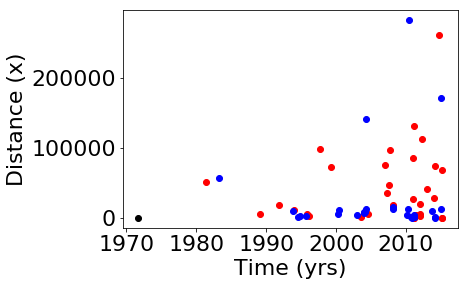

In [15]:
#The objective of this code is to plot distance traveled vs. time for clade 1 vs clade 2.

from geopy.distance import geodesic

aggregation={'0':'group 0',
             '1':'group 2',
             '2':'group 2',
             '3':'group 2', 
             '4':'group 2',
             '773':'group 2',
             '3906':'group 2',
             '6319':'group 2',
             '6320':'group 2',
             '6321':'group 2',
             '7082':'group 2', 
             '7083':'group 2', 
             '7084':'group 2',
             '7085':'group 2',
             '7850':'group 2', 
             '7851':'group 2', 
             '7852':'group 2', 
             '8621':'group 2', 
             '8622':'group 2', 
             '12769':'group 2', 
             '19547':'group 2',
             '19548':'group 2',
             '19549':'group 2',
             '23140':'group 2', 
             '28708':'group 2', 
             '36218':'group 2', 
             '36219':'group 2', 
             '36987':'group 2', 
             '42968':'group 2', 
             '42969':'group 2',
             '42970':'group 2',
             '43733':'group 2',
             '50299':'group 2',
             '60809':'group 2',
             '67347':'group 1',
             '67348':'group 1',
             '68116':'group 1',
             '68117':'group 1',
             '68118':'group 1',
             '68119':'group 1',
             '68891':'group 1',
             '71353':'group 1',
             '71354':'group 1',
             '72122':'group 1',
             '72122':'group 1',
             '77072':'group 1',
             '77073':'group 1',
             '77834':'group 1',
             '77835':'group 1',
             '77836':'group 1',
             '77837':'group 1',
             '78593':'group 1',
             '78594':'group 1',
             '82243':'group 1',
             '89994':'group 1',
             '89995':'group 1',
             '90767':'group 1',
             '95074':'group 1',
             '95075':'group 1',
             '98927':'group 1',
             '98928':'group 1',
             '102855':'group 1',
             '102856':'group 1',
             '106741':'group 1',
             '106742':'group 1',
             '110295':'group 1'}

group_colours={'group 0': 'k',
              'group 1': 'b',
              'group 2': 'r'}

#Initialize an empty nupy structured array:
A=np.zeros(65, [('time', np.float32), ('distance', np.float32), ('group', 'U10')])
i=0
for ap in bt_tree.Objects: ## iterate over branches

        x=ap.absoluteTime ## get branch's time
        
        longTrait='location2'
        latTrait='location1'
        #float(k.traits[longTrait]),float(k.traits[latTrait] )
        #d=np.sqrt(B[1]-A[1])**2 + (B[0]-A[0])**2) ## calculate distance between location A and location B
        
        #Calculate distance between parent and current node.
        #If at root, assign distance to zero.
        if ap.index == 0:
            d=0
        else:
            parent=(float(ap.parent.traits[longTrait]), float(ap.parent.traits[latTrait])) ## calculate distance between location A and location B
            child=(float(ap.traits[longTrait]), float(ap.traits[latTrait])) ## calculate distance between location A and location B
            #print(parent)
            #print(child)
            d=geodesic(parent, child).meters
        #Make a numpy array and fill it with data you want to plot:
        A[i]=(x, d, aggregation[str(ap.index)])
        i+=1
        
#print(A)

        #group=aggregation[str(ap.index)] ## get location's group
        
for i in range(A.shape[0]):
    #print(A[i]['time'])
    #print(A[i]['distance'])
    c=group_colours[A[i]['group']]
    plt.plot(A[i]['time'], A[i]['distance'], marker='o', color=c)
    

print("group 1:")
print(A[A['group'] == 'group 1']['distance'])
print("group 2:")
print(A[A['group'] == 'group 2']['distance'])
    
plt.xlabel('Time (yrs)')
plt.ylabel('Distance (x)')
plt.show()


(24.223879227830643, 89.4259251703078)
(24.631480947875044, 89.19562873393843)
(24.631480947875044, 89.19562873393843)
(25.03861145089651, 89.08500408255294)
(25.03861145089651, 89.08500408255294)
(25.039442647588924, 89.13167362651745)
(25.039442647588924, 89.13167362651745)
(25.037337000009742, 89.1025020000431)
(25.039442647588924, 89.13167362651745)
(25.04602799998522, 89.32370400006072)
(25.03861145089651, 89.08500408255294)
(25.056820999980708, 89.03606799993568)
(24.631480947875044, 89.19562873393843)
(24.647344651707872, 89.13869565029017)
(24.647344651707872, 89.13869565029017)
(24.494831311228584, 89.21018764618397)
(24.494831311228584, 89.21018764618397)
(23.481446000014593, 89.12417900002765)
(24.494831311228584, 89.21018764618397)
(24.57548154824356, 89.26977827438527)
(24.57548154824356, 89.26977827438527)
(24.619565103759356, 89.28730444700051)
(24.619565103759356, 89.28730444700051)
(25.476710279759928, 89.0441608394224)
(25.476710279759928, 89.0441608394224)
(25.835889

ValueError: Invalid RGBA argument: ['black', 'blue', 'red']

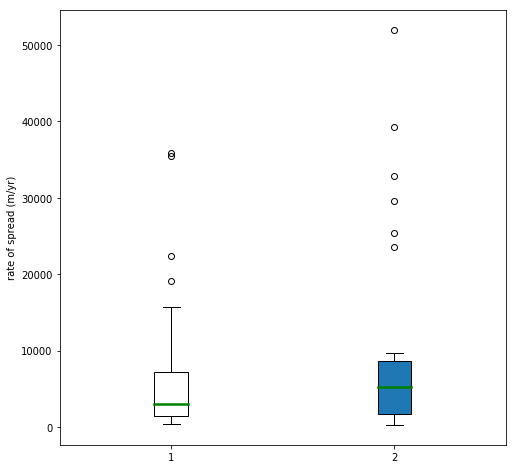

In [16]:
#The objective of this code is to plot distance traveled vs. time for clade 1 vs clade 2.

from geopy.distance import geodesic

aggregation={'0':'group 0',
             '1':'group 2',
             '2':'group 2',
             '3':'group 2', 
             '4':'group 2',
             '773':'group 2',
             '3906':'group 2',
             '6319':'group 2',
             '6320':'group 2',
             '6321':'group 2',
             '7082':'group 2', 
             '7083':'group 2', 
             '7084':'group 2',
             '7085':'group 2',
             '7850':'group 2', 
             '7851':'group 2', 
             '7852':'group 2', 
             '8621':'group 2', 
             '8622':'group 2', 
             '12769':'group 2', 
             '19547':'group 2',
             '19548':'group 2',
             '19549':'group 2',
             '23140':'group 2', 
             '28708':'group 2', 
             '36218':'group 2', 
             '36219':'group 2', 
             '36987':'group 2', 
             '42968':'group 2', 
             '42969':'group 2',
             '42970':'group 2',
             '43733':'group 2',
             '50299':'group 2',
             '60809':'group 2',
             '67347':'group 1',
             '67348':'group 1',
             '68116':'group 1',
             '68117':'group 1',
             '68118':'group 1',
             '68119':'group 1',
             '68891':'group 1',
             '71353':'group 1',
             '71354':'group 1',
             '72122':'group 1',
             '72122':'group 1',
             '77072':'group 1',
             '77073':'group 1',
             '77834':'group 1',
             '77835':'group 1',
             '77836':'group 1',
             '77837':'group 1',
             '78593':'group 1',
             '78594':'group 1',
             '82243':'group 1',
             '89994':'group 1',
             '89995':'group 1',
             '90767':'group 1',
             '95074':'group 1',
             '95075':'group 1',
             '98927':'group 1',
             '98928':'group 1',
             '102855':'group 1',
             '102856':'group 1',
             '106741':'group 1',
             '106742':'group 1',
             '110295':'group 1'}

group_colours={'group 0': 'k',
              'group 1': 'b',
              'group 2': 'r'}

color_group=['black', 'blue', 'red']

#Initialize empty lists:
group_1=[]
group_2=[]
i=0

for ap in bt_tree.Objects: ## iterate over branches
        
        longTrait='location2'
        latTrait='location1'
        #float(k.traits[longTrait]),float(k.traits[latTrait] )
        #d=np.sqrt(B[1]-A[1])**2 + (B[0]-A[0])**2) ## calculate distance between location A and location B
        
        #Calculate the geographic rate of travel (distance/time) between nodes
        if ap.index != 0:
            parent=(float(ap.parent.traits[longTrait]), float(ap.parent.traits[latTrait])) ## calculate distance between location A and location B
            child=(float(ap.traits[longTrait]), float(ap.traits[latTrait])) ## calculate distance between location A and location B
            print(parent)
            print(child)
            d=geodesic(parent, child).meters
            t=ap.absoluteTime-ap.parent.absoluteTime
            
            if aggregation[str(ap.index)] == 'group 1':
                group_1.append(d/t)
            else:
                group_2.append(d/t)
        i+=1
        
print(group_1)
print(group_2)

data=[group_1, group_2]

fig1, ax1 = plt.subplots(figsize=(8,8))
plt.ylabel('rate of spread (m/yr)')

mp=dict(linewidth='2.5', color='green')

box=plt.boxplot(data, patch_artist=True, medianprops=mp)

for patch, color in zip(box['boxes'], color_group):
    patch.set_facecolor('white')
    patch.set_edgecolor(color_group)
    patch.set_linewidth('2.5')
    
for whisker in box['whiskers']:
    whisker.set(linewidth=2.5)
    
for flier in box['fliers']:
    flier.set(markersize=10, linewidth=2.5)
    
for patch, cap in zip(box['caps'], color_group):
    patch.set_color(color_group)
    patch.set_linewidth('2.5')
    
#ax1.set_aspect(1) ## equal aspect ratio
ax1.set_xlim(0.5, 2.5)
ax1.set_ylim(0, 0.5) 
ax1.set_xticklabels(['clade 1', 'clade 2'])

plt.show()

#fig.savefig('path', bbox_inches='tight')


Done!


/apps/x86_64/python/3.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:152: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


polygons loaded:
dict_keys(['Bagerhat', 'Bandarban', 'Barguna', 'Barisal', 'Bhola', 'Bogra', 'Brahamanbaria', 'Chandpur', 'Chittagong', 'Chuadanga', 'Comilla', "Cox's Bazar", 'Dhaka', 'Dinajpur', 'Faridpur', 'Feni', 'Gaibandha', 'Gazipur', 'Gopalganj', 'Habiganj', 'Jamalpur', 'Jessore', 'Jhalokati', 'Jhenaidah', 'Joypurhat', 'Khagrachhari', 'Khulna', 'Kishoreganj', 'Kurigram', 'Kushtia', 'Lakshmipur', 'Lalmonirhat', 'Madaripur', 'Magura', 'Manikganj', 'Maulvibazar', 'Meherpur', 'Munshiganj', 'Mymensingh', 'Naogaon', 'Narail', 'Narayanganj', 'Narsingdi', 'Natore', 'Nawabganj', 'Netrakona', 'Nilphamari', 'Noakhali', 'Pabna', 'Panchagarh', 'Patuakhali', 'Pirojpur', 'Rajbari', 'Rajshahi', 'Rangamati', 'Rangpur', 'Satkhira', 'Shariatpur', 'Sherpur', 'Sirajganj', 'Sunamganj', 'Sylhet', 'Tangail', 'Thakurgaon'])


/apps/x86_64/python/3.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:210: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


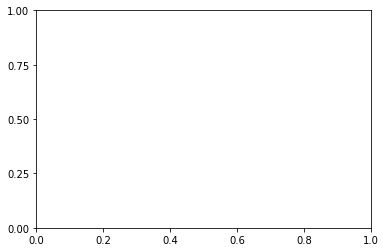

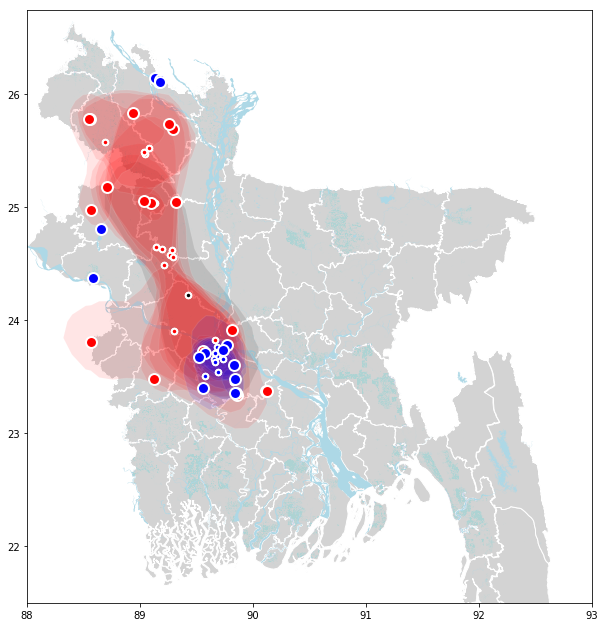

In [17]:
#Well, let's try to animate this silly map:

#import libraries
#Point to baltic.
import imp
bt = imp.load_source('baltic','/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/bang_geo_only/baltic.py') ## point to where baltic repo was cloned


%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon ## for polygons
from matplotlib.collections import PatchCollection ## for polygons too
from matplotlib.colors import LinearSegmentedColormap ## for colour maps
from matplotlib import gridspec ## for composite figures
import matplotlib.patheffects as path_effects ## for elegant text
from IPython.display import clear_output
from IPython.display import HTML

import datetime
import math
import time
import sys
import imp

import unicodedata
# import unidecode ## for removing diacritics from example geoJSON

import numpy as np
from scipy.interpolate import UnivariateSpline ## used to smooth counts of lineages in each location at any given time
from scipy.interpolate import interp1d ## used to linearly interpolate between data points used in colouring polygons
#from sklearn.decomposition import IncrementalPCA ## used to identify PCA1 when automatically producing a colour map

import bezier ## custom arbitrary order Bezier curves
import requests ## used to fetch examples from internet
import json ## used for importing JSONs
try:
    from StringIO import StringIO as sio
    from cStringIO import StringIO as csio
except ImportError:
    from io import StringIO as sio
    from io import BytesIO as csio
    
def removeDiacritics(string):
    """
    Removes diacritic marks from unicode.
    """
#    output=None
#    if isinstance(string, str):
#        output=string
#    elif isinstance(string, unicode):
#        output=string.encode('utf-8')
#        output=unidecode.unidecode(string)
#        nkfd_form = unicodedata.normalize('NFKD', unicode(string))
#        output= u"".join([c for c in nkfd_form if not unicodedata.combining(c)])
#        output = ''.join((c for c in unicodedata.normalize('NFD', string) if unicodedata.category(c) != 'Mn'))
#        output=unicodedata.normalize('NFKD', string).encode('ASCII', 'ignore')
#    return output
#    return unicodedata.normalize('NFKD', string).encode('ASCII', 'ignore')
    return unicodedata.normalize('NFKD', string)

def calendarTimeline(start_date, end_date, infmt='%Y-%m-%d',outfmt='%Y-%b',optfmt=None,month_step=12):
    """
    Given two calendar dates returns a list of calendar dates at monthly (by default) intervals.
    """
    current_date = datetime.datetime.strptime(start_date,infmt)
    ending_date = datetime.datetime.strptime(end_date,infmt)
    
    timeline=[]
    while current_date <= ending_date:
        if optfmt and current_date.month!=1:
            d=datetime.datetime.strftime(current_date,optfmt)
        else:
            d=datetime.datetime.strftime(current_date,outfmt)
        #print('Current Date:%s'%d)
        timeline.append(d)
        carry, new_month = divmod(current_date.month - 1 + month_step, 12)
        new_month += 1
        current_date = current_date.replace(year=current_date.year + carry,month=new_month)
    return timeline

def Bezier_control(pointA,pointB,height,frac):
    """ 
    Given a line defined by 2 points A & B, 
    find a third point at a given distance (height) that defines a line perpendicular to line AB which intercepts AB 
    at fraction (frac) along AB.
    Equation derived by Luiz Max Fagundes de Carvalho (University of Edinburgh).
    """
    x1,y1=pointA
    x2,y2=pointB

    sign=1
    if x1>x2:
        sign=-1

    slope = (y2-y1) / (x2-x1)
    d=np.sqrt((y2-y1)**2 + (x2-x1)**2) ## distance between points
    
    h=np.sqrt(height**2+(d*frac)**2) ## distance between desired height and point along line

    n1=x1+h*np.cos(np.arctan(height/float(d)/frac)+np.arctan(slope))*sign ## magic
    n2=y1+h*np.sin(np.arctan(height/float(d)/frac)+np.arctan(slope))*sign

    return (n1,n2) ## return third point's coordinate
#**********************************************end of Bezier control function*****************************************

smooth=20 ## how many segments Bezier lines will have

#tracking_length=365.0 ## number of days over which to plot the lineage
depth=1
departure_condition = lambda f:f-f ## determines how far away (in Bezier fraction) the tail of the migrating lineage is
transition_point=1.0 ## determines the fixed time point along a branch at which migration happens

plt.clf() 
plt.cla()
plt.figure(figsize=(15,15),facecolor='w') ## start figure
gs = gridspec.GridSpec(2, 1,height_ratios=[4,1]) ## define subplots
ax1 = plt.subplot(gs[0]) ## map here

#import geoJSON:
json_map=json.load(open('/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/location_variable_testing_2/GEOJSON/bgd_admin2.geojson','r')) ## read from (hopefully saved) local copy


#Test code to import my Cauchy MCC tree:
tree_path='/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/bang_geo_only/Nipah_Cauchy_new_HKYG_UCLN_skygrid_1234_log.time.MCC.trees'

bt_tree=bt.loadNexus(tree_path)

print('Done!')

#Convert geoJSON into matplotlib ploygons:
features=json_map['features']
location_points={} ## location points will be stored here
polygons={} ## polygons will be stored here

locName='ADM2_EN' ## key name for each feature

for loc in features: ## iterate through features (locations)
    poly = np.asarray(loc['geometry']['coordinates']) ## get coordinates
    location=removeDiacritics(loc['properties'][locName]) ## standardised location name (remove diacritics)
#     print(location.encode().decode('utf-8'))
    if location not in ['Isla Sala y Gomez'] and 'Gal' not in location: ## ignore Isla Sala y Gomez
        polygons[location]=[]
        location_points[location]=[]
        if loc['geometry']['type']=='MultiPolygon': ## multiple parts detected
            for part in np.asarray(poly): ## iterate over each component polygon
                for coords in np.asarray(part): ## iterate over coordinates
                    coords=np.array(coords)
                    xs=coords[:,0] ## longitudes
                    ys=coords[:,1] ## latitudes

                    location_points[location].append(np.vstack(zip(xs,ys))) ## append coordinates to location's list of coordinates
        if loc['geometry']['type']=='Polygon': ## location is single part
            for coords in np.asarray(poly): ## iterate over coordinates
                coords=np.array(coords)
                xs=coords[:,0] ## longitudes
                ys=coords[:,1] ## latitudes

                location_points[location].append(np.vstack(zip(xs,ys))) ## append coordinates to location's list of coordinates

        complete_location=[]
        for part in location_points[location]: ## iterate over each component of a location
            #print(part)
            complete_location.append(Polygon(part,True)) ## create a polygon for each component of a location

        polygons[location]=complete_location ## assign list of polygons to a location
#     elif location=='Isla Sala y Gomez': ## if location is Isla Sala y Gomez - print a geoJSON entry example
#         print('example geoJSON entry:\n%s\n\nnote that only the coordinate field is called\n'%(loc))
        
print('polygons loaded:\n%s'%(polygons.keys()))
#print(polygons)
#********************************end of pulling in map**************************************************

control=lambda d:-1+0.1/float(d)**0.15+0.5## function that will convert the distance between migration points into a distance 
                                #to be used for finding the control point for a Bezier function


popCentres={} ## dictionary with point coordinates
internal_polygons={} ## dictionary with coordinates of internal node uncertainty polygons
location_points_internal={}
uncertainty_polygons={}

#Pull in latitude and longitude values from continuous diffusion analysis.
#IE - just parse tree and make a dictionary with node index as key and latitude and longitude values.
longTrait='location1'
latTrait='location2'

longPolygon='location1_80%HPD_1'
latPolygon='location2_80%HPD_1'

#Initialize dictionaries with keys of tree indexes, but no values.
for r in bt_tree.Objects: ## iterate over branches
    uncertainty_polygons[r.index]=[]
    location_points_internal[r.index]=[]

#print('uncertainty polygons')
#print(uncertainty_polygons)
#print('locaiton points internal')
#print(location_points_internal)

for k in bt_tree.Objects: ## iterate over branches
    popCentres[k.index]=(float(k.traits[longTrait]),float(k.traits[latTrait] )) ## assign longitude and latitude to location
    
    #Grab internal polygons and uncertanty estimates for internal nodes.
    #Make internal_ploygon with Polygon from internal HPD_80%_estimates.
    if k.branchType == 'node' and k.index != 'Root':
        internal_polygons[k.index]=([float(i) for i in k.traits[longPolygon]],[float(l) for l in k.traits[latPolygon]])
        #print(internal_polygons[k.index][0])
        #print(internal_polygons[k.index][1])
        location_points_internal[k.index]=(np.vstack(zip(internal_polygons[k.index][0],internal_polygons[k.index][1])))
        uncertainty_polygons[k.index].append(Polygon(location_points_internal[k.index], True))
        
        #complete_location_2=[]
        #for part in location_points_internal[k.index]: ## iterate over each component of a location
        #    print(part)
        #    complete_location_2.append(Polygon(part,True)) ## create a polygon for each component of a location

        #uncertainty_polygons[k.index]=complete_location_2 ## assign list of polygons to a location
#print('******************************location_points_internal*************************')
#print(uncertainty_polygons)
    
aggregation={'0':'group 0',
             '1':'group 2',
             '2':'group 2',
             '3':'group 2', 
             '4':'group 2',
             '773':'group 2',
             '3906':'group 2',
             '6319':'group 2',
             '6320':'group 2',
             '6321':'group 2',
             '7082':'group 2', 
             '7083':'group 2', 
             '7084':'group 2',
             '7085':'group 2',
             '7850':'group 2', 
             '7851':'group 2', 
             '7852':'group 2', 
             '8621':'group 2', 
             '8622':'group 2', 
             '12769':'group 2', 
             '19547':'group 2',
             '19548':'group 2',
             '19549':'group 2',
             '23140':'group 2', 
             '28708':'group 2', 
             '36218':'group 2', 
             '36219':'group 2', 
             '36987':'group 2', 
             '42968':'group 2', 
             '42969':'group 2',
             '42970':'group 2',
             '43733':'group 2',
             '50299':'group 2',
             '60809':'group 2',
             '67347':'group 1',
             '67348':'group 1',
             '68116':'group 1',
             '68117':'group 1',
             '68118':'group 1',
             '68119':'group 1',
             '68891':'group 1',
             '71353':'group 1',
             '71354':'group 1',
             '72122':'group 1',
             '72122':'group 1',
             '77072':'group 1',
             '77073':'group 1',
             '77834':'group 1',
             '77835':'group 1',
             '77836':'group 1',
             '77837':'group 1',
             '78593':'group 1',
             '78594':'group 1',
             '82243':'group 1',
             '89994':'group 1',
             '89995':'group 1',
             '90767':'group 1',
             '95074':'group 1',
             '95075':'group 1',
             '98927':'group 1',
             '98928':'group 1',
             '102855':'group 1',
             '102856':'group 1',
             '106741':'group 1',
             '106742':'group 1',
             '110295':'group 1'}

group_colours={'group 0': 'k',
              'group 1': 'b',
              'group 2': 'r'}

    
    
all_distances=[] ## keep track of all distances
migration_function={i:{j:None for j in popCentres.keys() if i!=j} for i in popCentres.keys()} ## matrix of pairs of locations that will contain the Bezier function

    
for i in popCentres.keys(): ## iterate over locations
    A=popCentres[i] ## fetch origin
    lon,lat=A
    groupA=aggregation[str(i)] ## get origin's high order group
    c=group_colours[groupA] ## fetch colour map of the group, colour of location is determined by index of location's coordinates along PCA1
    
    #Set c to black for initial testing.
    #c='k'
    
    ax1.scatter(lon,lat,s=30,facecolor=c,edgecolor='w',lw=2,zorder=100) ## plot migration centre
    
    for j in popCentres.keys(): ## iterate over locations again
        if i!=j: ## if not self
            B=popCentres[j] ## fetch destination
            d=np.sqrt((B[1]-A[1])**2 + (B[0]-A[0])**2) ## calculate distance between location A and location B
            
            all_distances.append(d) ## remember actual distince
            
            bez_points=[A] ## Bezier curve will start at point A
            #bez_points.append(Bezier_control(A,B,1/d ,0.1))
            #bez_points.append(Bezier_control(A,B,0.01     ,0.2))
            #bez_points.append(Bezier_control(A,B,-0.02    ,0.3))
            #bez_points.append(Bezier_control(A,B,-d**0.5,0.4))
            bez_points.append(Bezier_control(A,B,0.01,0.01)) ## head towards the first control point, which is perpendicular to line AB at distance control(d), and 0.01 of the way along line AB
            bez_points.append(Bezier_control(A,B,0.0,0.1)) ## head towards second control point, directly on the line AB, 0.1 of the way along line AB
            bez_points.append(B) ## Bezier curve will finish at point B
            bez_points=np.array(bez_points).transpose()
            curve = bezier.Curve(np.asfortranarray(bez_points),degree=len(bez_points)) ## Bezier curve object
            migration_function[i][j]=curve.evaluate_multi ## only interested in calling the evaluate_multi function of the curve, which will return a list of coordinates, given a numpy array of fractions along the line


for loc in polygons.keys():
    ax1.add_collection(PatchCollection(polygons[loc],facecolor='lightgrey',edgecolor='w',zorder=1)) ## plot location polygons

shape_file=gpd.read_file('/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/location_variable_testing_2/GEOJSON/bangladesh-latest-free/gis_osm_water_a_free_1.shp')

#Rename rows by fclass column values:
shape_file=shape_file.set_index('fclass')
rivers_shape_file=shape_file.loc[['river', 'water']]
#shape_file.info()

locA=''
for k in bt_tree.Objects: ## iterate over branches
    #print(k.parent.absoluteTime)
    #print(k.absoluteTime)
    #print(time_point)
    locA=k.parent.index ## get index of parent
    locB=k.index ## get index of branch
    #print(popCentres[locA])
    #print(popCentres[locB])
    groupA=aggregation[str(k.index)] ## get origin's high order group
    c=group_colours[groupA] ## fetch colour map of the group, colour of location is determined by index of location's coordinates along PCA1
    
    
    
    #If an an internal node, plot uncertanty estimates for internal nodes.
    if k.branchType == 'node' or k.index == 0:
        ax1.add_collection(PatchCollection(uncertainty_polygons[k.index],facecolor=c,alpha=0.1,edgecolor='w',zorder=80)) ## plot location polygons

    A=popCentres[k.index] ## fetch origin
    lon,lat=A
    #Plot points
    if k.branchType == 'leaf':
        ax1.scatter(lon,lat,s=120,facecolor=c,edgecolor='w',lw=2,zorder=100) ## plot migration centre
    elif k.branchType == 'node':
        ax1.scatter(lon,lat,s=30,facecolor=c,edgecolor='w',lw=2,zorder=100) ## plot migration centre

typeface='Helvetica Neue' ## set default matplotlib font and font size
plt.rcParams['font.weight']=300
plt.rcParams['axes.labelweight']=300
plt.rcParams['font.family']=typeface
plt.rcParams['font.size']=22

figWidth=10 ## map figure width
dpi=90 ## dots per inch for each .png (90 used in the final version)
    
ax1.set_aspect(1) ## equal aspect ratio
ax1.set_xlim(88.0, 93)
ax1.set_ylim(21.5, 26.75)

rivers_shape_file.plot(ax=ax1, facecolor='lightblue')

plt.savefig('/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/bang_geo_only/animate_tree_V2/map_uncertainty_v1.png', format='png',bbox_inches='tight',dpi=dpi) ## save individual frames for stitching up using 3rd party software (e.g. FFMpeg)
    

plt.show()

Done!


/apps/x86_64/python/3.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:154: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


polygons loaded:
dict_keys(['Bagerhat', 'Bandarban', 'Barguna', 'Barisal', 'Bhola', 'Bogra', 'Brahamanbaria', 'Chandpur', 'Chittagong', 'Chuadanga', 'Comilla', "Cox's Bazar", 'Dhaka', 'Dinajpur', 'Faridpur', 'Feni', 'Gaibandha', 'Gazipur', 'Gopalganj', 'Habiganj', 'Jamalpur', 'Jessore', 'Jhalokati', 'Jhenaidah', 'Joypurhat', 'Khagrachhari', 'Khulna', 'Kishoreganj', 'Kurigram', 'Kushtia', 'Lakshmipur', 'Lalmonirhat', 'Madaripur', 'Magura', 'Manikganj', 'Maulvibazar', 'Meherpur', 'Munshiganj', 'Mymensingh', 'Naogaon', 'Narail', 'Narayanganj', 'Narsingdi', 'Natore', 'Nawabganj', 'Netrakona', 'Nilphamari', 'Noakhali', 'Pabna', 'Panchagarh', 'Patuakhali', 'Pirojpur', 'Rajbari', 'Rajshahi', 'Rangamati', 'Rangpur', 'Satkhira', 'Shariatpur', 'Sherpur', 'Sirajganj', 'Sunamganj', 'Sylhet', 'Tangail', 'Thakurgaon'])


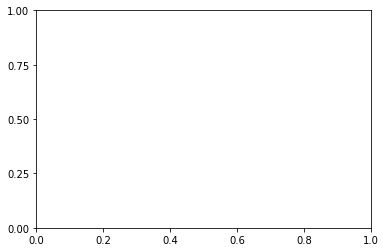

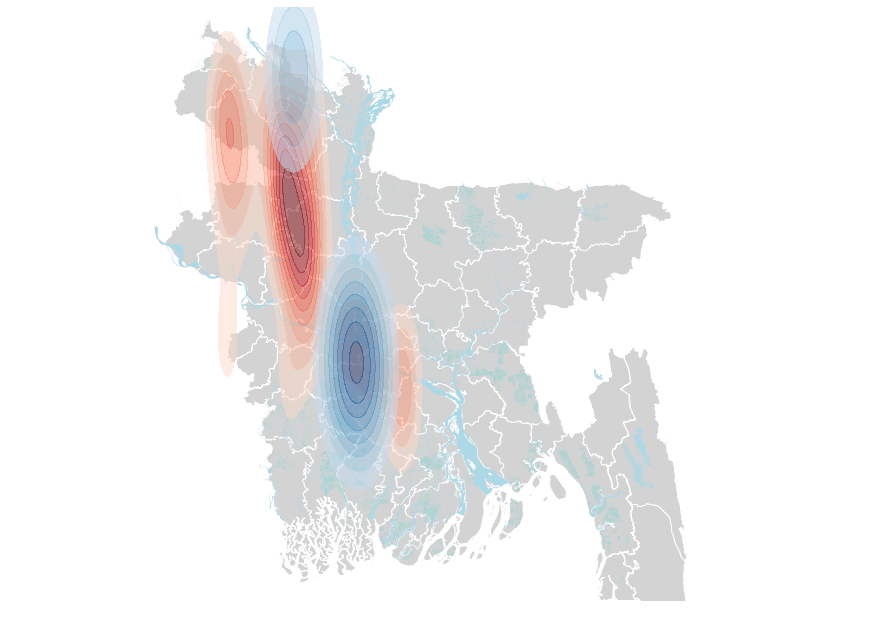

In [49]:
#Well, let's try to animate this silly map:

#import libraries
#Point to baltic.
import imp
bt = imp.load_source('baltic','/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/bang_geo_only/baltic.py') ## point to where baltic repo was cloned


%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon ## for polygons
from matplotlib.collections import PatchCollection ## for polygons too
from matplotlib.colors import LinearSegmentedColormap ## for colour maps
from matplotlib import gridspec ## for composite figures
import matplotlib.patheffects as path_effects ## for elegant text
from IPython.display import clear_output
from IPython.display import HTML

import datetime
import math
import time
import sys
import imp

import seaborn as sns

import unicodedata
# import unidecode ## for removing diacritics from example geoJSON

import numpy as np
from scipy.interpolate import UnivariateSpline ## used to smooth counts of lineages in each location at any given time
from scipy.interpolate import interp1d ## used to linearly interpolate between data points used in colouring polygons
#from sklearn.decomposition import IncrementalPCA ## used to identify PCA1 when automatically producing a colour map

import bezier ## custom arbitrary order Bezier curves
import requests ## used to fetch examples from internet
import json ## used for importing JSONs
try:
    from StringIO import StringIO as sio
    from cStringIO import StringIO as csio
except ImportError:
    from io import StringIO as sio
    from io import BytesIO as csio
    
def removeDiacritics(string):
    """
    Removes diacritic marks from unicode.
    """
#    output=None
#    if isinstance(string, str):
#        output=string
#    elif isinstance(string, unicode):
#        output=string.encode('utf-8')
#        output=unidecode.unidecode(string)
#        nkfd_form = unicodedata.normalize('NFKD', unicode(string))
#        output= u"".join([c for c in nkfd_form if not unicodedata.combining(c)])
#        output = ''.join((c for c in unicodedata.normalize('NFD', string) if unicodedata.category(c) != 'Mn'))
#        output=unicodedata.normalize('NFKD', string).encode('ASCII', 'ignore')
#    return output
#    return unicodedata.normalize('NFKD', string).encode('ASCII', 'ignore')
    return unicodedata.normalize('NFKD', string)

def calendarTimeline(start_date, end_date, infmt='%Y-%m-%d',outfmt='%Y-%b',optfmt=None,month_step=12):
    """
    Given two calendar dates returns a list of calendar dates at monthly (by default) intervals.
    """
    current_date = datetime.datetime.strptime(start_date,infmt)
    ending_date = datetime.datetime.strptime(end_date,infmt)
    
    timeline=[]
    while current_date <= ending_date:
        if optfmt and current_date.month!=1:
            d=datetime.datetime.strftime(current_date,optfmt)
        else:
            d=datetime.datetime.strftime(current_date,outfmt)
        #print('Current Date:%s'%d)
        timeline.append(d)
        carry, new_month = divmod(current_date.month - 1 + month_step, 12)
        new_month += 1
        current_date = current_date.replace(year=current_date.year + carry,month=new_month)
    return timeline

def Bezier_control(pointA,pointB,height,frac):
    """ 
    Given a line defined by 2 points A & B, 
    find a third point at a given distance (height) that defines a line perpendicular to line AB which intercepts AB 
    at fraction (frac) along AB.
    Equation derived by Luiz Max Fagundes de Carvalho (University of Edinburgh).
    """
    x1,y1=pointA
    x2,y2=pointB

    sign=1
    if x1>x2:
        sign=-1

    slope = (y2-y1) / (x2-x1)
    d=np.sqrt((y2-y1)**2 + (x2-x1)**2) ## distance between points
    
    h=np.sqrt(height**2+(d*frac)**2) ## distance between desired height and point along line

    n1=x1+h*np.cos(np.arctan(height/float(d)/frac)+np.arctan(slope))*sign ## magic
    n2=y1+h*np.sin(np.arctan(height/float(d)/frac)+np.arctan(slope))*sign

    return (n1,n2) ## return third point's coordinate
#**********************************************end of Bezier control function*****************************************

smooth=20 ## how many segments Bezier lines will have

#tracking_length=365.0 ## number of days over which to plot the lineage
depth=1
departure_condition = lambda f:f-f ## determines how far away (in Bezier fraction) the tail of the migrating lineage is
transition_point=1.0 ## determines the fixed time point along a branch at which migration happens

plt.clf() 
plt.cla()
plt.figure(figsize=(15,15),facecolor='w') ## start figure
gs = gridspec.GridSpec(2, 1,height_ratios=[4,1]) ## define subplots
ax1 = plt.subplot(gs[0]) ## map here

#import geoJSON:
json_map=json.load(open('/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/location_variable_testing_2/GEOJSON/bgd_admin2.geojson','r')) ## read from (hopefully saved) local copy


#Test code to import my Cauchy MCC tree:
tree_path='/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/bang_geo_only/Nipah_Cauchy_new_HKYG_UCLN_skygrid_1234_log.time.MCC.trees'

bt_tree=bt.loadNexus(tree_path)

print('Done!')

#Convert geoJSON into matplotlib ploygons:
features=json_map['features']
location_points={} ## location points will be stored here
polygons={} ## polygons will be stored here

locName='ADM2_EN' ## key name for each feature

for loc in features: ## iterate through features (locations)
    poly = np.asarray(loc['geometry']['coordinates']) ## get coordinates
    location=removeDiacritics(loc['properties'][locName]) ## standardised location name (remove diacritics)
#     print(location.encode().decode('utf-8'))
    if location not in ['Isla Sala y Gomez'] and 'Gal' not in location: ## ignore Isla Sala y Gomez
        polygons[location]=[]
        location_points[location]=[]
        if loc['geometry']['type']=='MultiPolygon': ## multiple parts detected
            for part in np.asarray(poly): ## iterate over each component polygon
                for coords in np.asarray(part): ## iterate over coordinates
                    coords=np.array(coords)
                    xs=coords[:,0] ## longitudes
                    ys=coords[:,1] ## latitudes

                    location_points[location].append(np.vstack(zip(xs,ys))) ## append coordinates to location's list of coordinates
        if loc['geometry']['type']=='Polygon': ## location is single part
            for coords in np.asarray(poly): ## iterate over coordinates
                coords=np.array(coords)
                xs=coords[:,0] ## longitudes
                ys=coords[:,1] ## latitudes

                location_points[location].append(np.vstack(zip(xs,ys))) ## append coordinates to location's list of coordinates

        complete_location=[]
        for part in location_points[location]: ## iterate over each component of a location
            #print(part)
            complete_location.append(Polygon(part,True)) ## create a polygon for each component of a location

        polygons[location]=complete_location ## assign list of polygons to a location
#     elif location=='Isla Sala y Gomez': ## if location is Isla Sala y Gomez - print a geoJSON entry example
#         print('example geoJSON entry:\n%s\n\nnote that only the coordinate field is called\n'%(loc))
        
print('polygons loaded:\n%s'%(polygons.keys()))
#print(polygons)
#********************************end of pulling in map**************************************************

control=lambda d:-1+0.1/float(d)**0.15+0.5## function that will convert the distance between migration points into a distance 
                                #to be used for finding the control point for a Bezier function


popCentres={} ## dictionary with point coordinates
internal_polygons={} ## dictionary with coordinates of internal node uncertainty polygons
location_points_internal={}
uncertainty_polygons={}

for k in bt_tree.Objects: ## iterate over branches
    popCentres[k.index]=(float(k.traits[longTrait]),float(k.traits[latTrait] )) ## assign longitude and latitude to location


#Pull in latitude and longitude values from continuous diffusion analysis.
#IE - just parse tree and make a dictionary with node index as key and latitude and longitude values.
longTrait='location1'
latTrait='location2'

longPolygon='location1_80%HPD_1'
latPolygon='location2_80%HPD_1'



    
aggregation={'0':'group 0',
             '1':'group 2',
             '2':'group 2',
             '3':'group 2', 
             '4':'group 2',
             '773':'group 2',
             '3906':'group 2',
             '6319':'group 2',
             '6320':'group 2',
             '6321':'group 2',
             '7082':'group 2', 
             '7083':'group 2', 
             '7084':'group 2',
             '7085':'group 2',
             '7850':'group 2', 
             '7851':'group 2', 
             '7852':'group 2', 
             '8621':'group 2', 
             '8622':'group 2', 
             '12769':'group 2', 
             '19547':'group 2',
             '19548':'group 2',
             '19549':'group 2',
             '23140':'group 2', 
             '28708':'group 2', 
             '36218':'group 2', 
             '36219':'group 2', 
             '36987':'group 2', 
             '42968':'group 2', 
             '42969':'group 2',
             '42970':'group 2',
             '43733':'group 2',
             '50299':'group 2',
             '60809':'group 2',
             '67347':'group 1',
             '67348':'group 1',
             '68116':'group 1',
             '68117':'group 1',
             '68118':'group 1',
             '68119':'group 1',
             '68891':'group 1',
             '71353':'group 1',
             '71354':'group 1',
             '72122':'group 1',
             '72122':'group 1',
             '77072':'group 1',
             '77073':'group 1',
             '77834':'group 1',
             '77835':'group 1',
             '77836':'group 1',
             '77837':'group 1',
             '78593':'group 1',
             '78594':'group 1',
             '82243':'group 1',
             '89994':'group 1',
             '89995':'group 1',
             '90767':'group 1',
             '95074':'group 1',
             '95075':'group 1',
             '98927':'group 1',
             '98928':'group 1',
             '102855':'group 1',
             '102856':'group 1',
             '106741':'group 1',
             '106742':'group 1',
             '110295':'group 1'}

group_colours={'group 0': 'k',
              'group 1': 'b',
              'group 2': 'r'}

    
    
for loc in polygons.keys():
    ax1.add_collection(PatchCollection(polygons[loc],facecolor='lightgrey',edgecolor='w',zorder=1)) ## plot location polygons

shape_file=gpd.read_file('/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/location_variable_testing_2/GEOJSON/bangladesh-latest-free/gis_osm_water_a_free_1.shp')

#Rename rows by fclass column values:
shape_file=shape_file.set_index('fclass')
rivers_shape_file=shape_file.loc[['river', 'water']]
#shape_file.info()

locA=''
group1=[]
group2=[]
for k in bt_tree.Objects: ## iterate over branches
    #print(k.parent.absoluteTime)
    #print(k.absoluteTime)
    #print(time_point)
    locA=k.parent.index ## get index of parent
    locB=k.index ## get index of branch
    #print(popCentres[locA])
    #print(popCentres[locB])
    groupA=aggregation[str(k.index)] ## get origin's high order group
    c=group_colours[groupA] ## fetch colour map of the group, colour of location is determined by index of location's coordinates along PCA1
    
    A=popCentres[k.index] ## fetch origin
    lon,lat=A
    #Plot points
    if aggregation[str(k.index)] == 'group 1':
        group1.append((lon, lat))
    elif aggregation[str(k.index)] == 'group 2':
        group2.append((lon, lat))

#print(group1[0])
#print(group2)

i=len(ax1.collections)
sns.kdeplot([lon[0] for lon in group1], [lat[1] for lat in group1], shade=True, cmap='Blues', shade_lowest=False, alpha=0.5, ax=ax1, zorder=99);
ax1.collections[i].set_alpha(0)
sns.kdeplot([lon[0] for lon in group2], [lat[1] for lat in group2], shade=True, cmap='Reds', shade_lowest=False, alpha=0.5, ax=ax1, zorder=50);
ax1.collections[i+1].set_alpha(0)
#sns.kdeplot(lst['longitude'], lst['latitude'], shade=True, cmap='Purples', ax=ax);


        
typeface='Helvetica Neue' ## set default matplotlib font and font size
plt.rcParams['font.weight']=300
plt.rcParams['axes.labelweight']=300
plt.rcParams['font.family']=typeface
plt.rcParams['font.size']=22

figWidth=10 ## map figure width
dpi=90 ## dots per inch for each .png (90 used in the final version)

ax1.set_axis_off()
ax1.set_aspect(1) ## equal aspect ratio
plt.axis('equal')
ax1.set_xlim(88.0, 93)
ax1.set_ylim(21.5, 26.75)

rivers_shape_file.plot(ax=ax1, facecolor='lightblue', zorder=2)

plt.savefig('/scicomp/home/evk3/Diagnostics/Nipah/GLM_2018/alignment_without_mojiang_cedar_bat/bang_geo_only/animate_tree_V2/map_KDE_v1.png', format='png',bbox_inches='tight',dpi=dpi) ## save individual frames for stitching up using 3rd party software (e.g. FFMpeg)
    

plt.show()

In [41]:
print(group1)


[(89.6851333108395, 23.767426225295548), (89.76838399996255, 23.780310999985193), (89.67437049063484, 23.681610044142104), (89.68447646674824, 23.680685610367085), (89.73321954471345, 23.65680619397622), (88.58743700001034, 24.373589999982343), (89.835132000029, 23.601482999985176), (89.66428174413296, 23.715344846132364), (89.73455900000397, 23.73403399999191), (89.58000000004434, 23.709999999991243), (89.65194709166242, 23.659830449129934), (89.52192399991924, 23.67722099999035), (89.66252015963437, 23.63351833188659), (89.69495717851969, 23.540466468154783), (89.82041183850569, 23.452754902191934), (89.83888000004778, 23.47893999997876), (89.84430607509205, 23.363238561104716), (89.8493035705039, 23.361482162797543), (89.84128651954836, 23.353943071884814), (89.57587558383759, 23.51033117483743), (88.6549999999457, 24.80778499998574), (89.55458100000385, 23.397606999991485), (89.15173662711446, 26.1338990844304), (89.13893139930619, 26.148274655881117), (89.1579525723426, 26.1282251

In [26]:
k=aggregation[1]
print(k)

KeyError: 1